# SEOUL BIKE TRIP DURATION PREDICTION

We need to predict the trip duration from all the other data from dataset like distance, location and weather information.
Trip duration is the most fundamental measure in all modes of transportation. Hence, it is crucial to predict the trip-time precisely for the advancement of Intelligent Transport Systems (ITS) and traveller information systems.


# ABOUT DATASET 
Dataset contains 1 file for_modeling.csv ( 9601139 , 26 )

# COLUMNS IN THE DATASET
Unnamed: 0

Duration 

Distance

PLong

PLatd

DLong

DLatd

Haversine

Pmonth

Pday

Phour

Pmin

PDweek

Dmonth

Dday

Dhour

Dmin

DDweek

Temp

Precip

Wind

Humid

Solar

Snow

GroundTemp

Dust

### Importing required libraries


In [12]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
# import dataset
data=pd.read_csv("/content/For_modeling.csv")


### Importing the dataset

In [14]:
# Read csv using pandas
data

Unnamed: 0  Duration  Distance  ...  Snow  GroundTemp  Dust
0                0         3        50  ...   0.0        -2.2  25.0
1                1        24      7670  ...   0.0        -2.2  25.0
2                2         8      1390  ...   0.0        -2.2  25.0
3                3         8      1820  ...   0.0        -2.2  25.0
4                4         4       850  ...   0.0        -2.2  25.0
...            ...       ...       ...  ...   ...         ...   ...
224476      227799        12      1770  ...   0.0         2.4  89.0
224477      227800        11      1800  ...   0.0         2.4  89.0
224478      227801         5       970  ...   0.0         2.4  89.0
224479      227802        37      5940  ...   0.0         2.4  89.0
224480      227803        13      1110  ...   NaN         NaN   NaN

[224481 rows x 26 columns]

In [15]:
data=data.drop(224480,axis=0)
data

Unnamed: 0  Duration  Distance  ...  Snow  GroundTemp  Dust
0                0         3        50  ...   0.0        -2.2  25.0
1                1        24      7670  ...   0.0        -2.2  25.0
2                2         8      1390  ...   0.0        -2.2  25.0
3                3         8      1820  ...   0.0        -2.2  25.0
4                4         4       850  ...   0.0        -2.2  25.0
...            ...       ...       ...  ...   ...         ...   ...
224475      227798         4       370  ...   0.0         2.4  89.0
224476      227799        12      1770  ...   0.0         2.4  89.0
224477      227800        11      1800  ...   0.0         2.4  89.0
224478      227801         5       970  ...   0.0         2.4  89.0
224479      227802        37      5940  ...   0.0         2.4  89.0

[224480 rows x 26 columns]

In [16]:
data.isnull().sum()

Unnamed: 0    0
Duration      0
Distance      0
PLong         0
PLatd         0
DLong         0
DLatd         0
Haversine     0
Pmonth        0
Pday          0
Phour         0
Pmin          0
PDweek        0
Dmonth        0
Dday          0
Dhour         0
Dmin          0
DDweek        0
Temp          0
Precip        0
Wind          0
Humid         0
Solar         0
Snow          0
GroundTemp    0
Dust          0
dtype: int64

# Identifying the number of features or columns

# Know all the names of the columns

In [17]:
# Check all the columns in the dataset
data.columns

Index(['Unnamed: 0', 'Duration', 'Distance', 'PLong', 'PLatd', 'DLong',
       'DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek',
       'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind',
       'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust'],
      dtype='object')

# Drop irrelevant columns from dataset

In [18]:
# Dropping irrelevant column from the dataset i.e Unnamed: 0
data=data.drop(["Unnamed: 0"],axis=1)
data

Duration  Distance      PLong  ...  Snow  GroundTemp  Dust
0              3        50  37.544666  ...   0.0        -2.2  25.0
1             24      7670  37.506199  ...   0.0        -2.2  25.0
2              8      1390  37.544590  ...   0.0        -2.2  25.0
3              8      1820  37.571102  ...   0.0        -2.2  25.0
4              4       850  37.573242  ...   0.0        -2.2  25.0
...          ...       ...        ...  ...   ...         ...   ...
224475         4       370  37.481491  ...   0.0         2.4  89.0
224476        12      1770  37.543915  ...   0.0         2.4  89.0
224477        11      1800  37.576332  ...   0.0         2.4  89.0
224478         5       970  37.582500  ...   0.0         2.4  89.0
224479        37      5940  37.541363  ...   0.0         2.4  89.0

[224480 rows x 25 columns]

# Knows more about the data in the columns like data type it contains and total samples of each

In [10]:
# Check which columns are having categorical, numerical or boolean values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224480 entries, 0 to 224479
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Duration    224480 non-null  int64  
 1   Distance    224480 non-null  int64  
 2   PLong       224480 non-null  float64
 3   PLatd       224480 non-null  float64
 4   DLong       224480 non-null  float64
 5   DLatd       224480 non-null  float64
 6   Haversine   224480 non-null  float64
 7   Pmonth      224480 non-null  int64  
 8   Pday        224480 non-null  int64  
 9   Phour       224480 non-null  int64  
 10  Pmin        224480 non-null  int64  
 11  PDweek      224480 non-null  int64  
 12  Dmonth      224480 non-null  int64  
 13  Dday        224480 non-null  int64  
 14  Dhour       224480 non-null  int64  
 15  Dmin        224480 non-null  float64
 16  DDweek      224480 non-null  float64
 17  Temp        224480 non-null  float64
 18  Precip      224480 non-null  float64
 19  Wi

**After checking the Dtypes of all the columns**

**object - String values**

**float64 - Numerical values**

**Observation: There are no String values so there are no categorical data**

# Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [19]:
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns 
data.describe()

Duration       Distance  ...     GroundTemp           Dust
count  224480.000000  224480.000000  ...  224480.000000  224480.000000
mean       18.429281    2673.157297  ...      -1.905447      44.233117
std        20.370830    2992.007984  ...       3.824926      23.329576
min         2.000000      10.000000  ...     -13.600000       3.000000
25%         6.000000    1030.000000  ...      -4.100000      28.000000
50%        11.000000    1720.000000  ...      -0.600000      39.000000
75%        22.000000    3080.000000  ...       0.000000      56.000000
max       119.000000   33290.000000  ...       7.900000     169.000000

[8 rows x 25 columns]

# Get the total number of samples in the dataset using the len() function

In [20]:
# check length of dataset
data.shape[0]


224480

#Get unique values

In [21]:
# check for unique values in dataset
for i in data.columns:
  print(i,len(data[i].unique()))


Duration 118
Distance 2631
PLong 1010
PLatd 1012
DLong 1017
DLatd 1019
Haversine 27924
Pmonth 2
Pday 31
Phour 24
Pmin 60
PDweek 7
Dmonth 2
Dday 31
Dhour 24
Dmin 60
DDweek 7
Temp 236
Precip 10
Wind 57
Humid 78
Solar 172
Snow 25
GroundTemp 185
Dust 109


# Counting the total number of missing value

In [22]:
# Check for missing values in all the columnns of the dataset
data.isnull().sum()

Duration      0
Distance      0
PLong         0
PLatd         0
DLong         0
DLatd         0
Haversine     0
Pmonth        0
Pday          0
Phour         0
Pmin          0
PDweek        0
Dmonth        0
Dday          0
Dhour         0
Dmin          0
DDweek        0
Temp          0
Precip        0
Wind          0
Humid         0
Solar         0
Snow          0
GroundTemp    0
Dust          0
dtype: int64

There is no missing values in this dataset

#EDA

# CORRELATION MATRIX


Why ?

**A correlation matrix is a table showing correlation coefficients between variables**

There are three broad reasons for computing a correlation matrix:
1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.


In [24]:
#correlation matrix Using pandas
data.corr()

Duration  Distance     PLong  ...      Snow  GroundTemp      Dust
Duration    1.000000  0.645195 -0.019756  ... -0.029413    0.160569  0.074519
Distance    0.645195  1.000000 -0.031834  ... -0.040111    0.108530  0.047437
PLong      -0.019756 -0.031834  1.000000  ... -0.019209    0.013938  0.020669
PLatd       0.018264 -0.001794  0.080072  ... -0.007576    0.009028  0.010980
DLong      -0.019589 -0.035870  0.940539  ... -0.018895    0.016385  0.019486
DLatd       0.019370  0.001379  0.082887  ... -0.008088    0.011162  0.010786
Haversine   0.369303  0.653185 -0.012670  ... -0.025172    0.021720  0.001239
Pmonth      0.000975  0.002239 -0.002196  ... -0.109166   -0.054289 -0.053131
Pday       -0.018492 -0.032000 -0.001473  ...  0.331691   -0.040417  0.135318
Phour       0.066522  0.030489 -0.014017  ... -0.055879    0.261978 -0.112717
Pmin       -0.010695 -0.020805 -0.000319  ...  0.007074   -0.015635  0.008081
PDweek      0.048007  0.053928  0.015888  ... -0.115301    0.025761  0.049738
Dmonth      0.001354  0.002575 -0.002219  ... -0.107757   -0.054525 -0.053350
Dday       -0.018464 -0.031987 -0.001429  ...  0.329358   -0.040320  0.135561
Dhour       0.100095  0.046123 -0.015040  ... -0.056071    0.278140 -0.100316
Dmin       -0.006587  0.003358 -0.001179  ...  0.004279   -0.025357 -0.001549
DDweek      0.048220  0.053779  0.015969  ... -0.114340    0.025020  0.051365
Temp        0.131035  0.109763  0.007296  ... -0.217650    0.870303  0.553462
Precip      0.001652 -0.002413 -0.006338  ...  0.121084    0.021471 -0.055118
Wind        0.043042 -0.002659  0.002148  ...  0.114044    0.077947 -0.137619
Humid      -0.089379 -0.043682 -0.006252  ...  0.113694   -0.049658  0.160533
Solar       0.132552  0.055466  0.023903  ... -0.054255    0.455701  0.277270
Snow       -0.029413 -0.040111 -0.019209  ...  1.000000   -0.134169 -0.180224
GroundTemp  0.160569  0.108530  0.013938  ... -0.134169    1.000000  0.503614
Dust        0.074519  0.047437  0.020669  ... -0.180224    0.503614  1.000000

[25 rows x 25 columns]

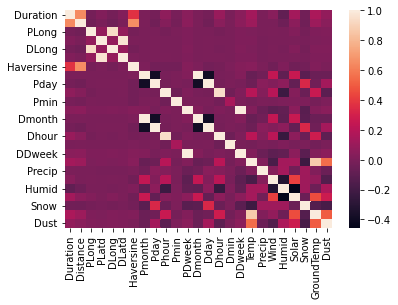

In [25]:
# correlation matrix Using seaborn
sns.heatmap(data.corr())

In [26]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [30]:
correlation(data,.85)

{'DDweek', 'DLatd', 'DLong', 'Dday', 'Dhour', 'Dmonth', 'GroundTemp'}

**Observation from above correlation mattix**
1. distance and duration are strongly related
2. haversine and duration and correlated with each other
3. gound temperature and solar radiation are correlated
4. temperature and solar radiations are correlated
5. phour and dhour are not related to humidity

# SCATTER PLOT

1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.

In [33]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset
def scat(data,val1,val2):
  sns.scatterplot(data=data, x=val1,y=val2)
  plt.show()

# Loop through numerical data list and use function to scatter plot between two columns
for i in data.columns:
  for j in data.columns:
    if i!=j:
      scat(data,i,j)



# OR

# plot all pair of scatterplot by writing code for each pair

Output hidden; open in https://colab.research.google.com to view.

PLong and DLong are correlated

PLatd and DLatd are correlated

Pmonth and Dmonth are correlated

# HISTOGRAM

1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

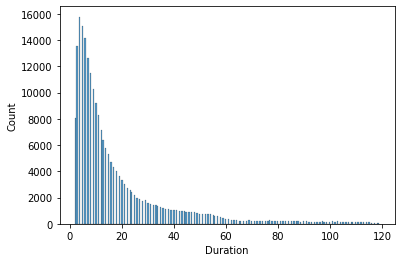

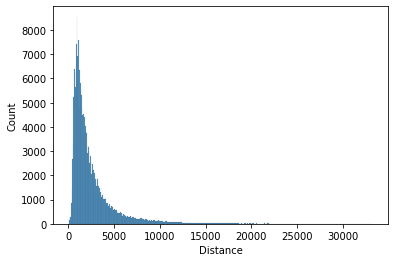

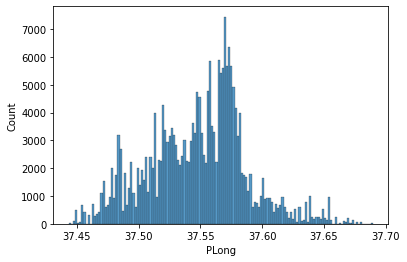

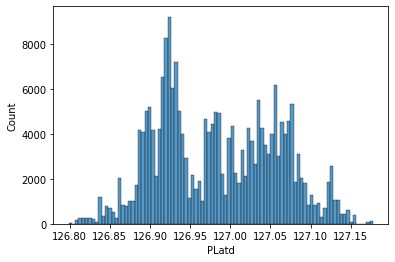

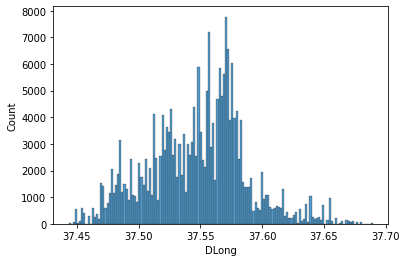

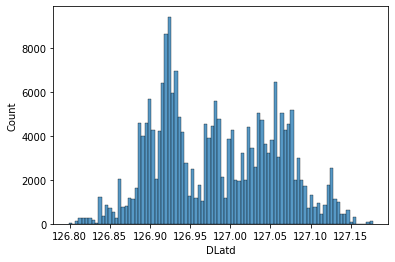

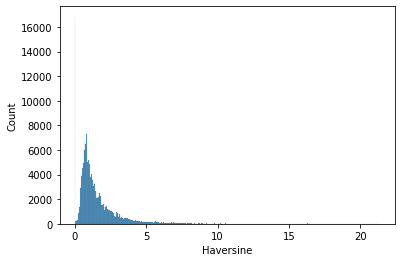

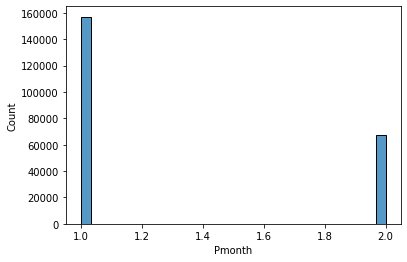

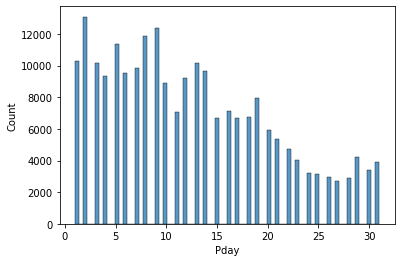

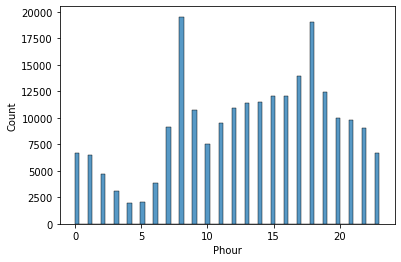

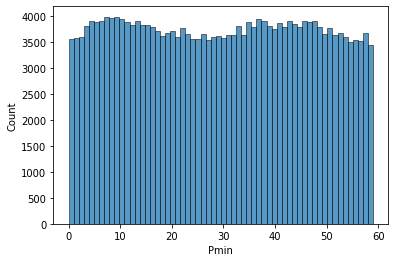

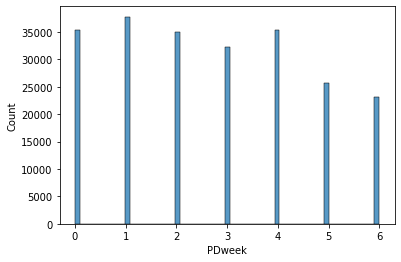

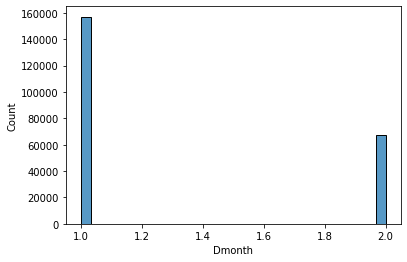

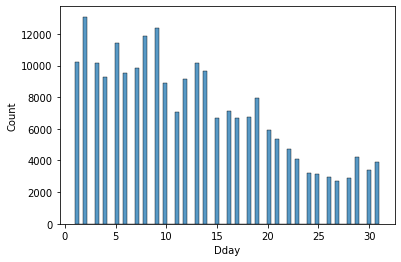

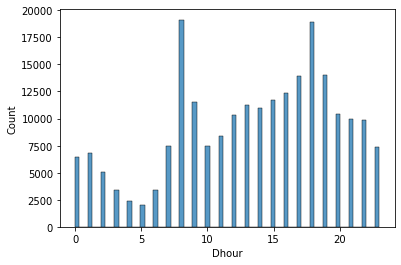

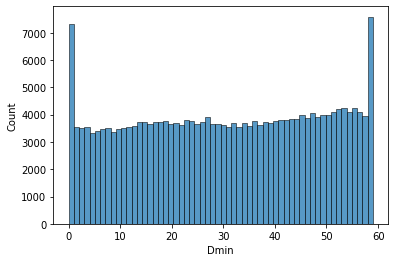

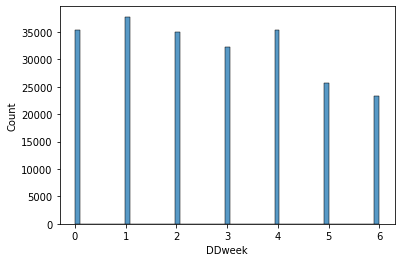

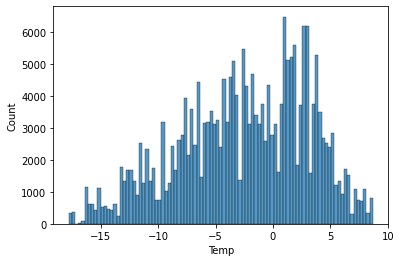

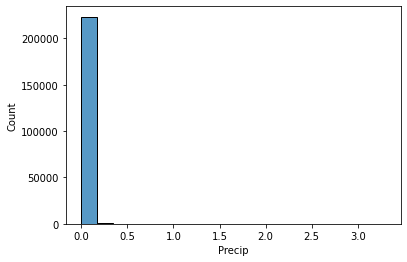

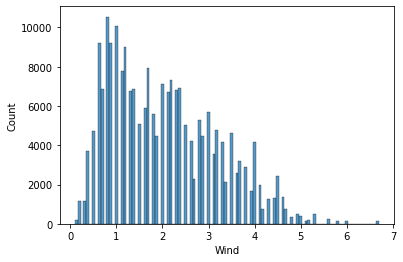

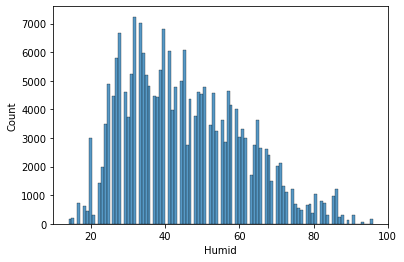

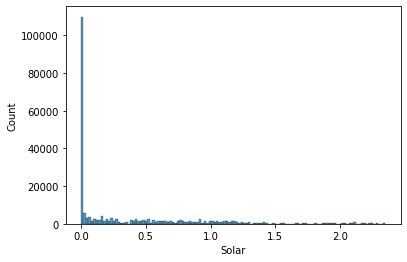

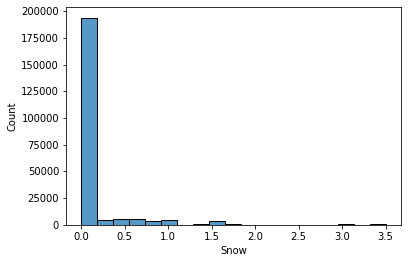

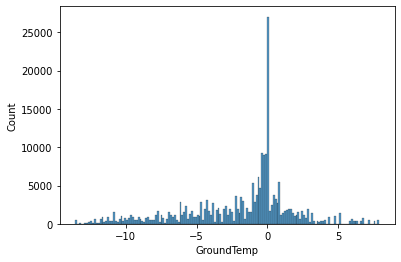

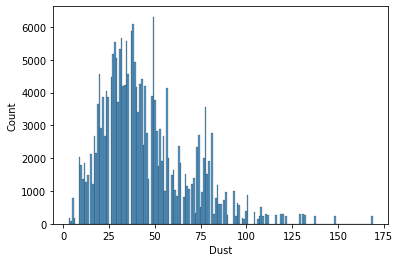

In [36]:
#Histogram Using pandas 

def his(data , val):
  sns.histplot(x=data[val])
  plt.show()




for i in data.columns:
  his(data , i)

Observation -
2. data distribution of duration, distance, haversine, precipation, solar radiation, snow and dust are skewed left.
3. data distribution of humidity is symmetrical
4. data distribution of Pmin and Dmin is right skewed.
4. data distribution of Phour and Dhour is same.
4. data distribution of pday and Dday is same.
4. data distribution of Pmonth and Dmonth is same

#VIF - Variance inflation factor
1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model.
2. It is used for diagnosing collinearity/multicollinearity.
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [37]:
# import statsmodle library for vif 
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [38]:
data.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

In [42]:
# creating a dataframe of just numerical values
X=data.drop(["Duration"],axis=1)
Y=data["Duration"]
# target values

# numerical values column names


In [43]:
X

Distance      PLong       PLatd  ...  Snow  GroundTemp  Dust
0             50  37.544666  126.888359  ...   0.0        -2.2  25.0
1           7670  37.506199  127.003944  ...   0.0        -2.2  25.0
2           1390  37.544590  127.057083  ...   0.0        -2.2  25.0
3           1820  37.571102  127.023560  ...   0.0        -2.2  25.0
4            850  37.573242  127.015907  ...   0.0        -2.2  25.0
...          ...        ...         ...  ...   ...         ...   ...
224475       370  37.481491  127.036728  ...   0.0         2.4  89.0
224476      1770  37.543915  127.125458  ...   0.0         2.4  89.0
224477      1800  37.576332  126.968590  ...   0.0         2.4  89.0
224478       970  37.582500  126.998535  ...   0.0         2.4  89.0
224479      5940  37.541363  127.017662  ...   0.0         2.4  89.0

[224480 rows x 24 columns]

In [44]:
names=list(x.columns)
names

['Distance',
 'PLong',
 'PLatd',
 'DLong',
 'DLatd',
 'Haversine',
 'Pmonth',
 'Pday',
 'Phour',
 'Pmin',
 'PDweek',
 'Dmonth',
 'Dday',
 'Dhour',
 'Dmin',
 'DDweek',
 'Temp',
 'Precip',
 'Wind',
 'Humid',
 'Solar',
 'Snow',
 'GroundTemp',
 'Dust']

In [45]:
# Calculating VIF for each feature.
for i in range(0, len(names)):
  y = X.loc[:, X.columns == names[i]] 

  x= X.loc[:, X.columns != names[i]] 
  # fiing e OLS model on y and x 
  model = sm.OLS(y, x) 
  results = model.fit() 
  # goting the 2 valve of resuls. 
  rsq = results.rsquared 
  # calulating vif value |
  Vif = round(1/(1-rsq),2) 
  print(f"R Square value of {names[i]} columns is {round(rsq, 2)} keeping all other columns as features" )
  print(f"Variance inflation factor of {names[i]} column is {Vif}")

# [PLong ,PLatd ,DLong ,DLatd,Pmonth ,Pday,Phour,PDweek ,Dmonth ,Dday,Dhour,DDweek   ]

R Square value of Distance columns is 0.78 keeping all other columns as features
Variance inflation factor of Distance column is 4.52
R Square value of PLong columns is 1.0 keeping all other columns as features
Variance inflation factor of PLong column is 7724641.04
R Square value of PLatd columns is 1.0 keeping all other columns as features
Variance inflation factor of PLatd column is 49596047.59
R Square value of DLong columns is 1.0 keeping all other columns as features
Variance inflation factor of DLong column is 7774222.45
R Square value of DLatd columns is 1.0 keeping all other columns as features
Variance inflation factor of DLatd column is 49681686.84
R Square value of Haversine columns is 0.72 keeping all other columns as features
Variance inflation factor of Haversine column is 3.52
R Square value of Pmonth columns is 1.0 keeping all other columns as features
Variance inflation factor of Pmonth column is 13446409.76
R Square value of Pday columns is 1.0 keeping all other colu

there is colinearity/multicolinearity between variables as the VIF value is almost upto 2.5

Distance', 'PLong', 'PLatd', 'DLong','DLatd',  'Phour',  'PDweek', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Humid', 'Solar', 'Snow', 'GroundTemp',  have colinearity with all the variables.

# box plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

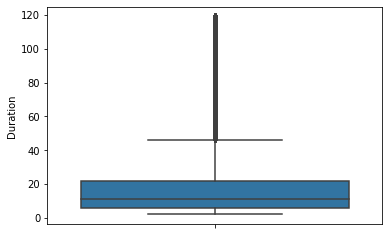

In [47]:
# Perform boxplot on Duration column of the dataset
sns.boxplot(y=data["Duration"])

from above box plot graph:

duration

25% of duration have value between range 0 to 8

25% of duration have value between range 8 to 18

25% of duration have value between range 18 to 35

25% of duration have value between range 35 to 77

The mean duration is around 18

**Mostly the duration are on the lower side of the spectrum. Means small duration trips are the common trips**


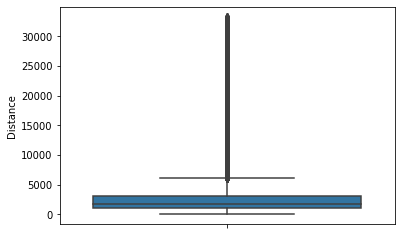

In [48]:
# Perform boxplot on Distance column of the dataset
sns.boxplot(y=data["Distance"])

from above box plot graph:

distance

25% of distance have value between range 0 to 1000

25% of distance have value between range 1000 to 2500

25% of distance have value between range 2500 to 4900

25% of distance have value between range 4900 to 9900

The mean distance is around 2500

 Mostly the distance are on the lower side of the spectrum. Means small distance trips are the common trips



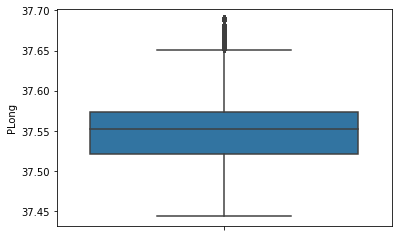

In [49]:
# Perform boxplot on PLong column of the dataset
sns.boxplot(y=data["PLong"])

from above box plot graph:

PLong

25% of PLong have value between range 37.44 to 37.52

25% of PLong have value between range 37.52 to 37.559

25% of PLong have value between range 37.559 to 37.58

25% of PLong have value between range 37.58 to 37.66

The mean PLong is around 37.559

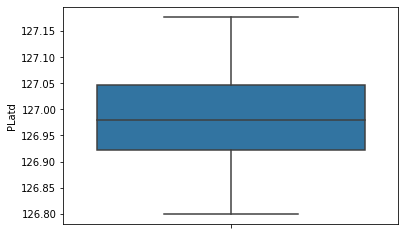

In [77]:
# Perform boxplot on PLatd column of the dataset
sns.boxplot(y=data["PLatd"])

from above box plot graph:

PLatd

25% of PLatd have value between range 126.80 to 162.92

25% of PLatd have value between range 126.92 to 126.99

25% of PLatd have value between range 126.99 to 127.07

25% of PLatd have value between range 127.07 to 127.18

The mean PLatd is around 126.99

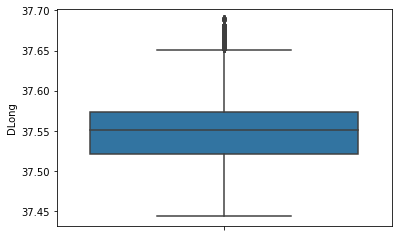

In [80]:
# Perform boxplot on Dlong column of the dataset
sns.boxplot(y=data["DLong"])

from above box plot graph:

DLong

25% of DLong have value between range 37.43 to 37.52

25% of DLong have value between range 37.52 to 37.545

25% of DLong have value between range 37.545 to 37.575

25% of DLong have value between range 37.575 to 37.665

The mean DLong is around 37.545

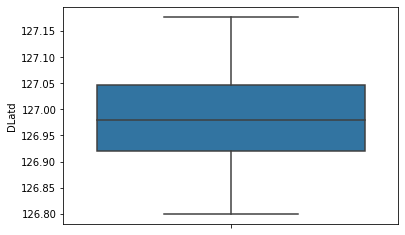

In [75]:
# Perform boxplot on DLatd column of the dataset
sns.boxplot(y=data["DLatd"])

from above box plot graph:

DLatd

25% of DLatd have value between range 126.80 to 126.92

25% of DLatd have value between range 126.92 to 126.995

25% of DLatd have value between range 126.995 to 127.055

25% of DLatd have value between range 127.055 to 127.175

The mean DLatd is around 126.995

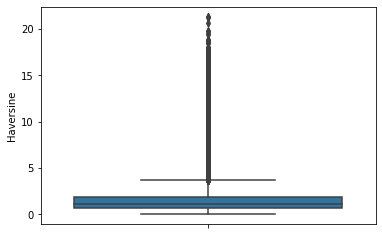

In [74]:
# Perform boxplot on Haversine column of the dataset
sns.boxplot(y=data["Haversine"])

from above box plot graph:

haversine

25% of haversine have value between range 0 to 0.25

25% of haversine have value between range 0.25 to 1

25% of haversine have value between range 1 to 2.5

25% of haversine have value between range 2.5 to 5

The mean haversine is around 1

Observation: Mostly the haversine are on the lower side of the spectrum. Means small distance trips are the common trips

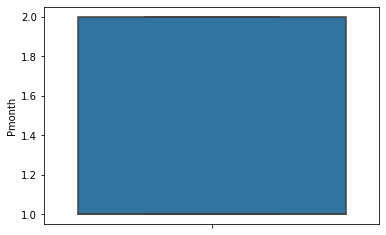

In [73]:
# Perform boxplot on pmonth column of the dataset
sns.boxplot(y=data["Pmonth"])

from above box plot graph:

Pmonth

25% of Pmonth have value between range 1 to 6

25% of Pmonth have value between range 6 to 8

25% of Pmonth have value between range 8 to 10

25% of Pmonth have value between range 10 to 12

The mean Pmonth is around 8

more pickups are in the month which are at the end of the year

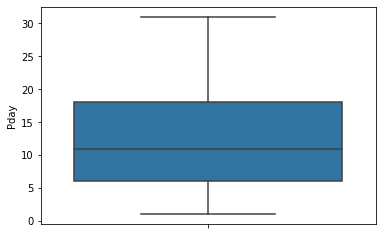

In [71]:
# Perform boxplot on Pday column of the dataset
sns.boxplot(y=data["Pday"])

from above box plot graph:

Pday

25% of Pday have value between range 1 to 8

25% of Pday have value between range 8 to 16

25% of Pday have value between range 16 to 23

25% of Pday have value between range 23 to 31

The mean Pday is around 16

pickups are almost same on every day of month

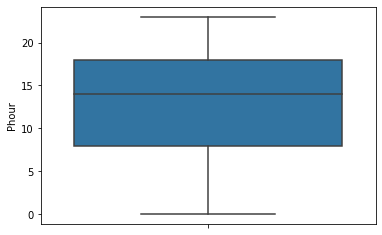

In [70]:
# Perform boxplot on Phour column of the dataset
sns.boxplot(y=data["Phour"])

from above box plot graph:

Phour

25% of Phour have value between range 0 to 10

25% of Phour have value between range 10 to 16

25% of Phour have value between range 16 to 19

25% of Phour have value between range 19 to 24

The mean Phour is around 16

more pickups are towards the end of the day

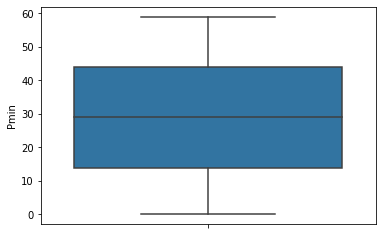

In [69]:
# Perform boxplot on Pmin column of the dataset
sns.boxplot(y=data["Pmin"])

from above box plot graph:

Pmin

25% of Pmin have value between range 0 to 14

25% of Pmin have value between range 14 to 29

25% of Pmin have value between range 29 to 44

25% of Pmin have value between range 44 to 60

The mean Pmin is around 29

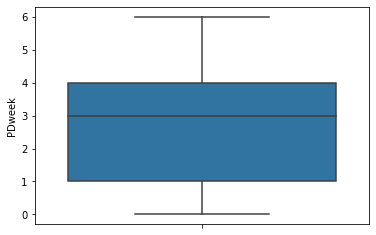

In [68]:
# Perform boxplot on PDweek column of the dataset 
sns.boxplot(y=data["PDweek"])

from above box plot graph:

PDweek

25% of PDweek have value between range 0 to 1

25% of PDweek have value between range 1 to 3

25% of PDweek have value between range 3 to 5

25% of PDweek have value between range 3 to 6

The mean PDweek is around 3

equal pickups throughout the week

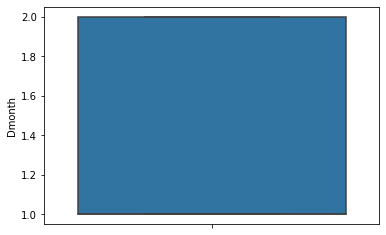

In [67]:
# Perform boxplot on Dmonth column of the dataset
sns.boxplot(y=data["Dmonth"])

from above box plot graph:

Dmonth

25% of Dmonth have value between range 1 to 6

25% of Dmonth have value between range 6 to 8

25% of Dmonth have value between range 8 to 10

25% of Dmonth have value between range 10 to 12

The mean Dmonth is around 8

more drop offs are towords the end months of the year

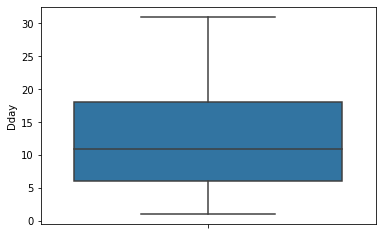

In [66]:
# Perform boxplot on Dday column of the dataset 
sns.boxplot(y=data["Dday"])

from above box plot graph:

Dday

25% of Dday have value between range 1 to 8

25% of Dday have value between range 8 to 16

25% of Dday have value between range 16 to 23

25% of Dday have value between range 23 to 31

The mean Dday is around 16

drops the equal throughout all the days of month

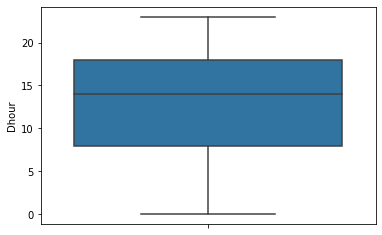

In [65]:
# Perform boxplot on Dhour column of the dataset
sns.boxplot(y=data["Dhour"])

from above box plot graph:

Dhour

25% of Dhour have value between range 0 to 10

25% of Dhour have value between range 10 to 16

25% of Dhour have value between range 16 to 20

25% of Dhour have value between range 20 to 24

The mean Dhour is around 16

drops offs are more towards the end hours of the day

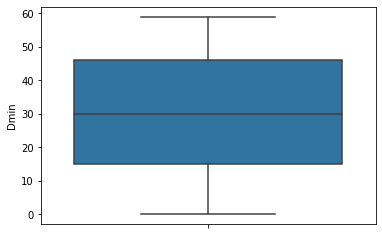

In [64]:
# Perform boxplot on Dmin column of the dataset
sns.boxplot(y=data["Dmin"])

from above box plot graph:

Dmin

25% of Dmin have value between range 0 to 15

25% of Dmin have value between range 15 to 30

25% of Dmin have value between range 30 to 45

25% of Dmin have value between range 45 to 60

The mean Dmin is around 30

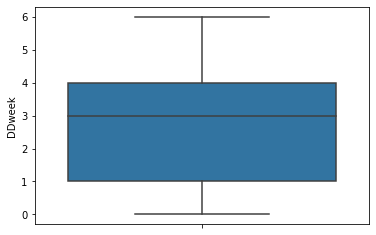

In [63]:
# Perform boxplot on DDweek column of the dataset
sns.boxplot(y=data["DDweek"])

from above box plot graph:

DDweek

25% of DDweek have value between range 0 to 1

25% of DDweek have value between range 1 to 3

25% of DDweek have value between range 3 to 5

25% of DDweek have value between range 5 to 6

The mean DDweek is around 3

drops are equal throughout the week

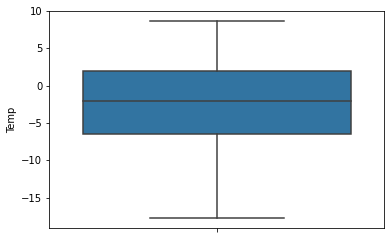

In [62]:
# Perform boxplot on Temp column of the dataset
sns.boxplot(y=data["Temp"])

from above box plot graph:

temperature

25% of temperature have value between range -8 to 2

25% of temperature have value between range 2 to 20

25% of temperature have value between range 20 to 26

25% of temperature have value between range 26 to 40

The mean temperature is around 20

trips are planned in slightly high temperature

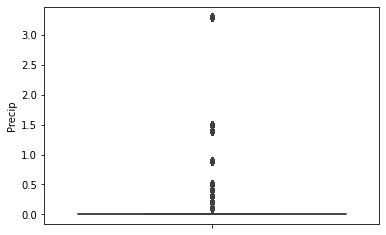

In [61]:
# Perform boxplot on Precip column of the dataset
# Using pandas 
sns.boxplot(y=data["Precip"])

from above box plot graph:

precip

25% of precip have value between range 0 to 0

25% of precip have value between range 0 to 0

25% of precip have value between range 0 to 0

25% of precip have value between range 0 to 0

The mean precip is around 0

more trips are planned when there is no rain or snow fall

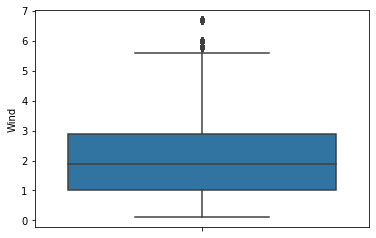

In [60]:
# Perform boxplot on wind column of the dataset
sns.boxplot(y=data["Wind"])

from above box plot graph:

wind

25% of wind have value between range 0 to 1.1

25% of wind have value between range 1.1 to 1.8

25% of wind have value between range 1.8 to 2.5

25% of wind have value between range 2.5 to 4.2

The mean wind is around 1.8

more trips are during less windy wheather

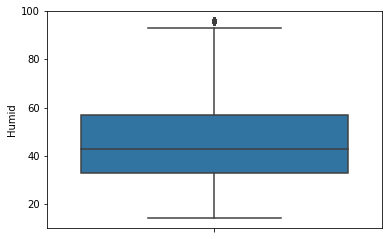

In [58]:
# Perform boxplot on humid column of the dataset
sns.boxplot(y=data["Humid"])

from above box plot graph:

humid

25% of humid have value between range 10 to 41

25% of humid have value between range 41 to 56

25% of humid have value between range 56 to 64

25% of humid have value between range 64 to 99

The mean humid is around 56

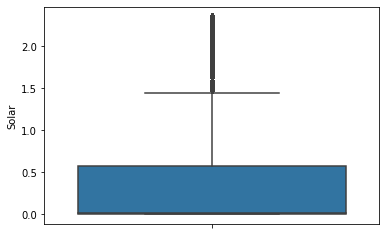

In [56]:
# Perform boxplot on solar column of the dataset 
sns.boxplot(y=data["Solar"])

from above box plot graph:

solar

25% of solar have value between range 0 to 0

25% of solar have value between range 0 to 0.25

25% of solar have value between range 0.25 to 1.25

25% of solar have value between range 1.25 to 3.1

The mean solar is around 0.25

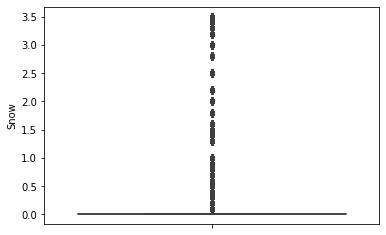

In [54]:
# Perform boxplot on snow column of the dataset 
sns.boxplot(y=data["Snow"])

from above box plot graph:

snow

25% of snow have value between range 0 to 0

25% of snow have value between range 0 to 0

25% of snow have value between range 0 to 0

25% of snow have value between range 0 to 0

The mean snow is around 0

more trips are during when there is no snow fall

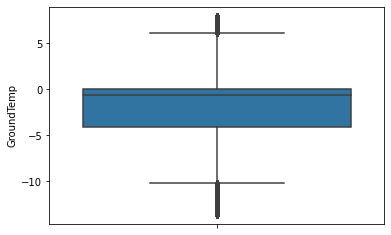

In [52]:
# Perform boxplot on GroundTemp column of the dataset
sns.boxplot(y=data["GroundTemp"])

from above box plot graph:

groundtemperature

25% of groundtemperature have value between range -12 to 11

25% of groundtemperature have value between range 11 to 21

25% of groundtemperature have value between range 21 to 29

25% of groundtemperature have value between range 29 to 52

The mean groundtemperature is around 21

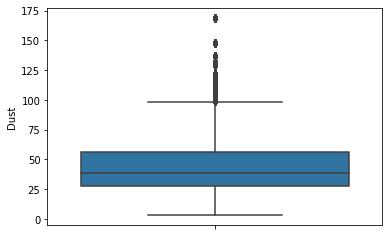

In [51]:
# Perform boxplot on dust column of the dataset
sns.boxplot(y=data["Dust"])

from above box plot graph:

dust

25% of dust have value between range 0 to 20

25% of dust have value between range 20 to 30

25% of dust have value between range 30 to 45

25% of dust have value between range 45 to 80

The mean dust is around 30

Observation: Mostly the dust are on the lower side of the spectrum. Means people preffer to travel in less dust concentration

# POINT PLOT


1. A point plot uses scatter plot glyphs to visualize features like point estimates and confidence intervals.

2. A point plot uses scatter plot points to represent the central tendency of numeric data.

3. These plots make use of error bars to indicate any uncertainty around the numeric

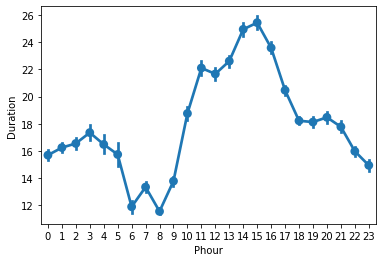

In [81]:
# Perform point plot between Phour and Duration values 
sns.pointplot(data=data,x="Phour",y="Duration")

duration is more during morning and evening

after 8 duration is increasing and after 20 its again decreasing

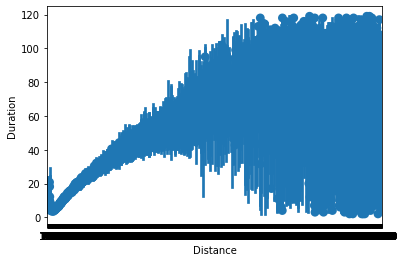

In [82]:
# Perform point plot between distance and Duration values 
sns.pointplot(data=data,x="Distance",y="Duration")

duration and distance have a positive correlation between them



as duration increases distance also increases

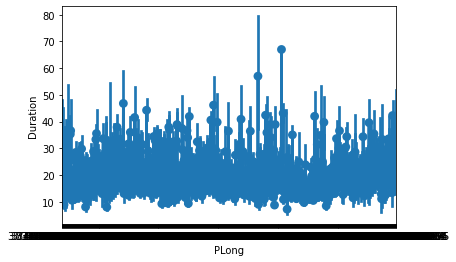

In [85]:
# Perform point plot between PLong and Duration values 
sns.pointplot(data=data,x="PLong",y="Duration")

as duration  increases  pickup longitude decreases

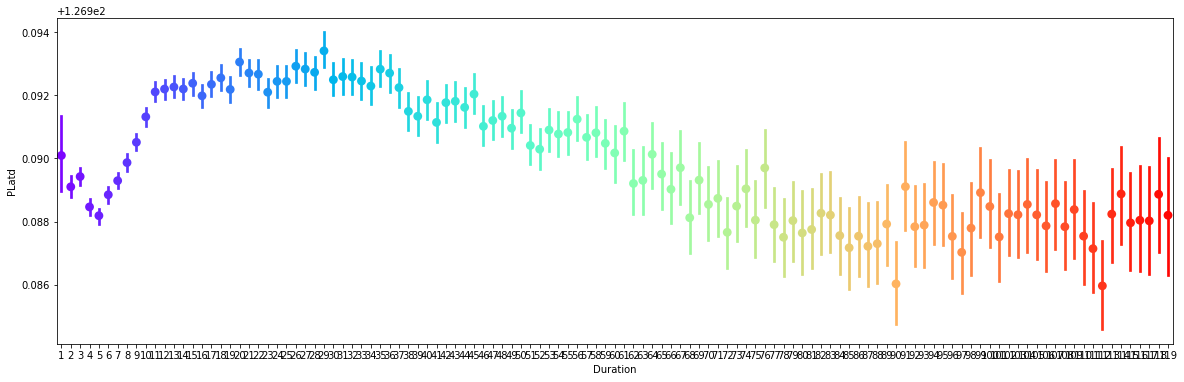

In [ ]:
# Perform point plot between PLatd and Duration values 


duration and PLatd has negative correlation between them.

as the value of duration increases value of PLatd decreases

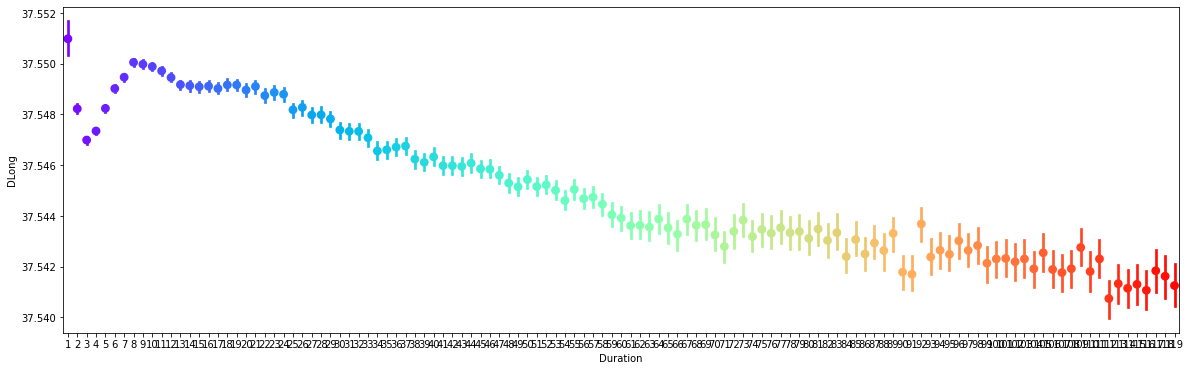

In [ ]:
# Perform point plot between DLong and Duration values 


duration and DLong has negative correlation between them.

as the value of duration increases value of DLong decreases

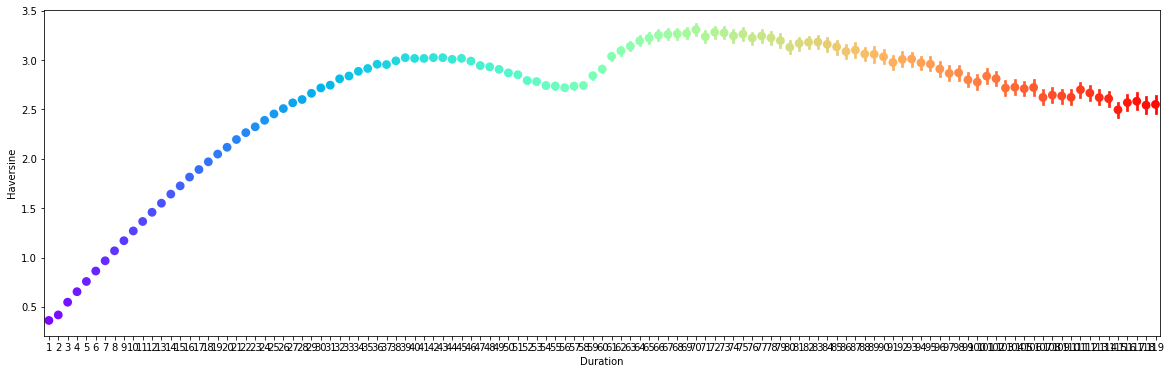

In [ ]:
# Perform point plot between haversine and Duration values 


duration and haversine are correlated 

they have positive correlation between them

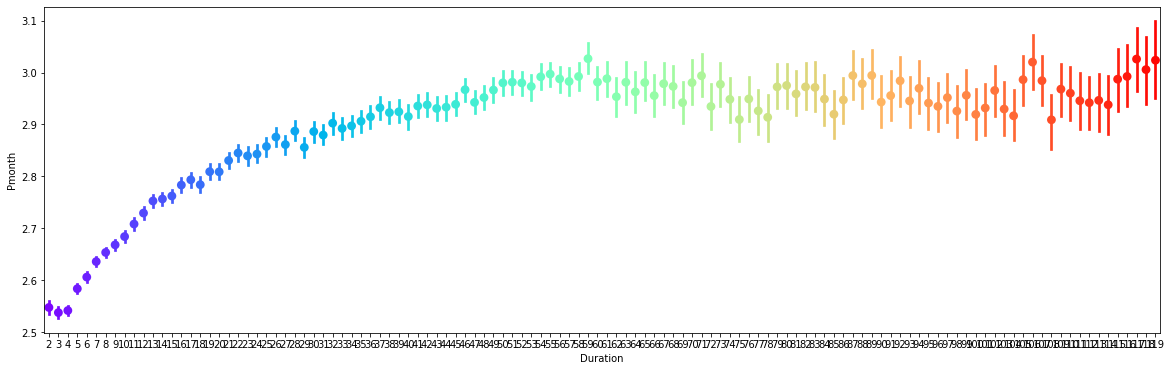

In [ ]:
# Perform point plot between Pmonth and Duration values 


pmonth and duration are positively correlated

as the value of duration increases value of Pmonth also increases






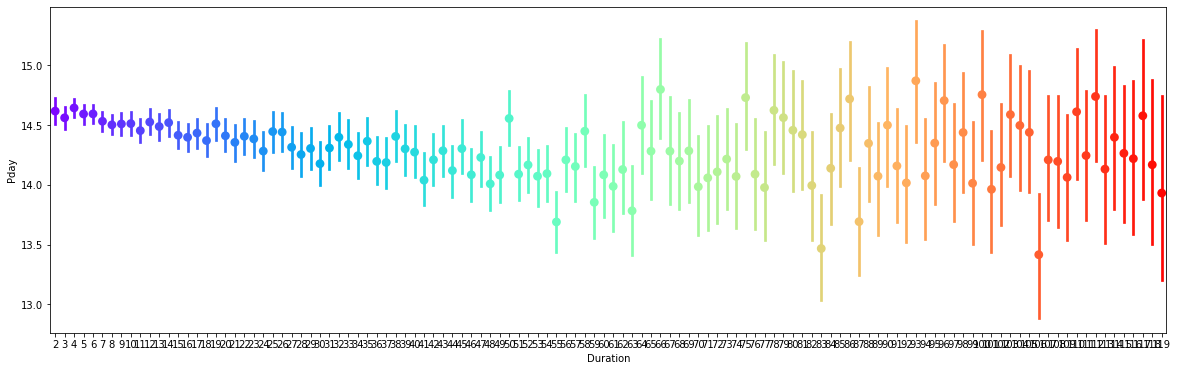

In [ ]:
# Perform point plot between Pday and Duration values 


most of the points are between 14.0 and 15.0

very few are above 15,0 and below 14.0

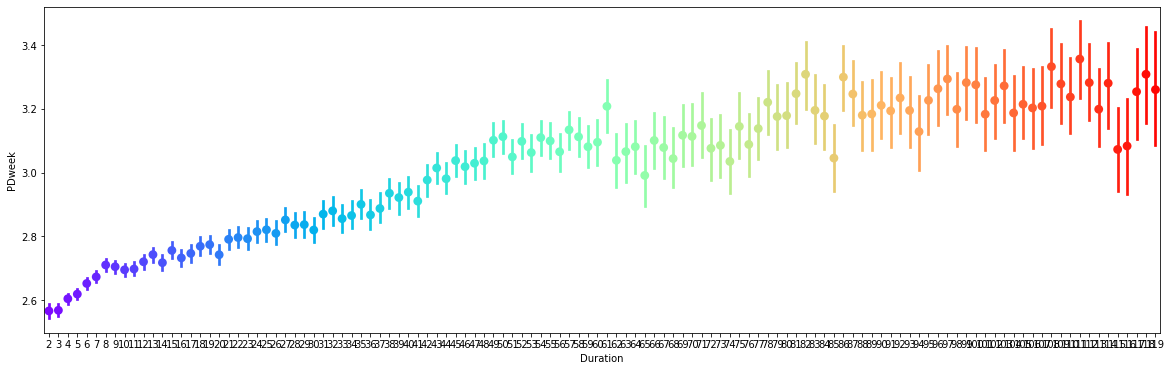

In [ ]:
# Perform point plot between PDweek and Duration values 


Duration has a positive correlation with PDweek

as the value of duration increasing value of PDweek is also increasing

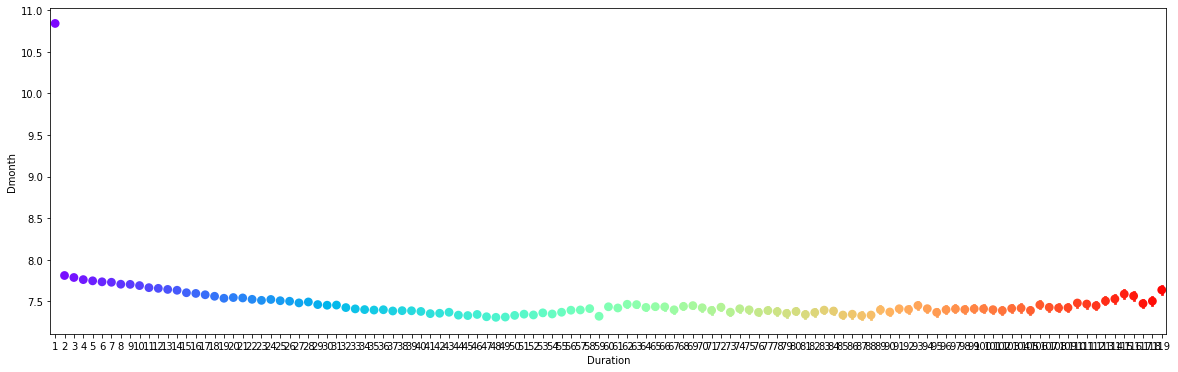

In [ ]:
# Perform point plot between Dmonth and Duration values 


all values are between 7.5 and 7.8 

there is no relation between Dmonth and Duration

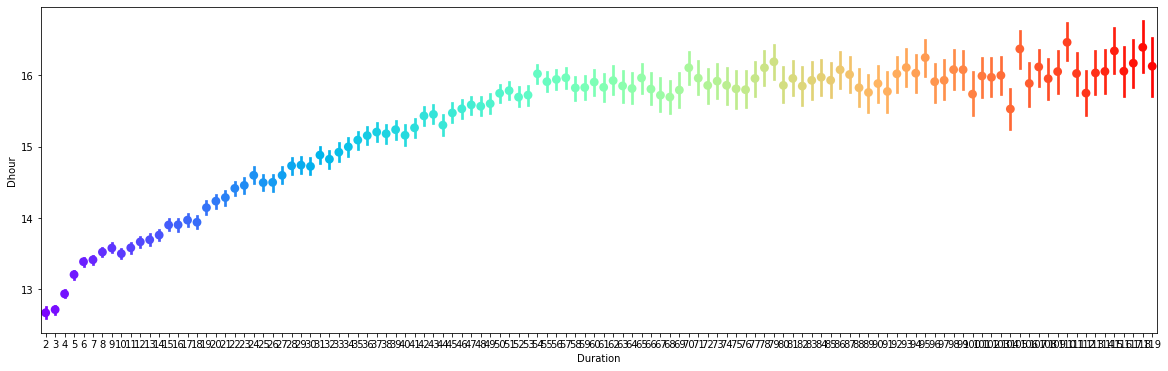

In [ ]:
# Perform point plot between Dhour and Duration values 


there is a positive relation between duration and Dhour 

as the value of duration increases value of Dhour also increases

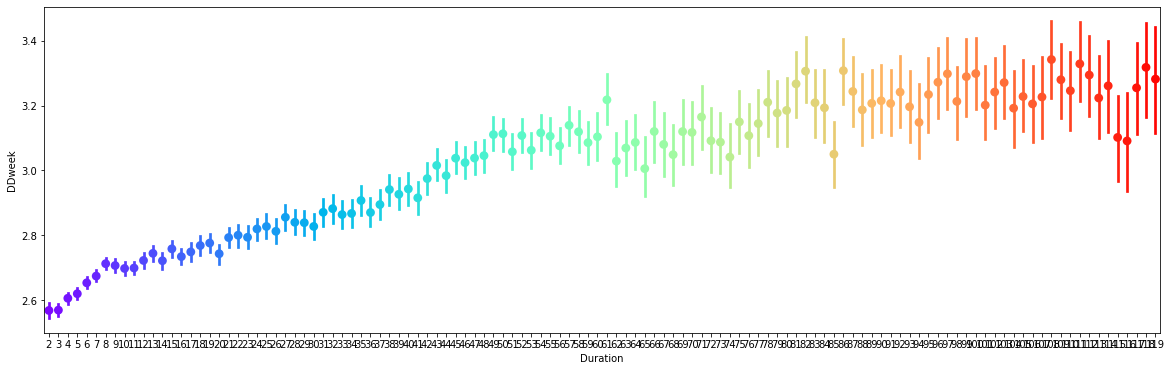

In [ ]:
# Perform point plot between DDweek and Duration values 


there is increase in DDweek when there is increase in duration

they are correlated to each other

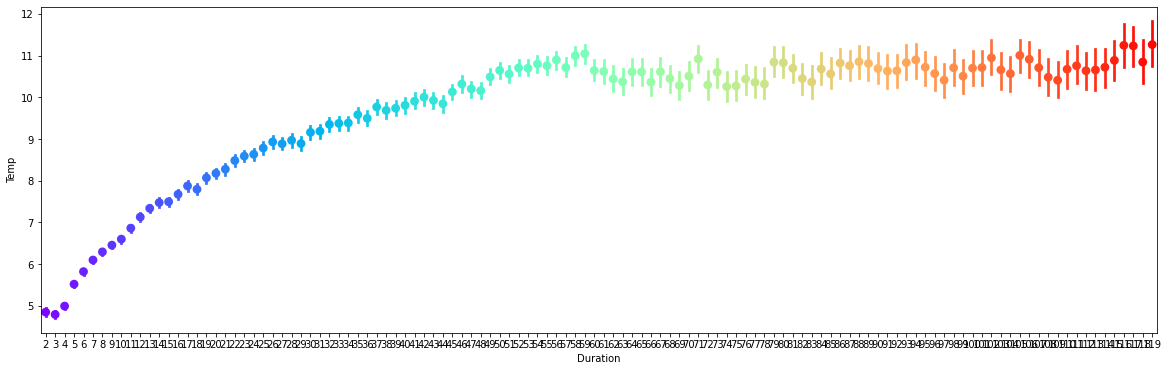

In [ ]:
# Perform point plot between Temp and Duration values 


duration and templerature have a positive relation between them


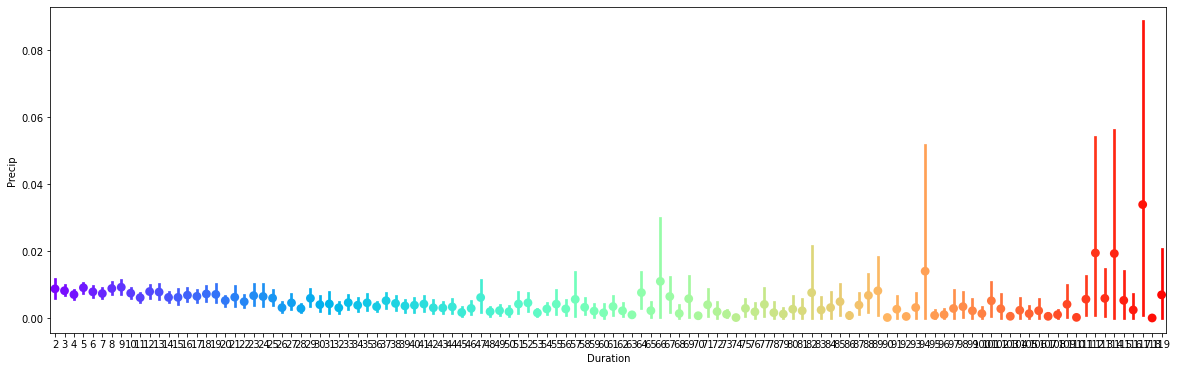

In [ ]:
# Perform point plot between Precip and Duration values 


most of the values are between 0.0 and 0.01

very few values are above 0.01

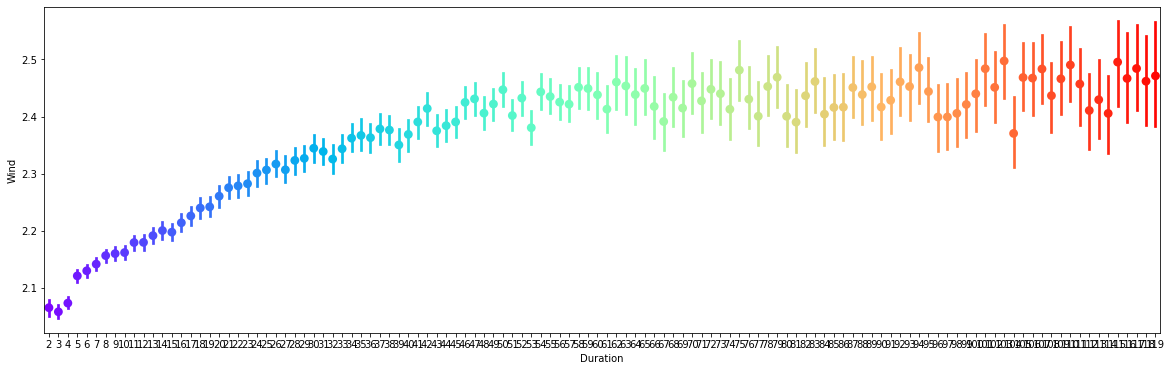

In [ ]:
# Perform point plot between wind and Duration values 


duration and wind are correlated 

as the value of duration increases value of wind is also increasing

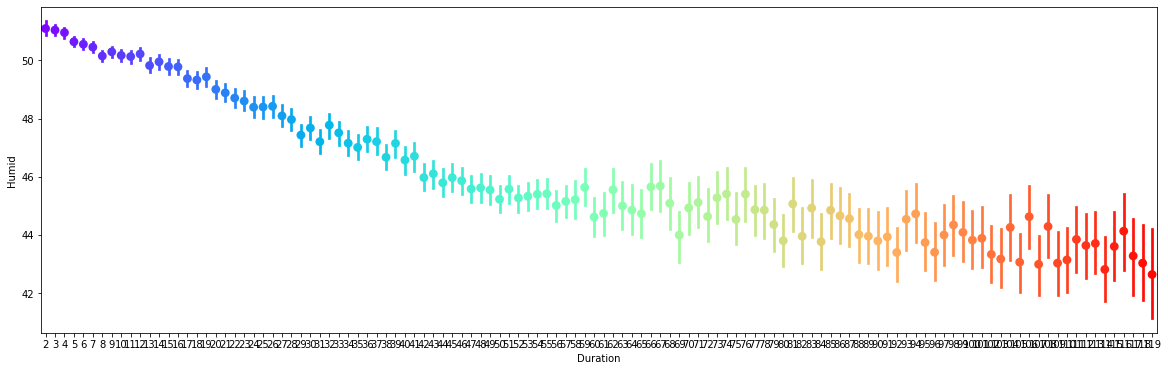

In [ ]:
# Perform point plot between humid and Duration values 


duration and humidity are negatively correlated 

as the value of duration is increasing value of humidity decreases

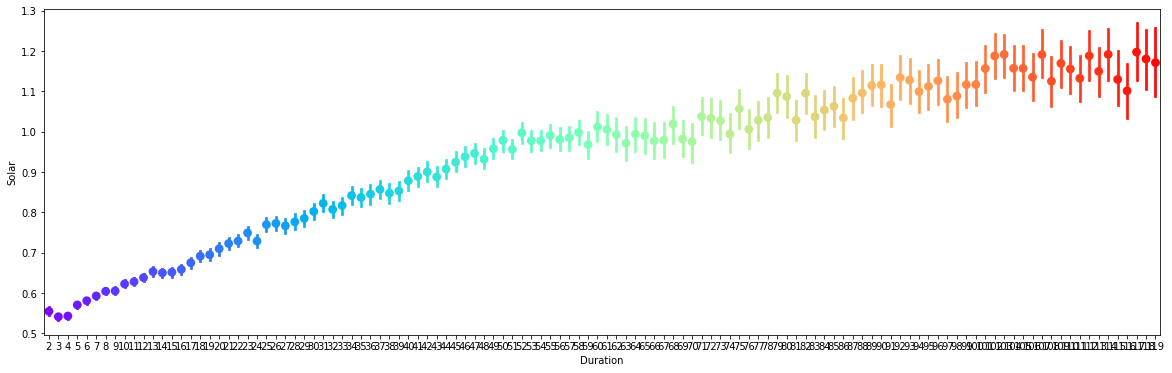

In [ ]:
# Perform point plot between solar and Duration values 


as the value of duration is increasing value of solar radiations is also increasing

they are correlated to each other

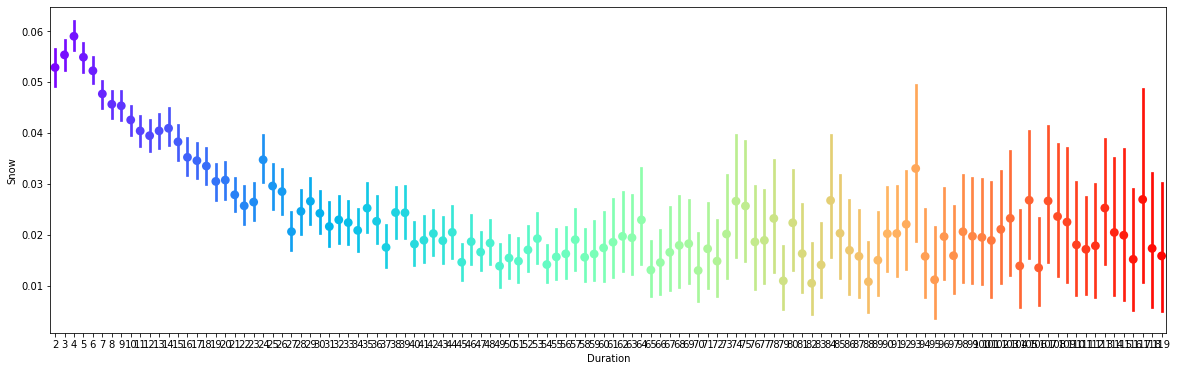

In [ ]:
# Perform point plot between snow and Duration values 


snow and duration are correlated 

they have negative relation between them

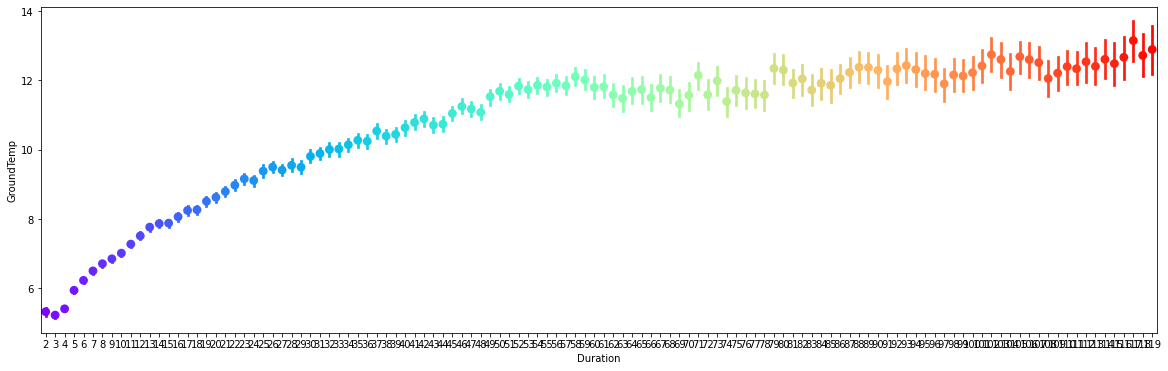

In [ ]:
# Perform point plot between GroundTemp and Duration values 


ground temperature and duration are correlated to each other.

as the value of duration increases value of ground temperature also increases

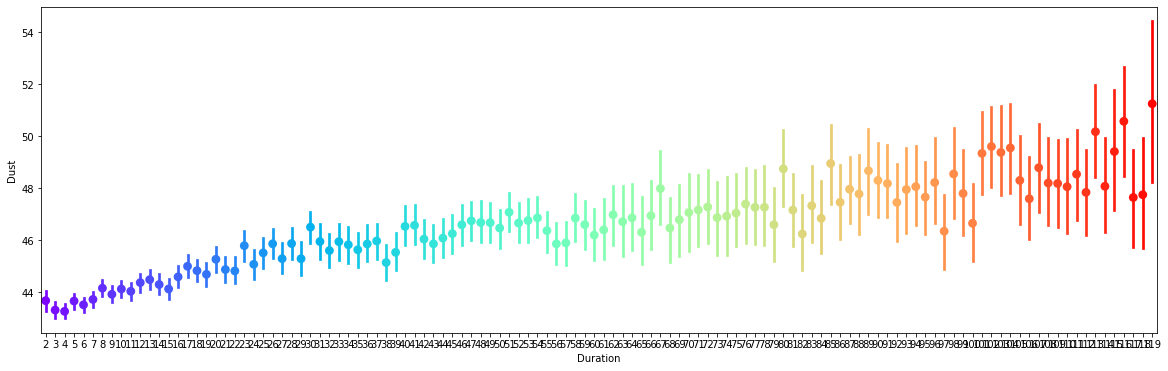

In [ ]:
# Perform point plot between dust and Duration values 


dust and duration are correlated to each other.

as the value of duration increases value of dust also increases

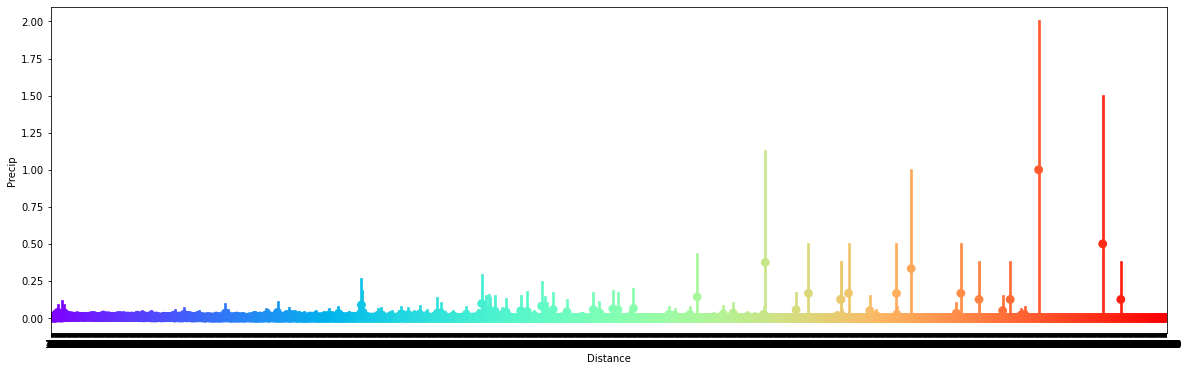

In [ ]:
# Perform point plot between precip and distance values 


all the values are around 0.00

very few are above 0.00

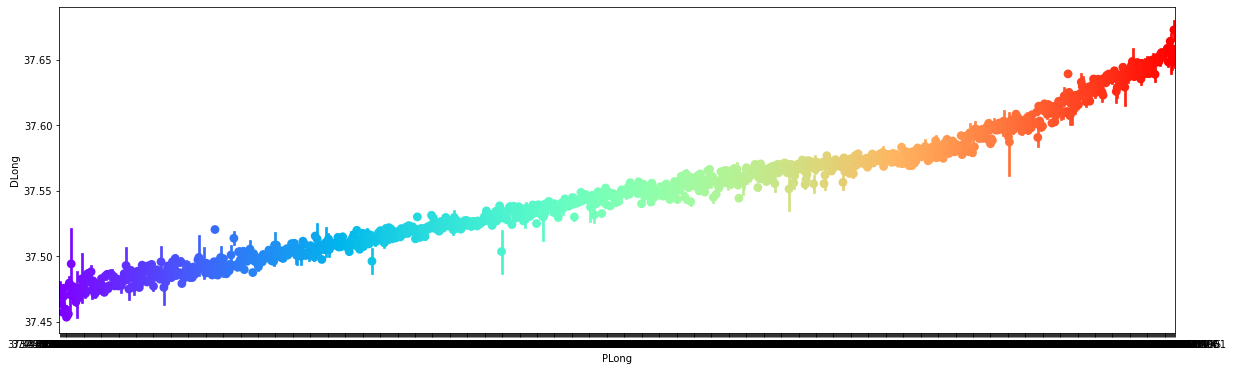

In [ ]:
# Perform point plot between PLong and Dlong values 


Plong and Dlong are corelated

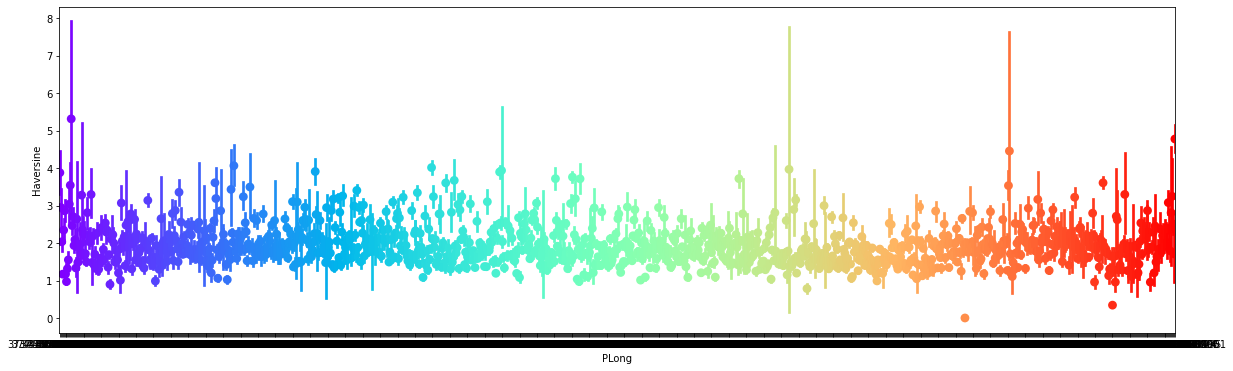

In [ ]:
# Perform point plot between PLong and haversine values 


all the values are between 1 and 3

very few are above 3 and below 1

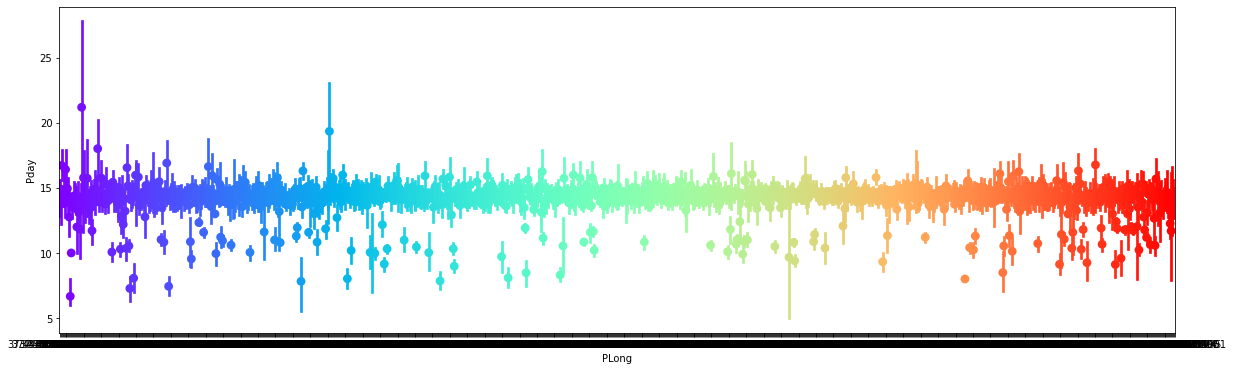

In [ ]:
# Perform point plot between PLong and Pday values 


all the values are between 12.5 to 17.5

very few are above 17.5 and below 12.5

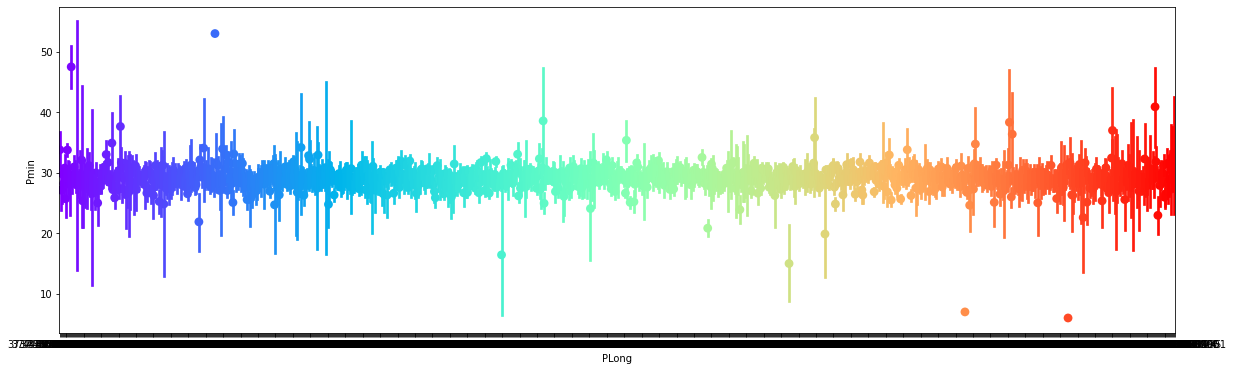

In [ ]:
# Perform point plot between PLong and Pmin values 


all the values are between 25 to 35

very few are above and below of this range

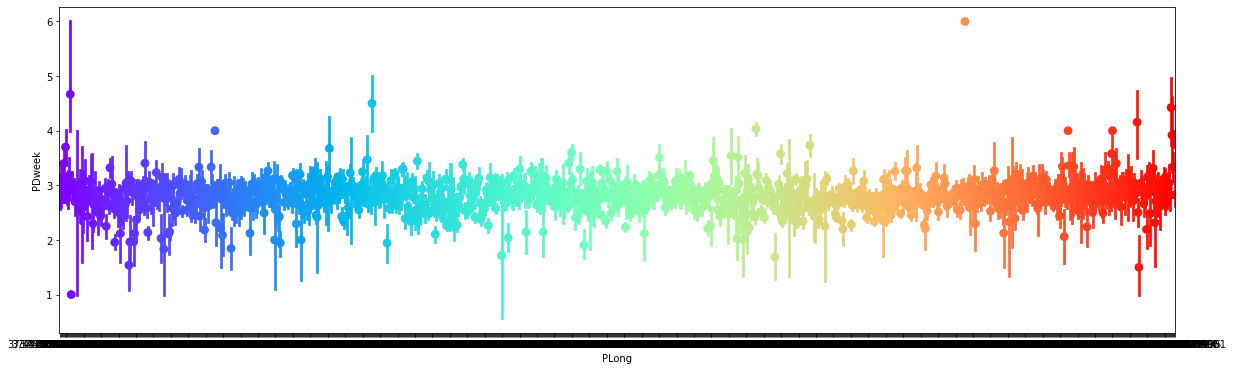

In [ ]:
# Perform point plot between PLong and PDweek values 


all the values are between 2 to 4

very few are above and below of this range

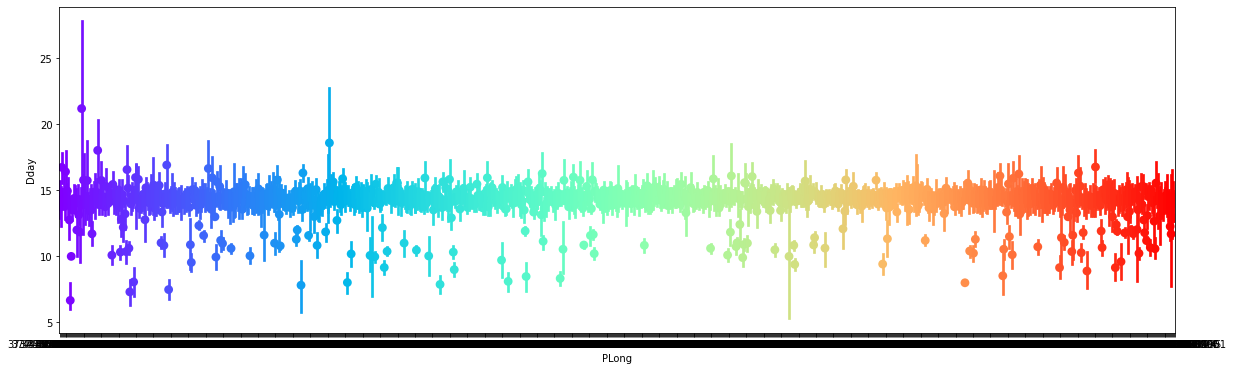

In [ ]:
# Perform point plot between PLong and Dday values 


all the values are between 12 to 17

very few are above and below of this range

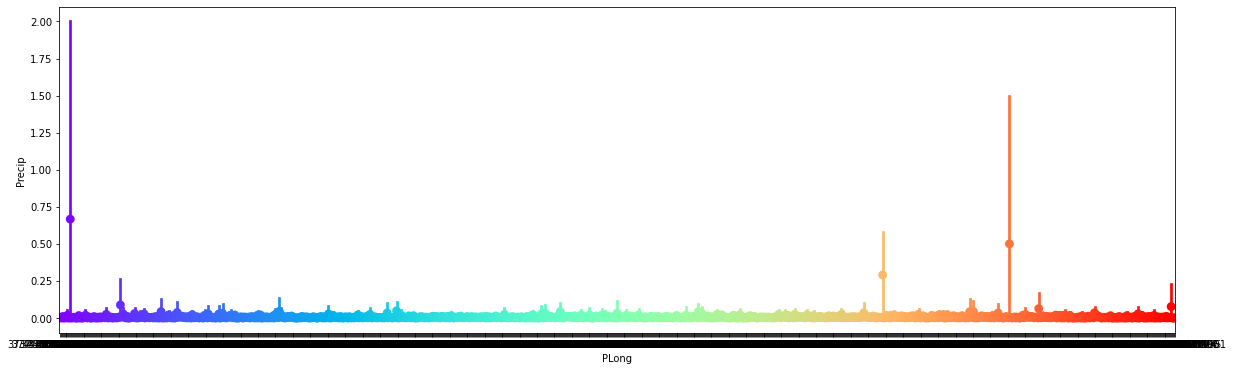

In [ ]:
# Perform point plot between PLong and Precip values 


all values are around 0.00 

very few are above 0.00

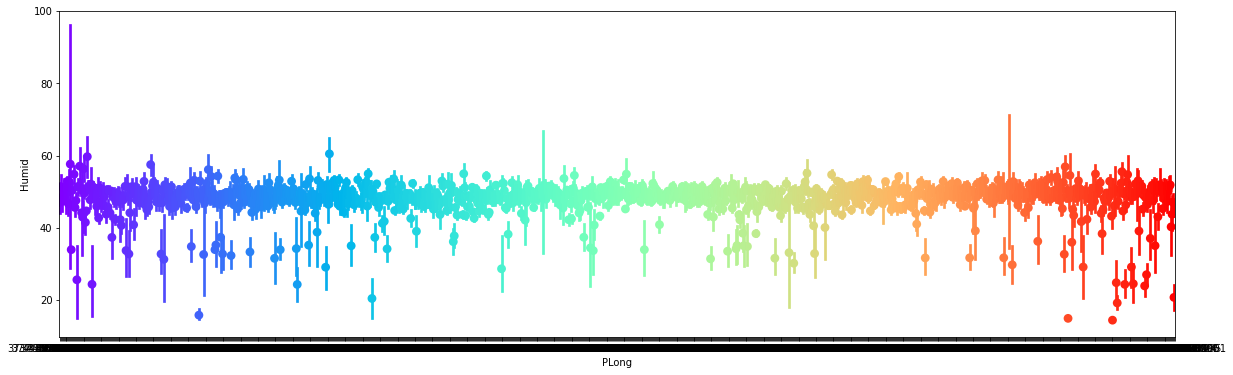

In [ ]:
# Perform point plot between PLong and Humind values 


as the distribution value of PLong is increasing the value of distribution of humidity is same

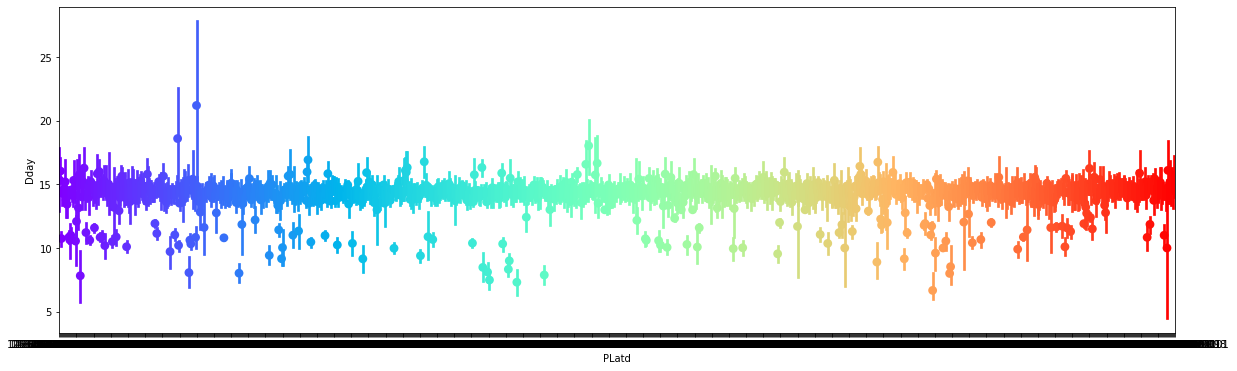

In [ ]:
# Perform point plot between PLatd and Dday values 


all valies are around 15

very few are above and below of 15

# COUNT PLOT

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


Text(0.5, 1.0, 'PICKUP HOURS DISTRIBUTION')

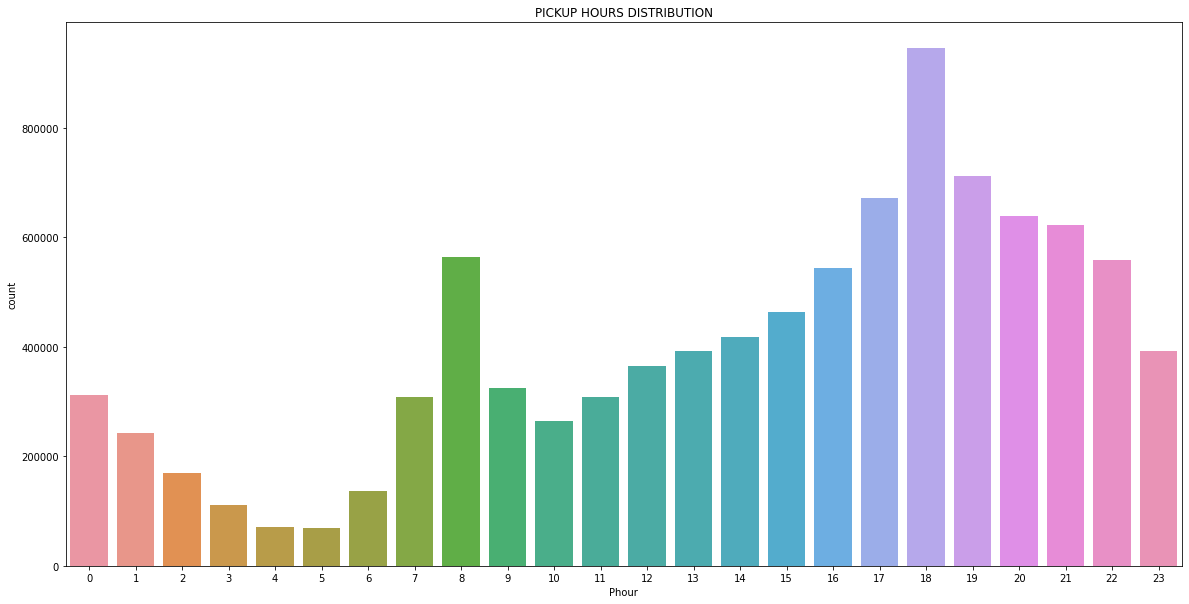

In [ ]:
# Perform the countplot on the pickup hour data


more pickups are on morning and evening 

Text(0.5, 1.0, 'DROP HOURS DISTRIBUTION')

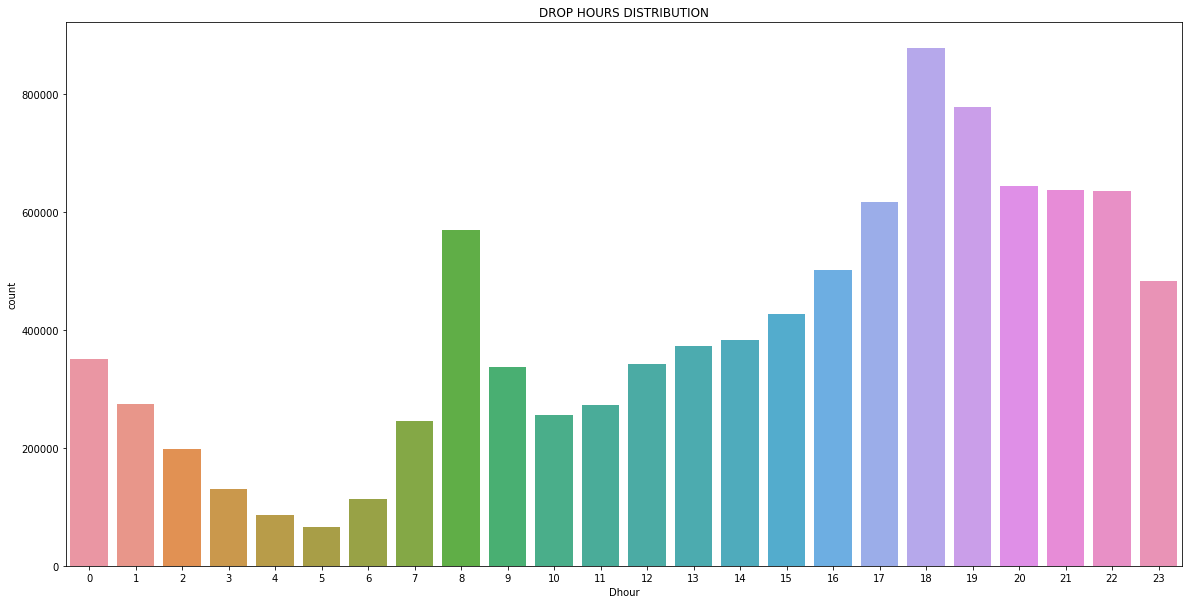

In [ ]:
# Perform the countplot on the drop hour data


Observation:  Dropoff hour are high at the office hours both at morning and evening



Text(0.5, 1.0, 'Duration DISTRIBUTION')

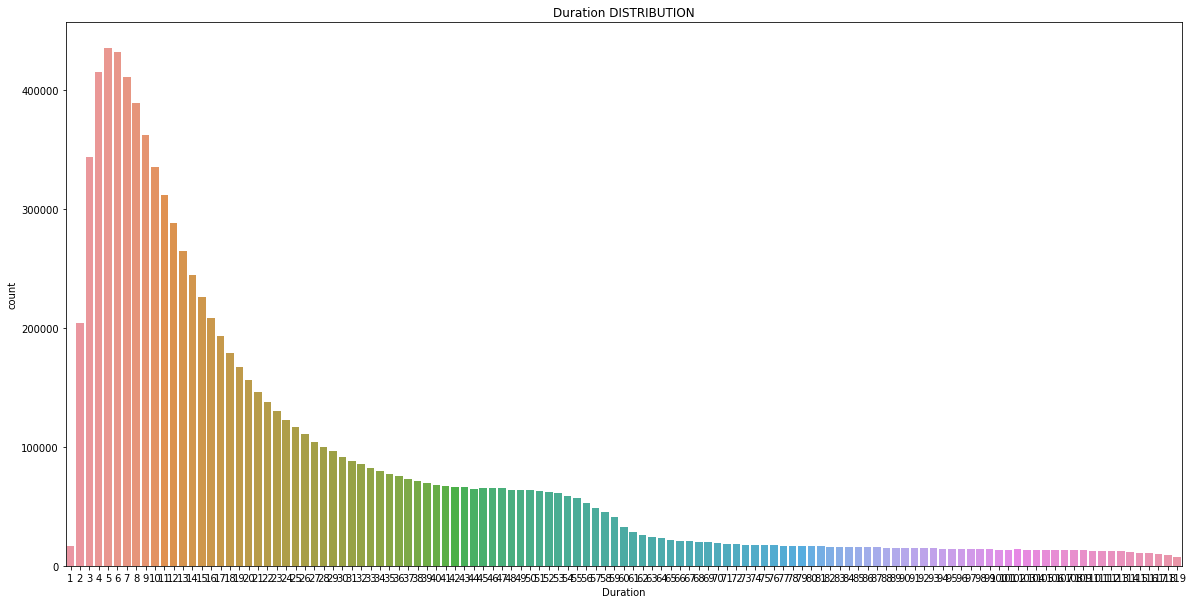

In [ ]:
# Perform the countplot on the duration data


distribution of duration is skewed left side



short duration trips are common

Text(0.5, 1.0, 'Distance DISTRIBUTION')

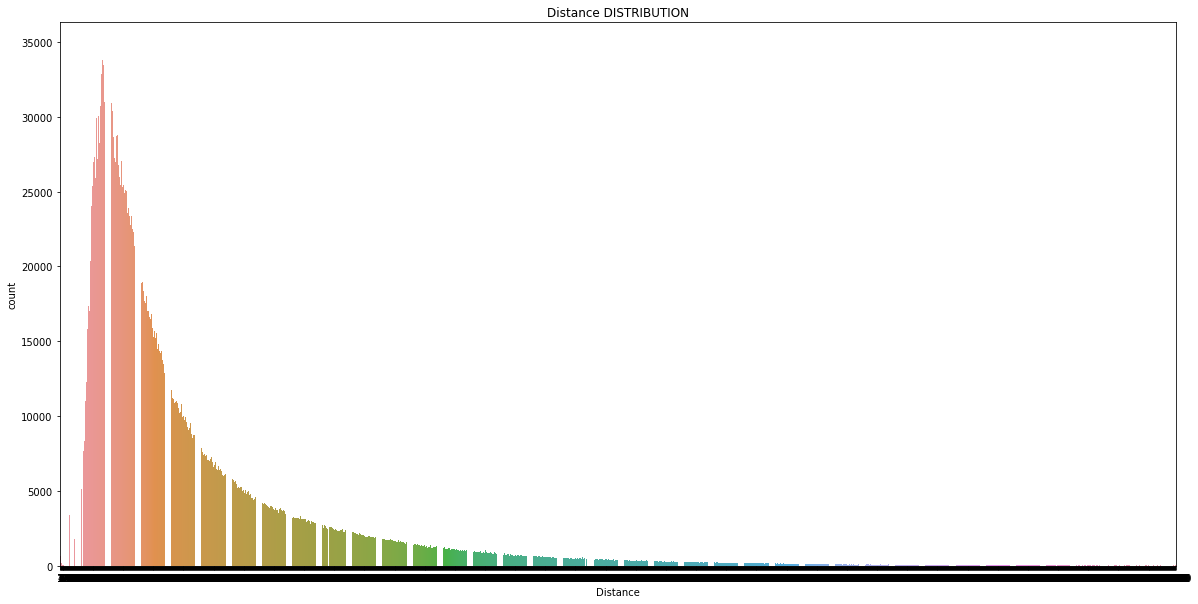

In [ ]:
# Perform the countplot on the distance data


distribution of data is skewed towards left 

short distance trips are common

Text(0.5, 1.0, 'PLong DISTRIBUTION')

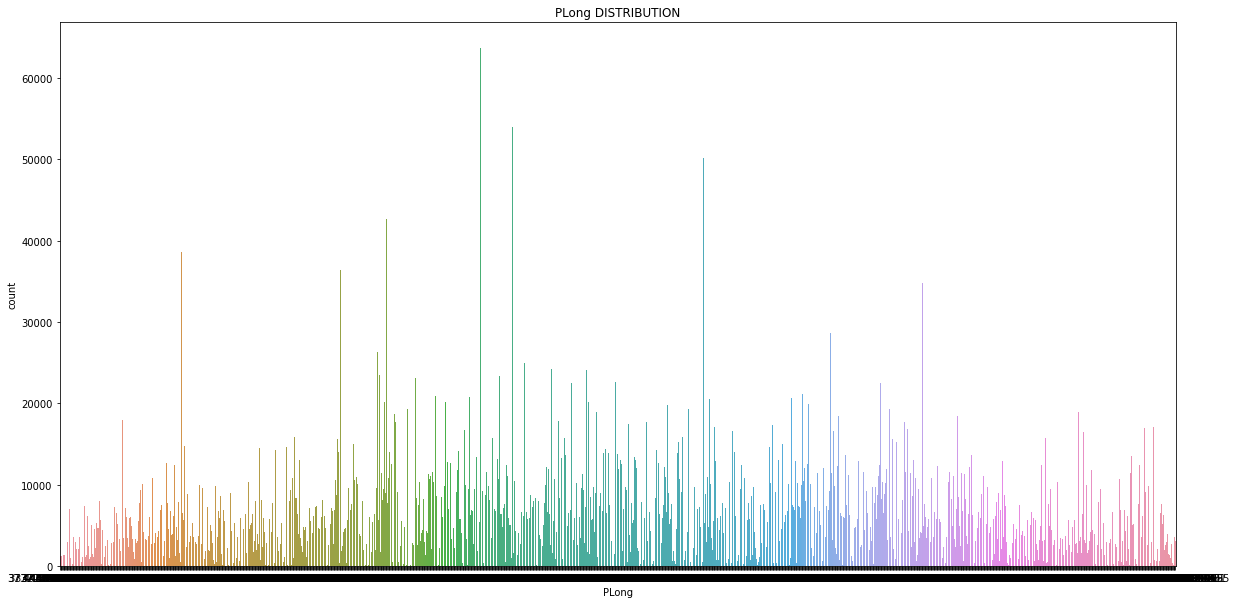

In [ ]:
# Perform the countplot on the PLong data


distribution of data is multimodal

Text(0.5, 1.0, 'PLatd DISTRIBUTION')

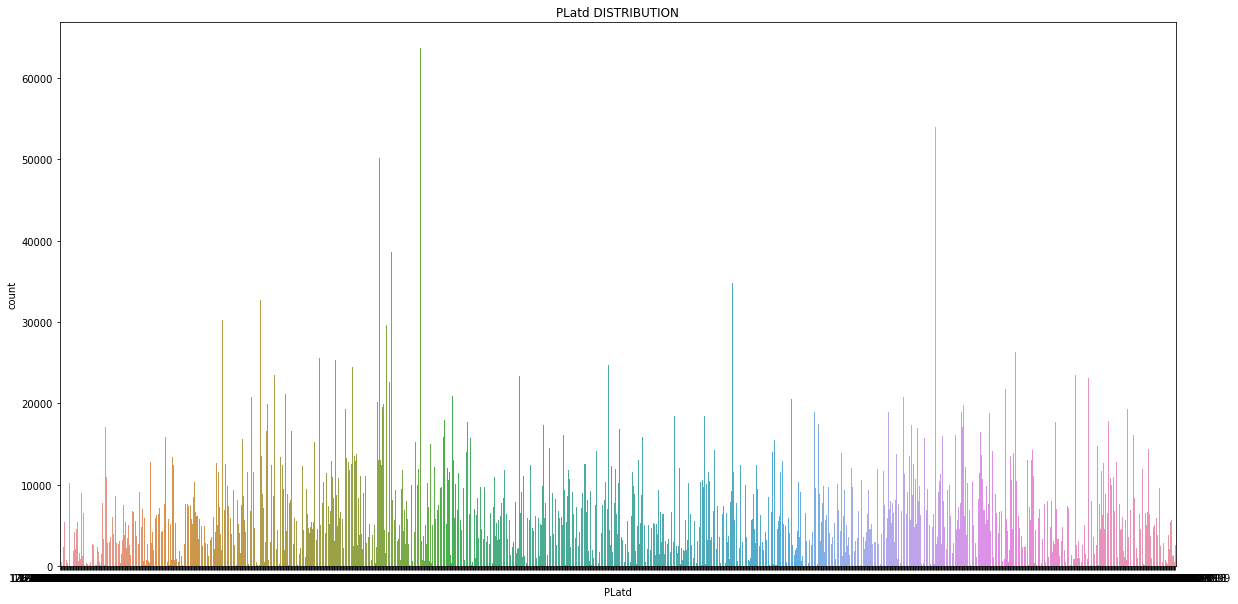

In [ ]:
# Perform the countplot on the Platd data



distribution of data is multimodal

Text(0.5, 1.0, 'DLong DISTRIBUTION')

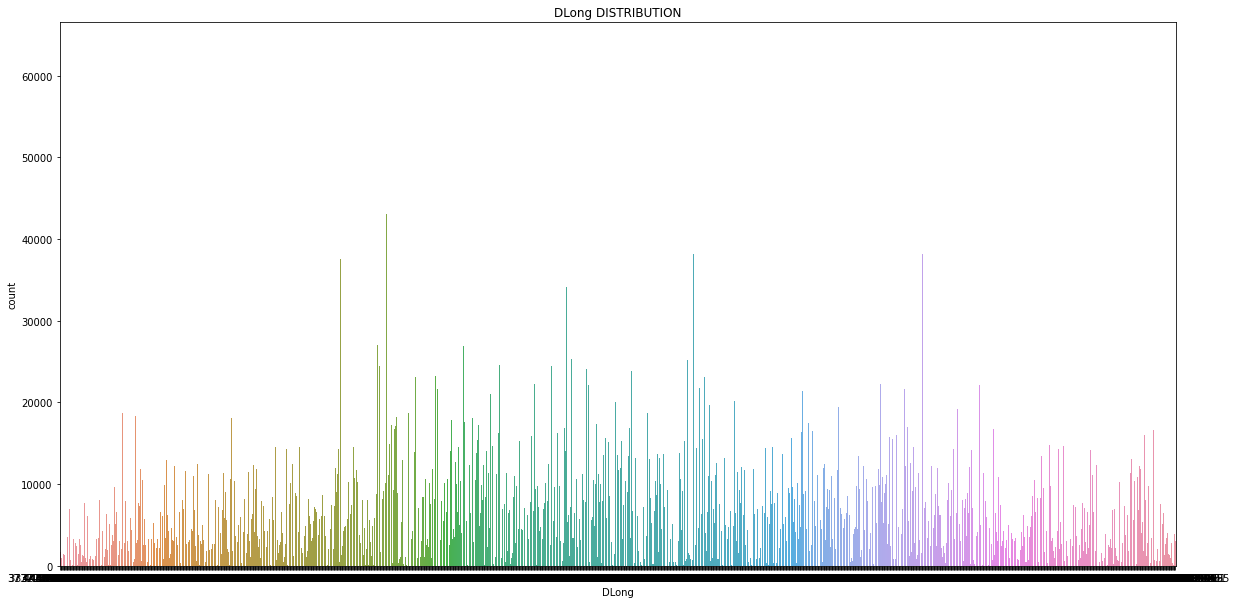

In [ ]:
# Perform the countplot on the Dlong data


distribution of data is multimodal

Text(0.5, 1.0, 'DLatd DISTRIBUTION')

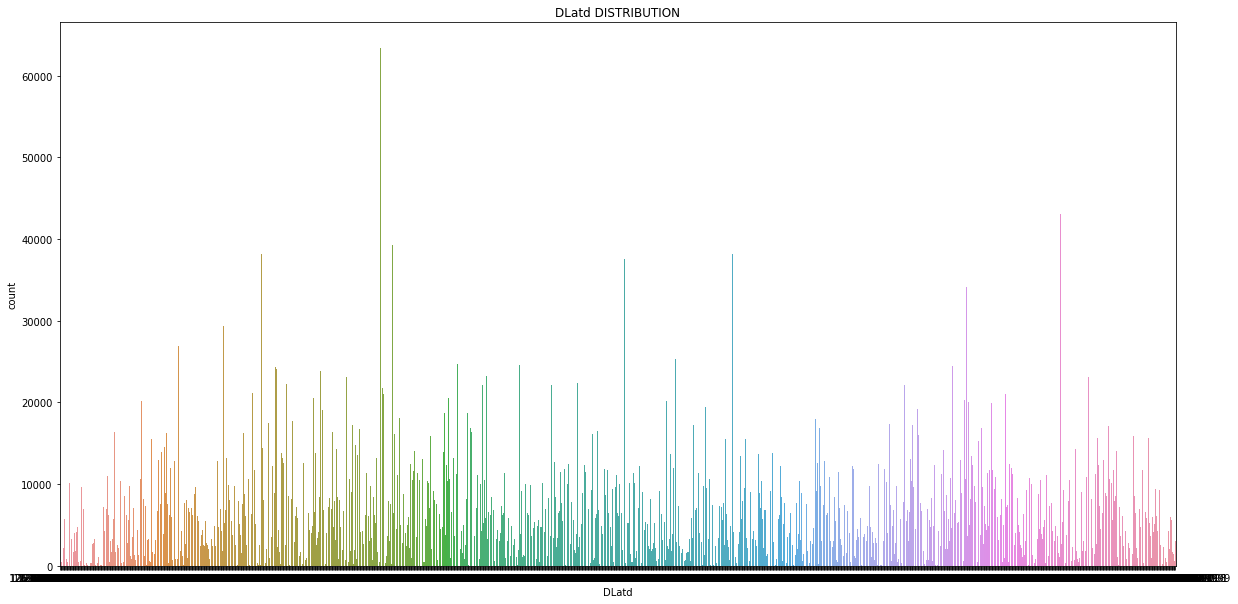

In [ ]:
# Perform the countplot on the Dlatd data


distribution of data is multimodal

Text(0.5, 1.0, 'Pmonth DISTRIBUTION')

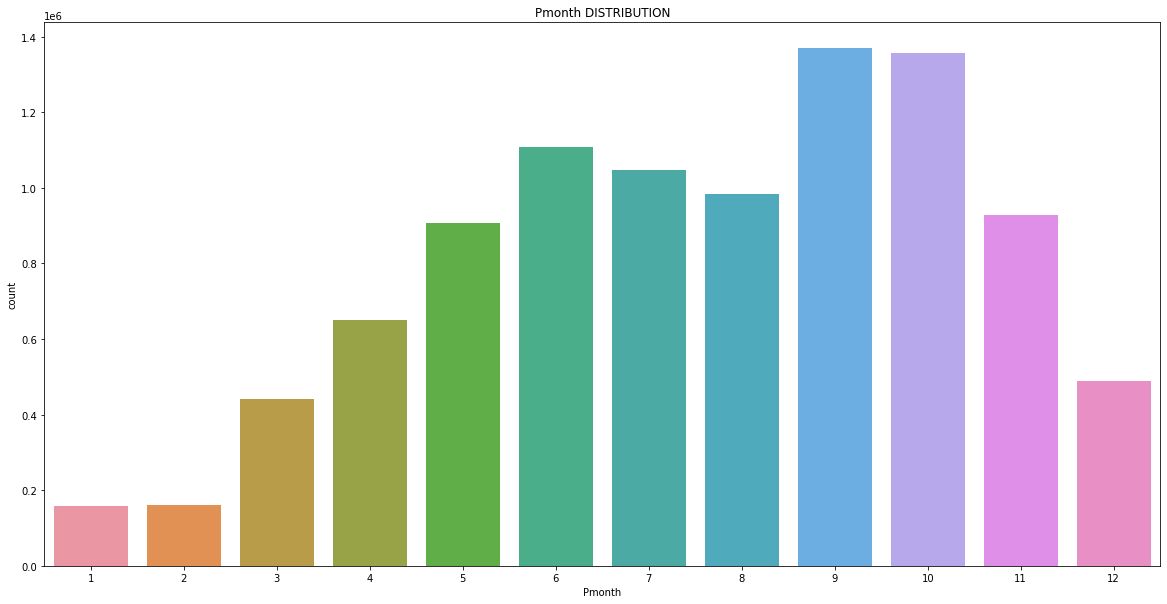

In [ ]:
# Perform the countplot on the Pmonth data


more picks are on end of the year

Text(0.5, 1.0, 'Pday DISTRIBUTION')

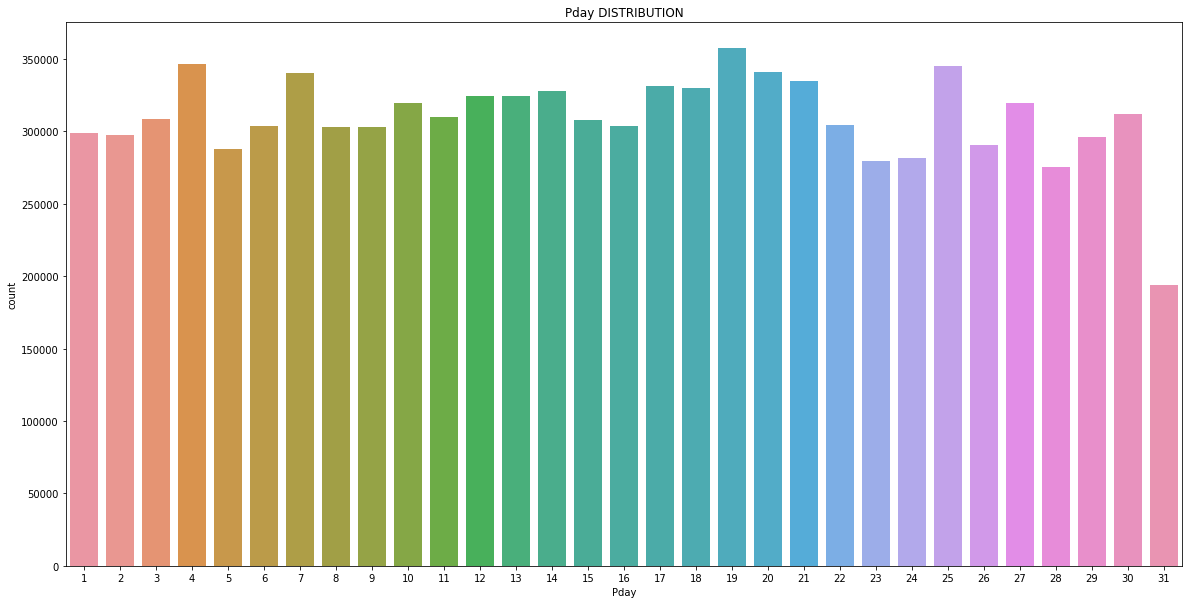

In [ ]:
# Perform the countplot on the Pday data


distribution of data is multimodal

pickups are  almost similar on every day of a month

Text(0.5, 1.0, 'Pmin DISTRIBUTION')

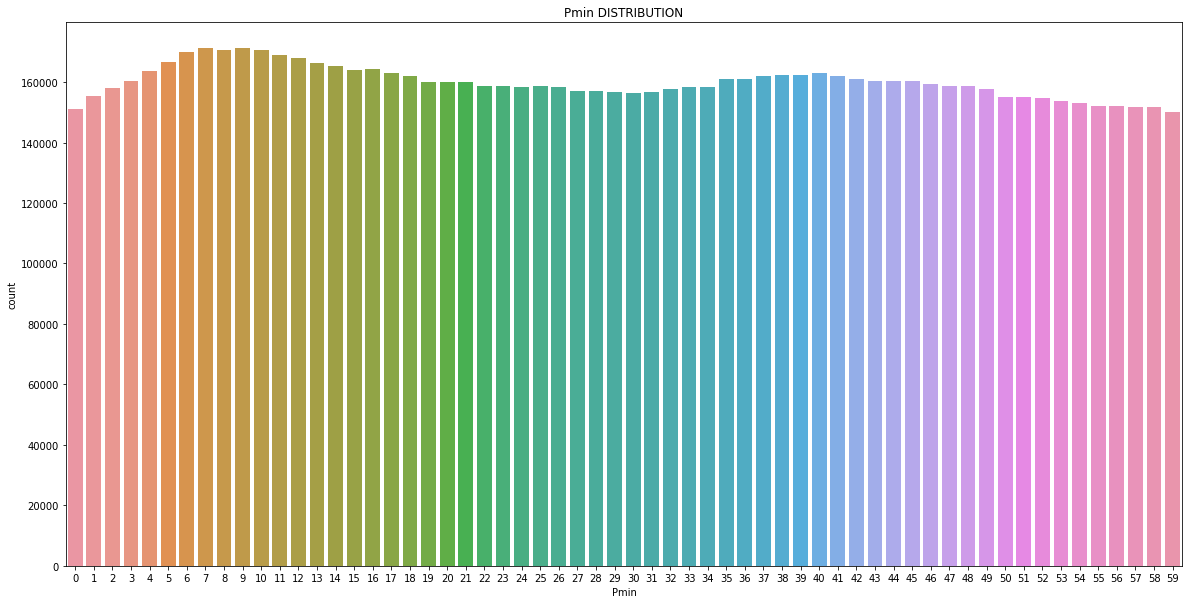

In [ ]:
# Perform the countplot on the pmin data


data is distributed equally

Text(0.5, 1.0, 'PDweek DISTRIBUTION')

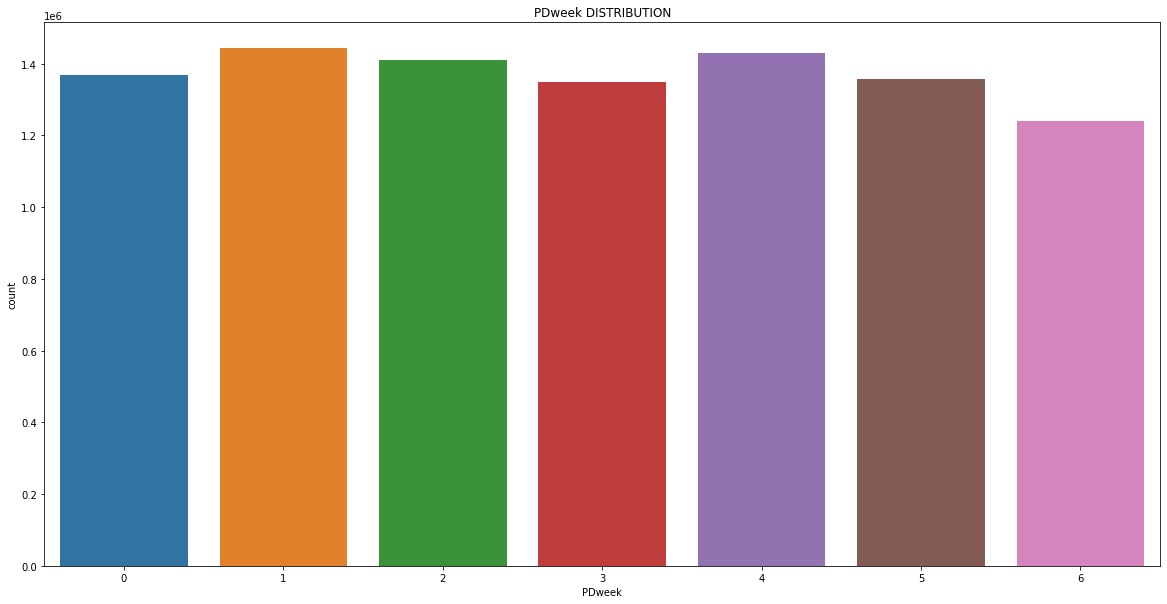

In [ ]:
# Perform the countplot on the PDweek data


data is distributed equally

Text(0.5, 1.0, ' Dday DISTRIBUTION')

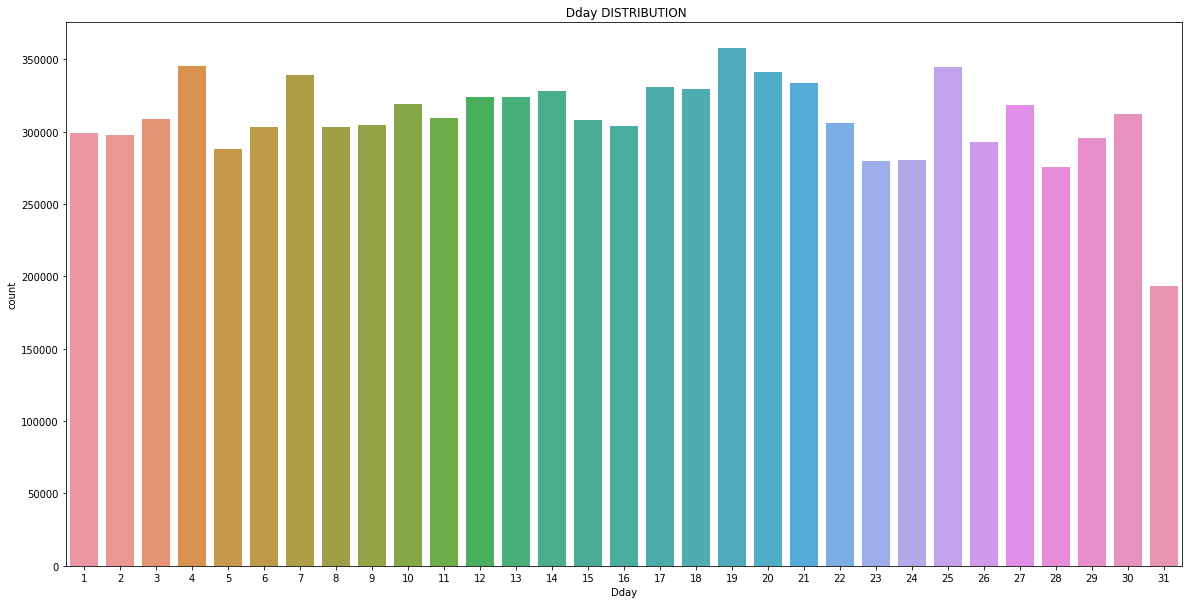

In [ ]:
# Perform the countplot on the Dday data


distribution of data is similar

drop-offs are almost similar on every day of a month

Text(0.5, 1.0, 'Dmin DISTRIBUTION')

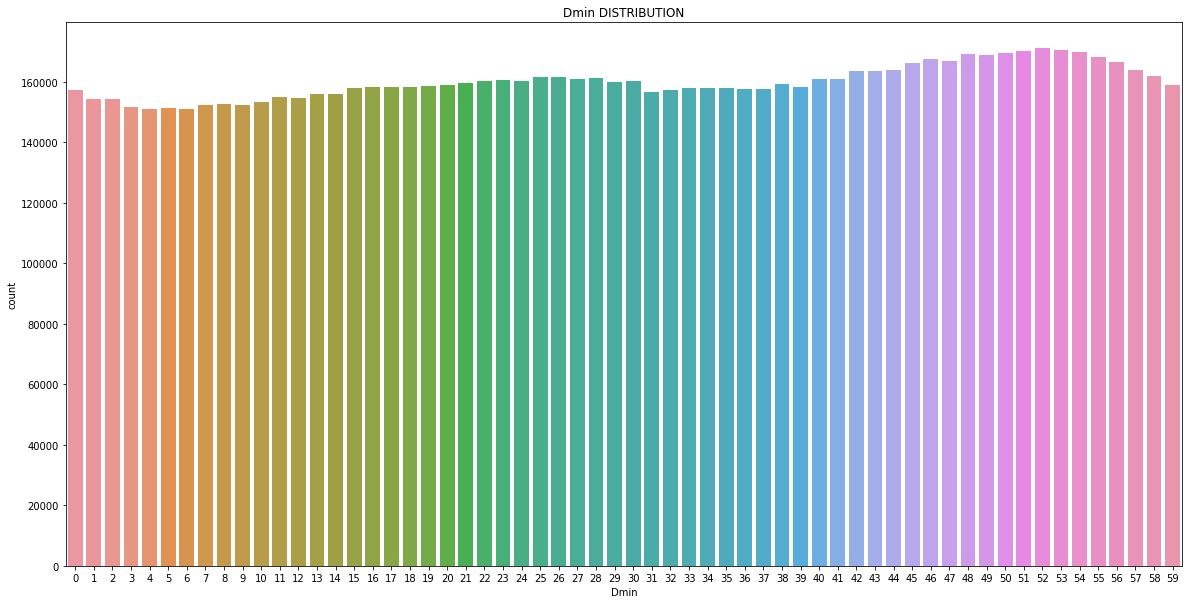

In [ ]:
# Perform the countplot on the Dmin data


data is distribited equally

drops on every minute of hour is similar

Text(0.5, 1.0, 'DDweek DISTRIBUTION')

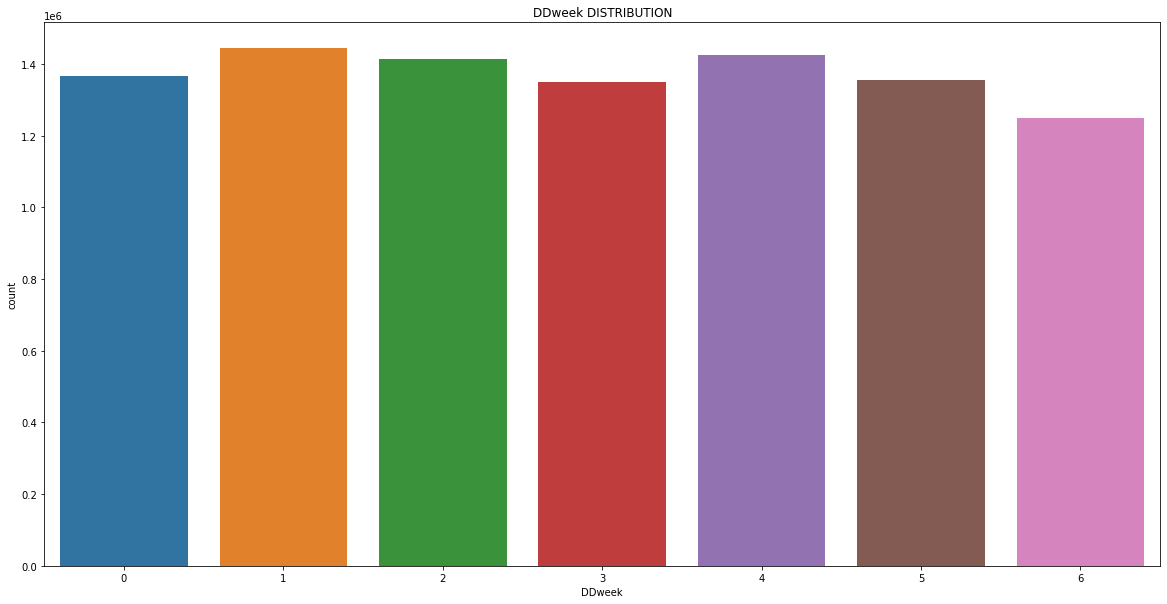

In [ ]:
# Perform the countplot on the DDweek data


drop offs on every day of a week are almost similar

Text(0.5, 1.0, 'Temp DISTRIBUTION')

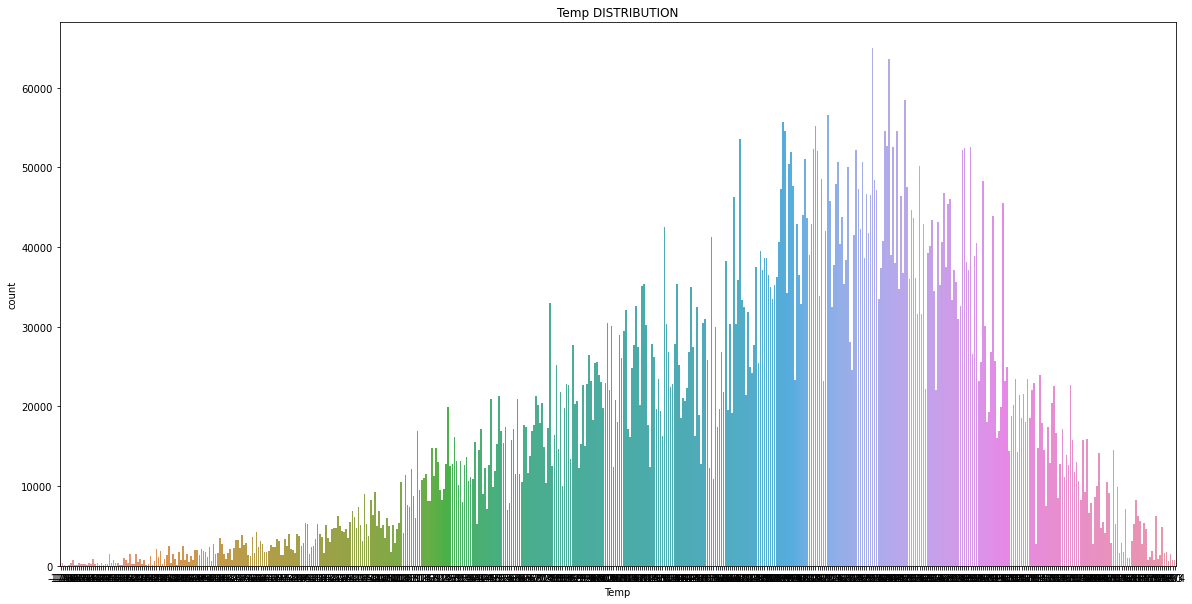

In [ ]:
# Perform the countplot on the Temp data


the distribution of data is skewed toward right

trips are avoided in less temperature

Text(0.5, 1.0, 'Precip DISTRIBUTION')

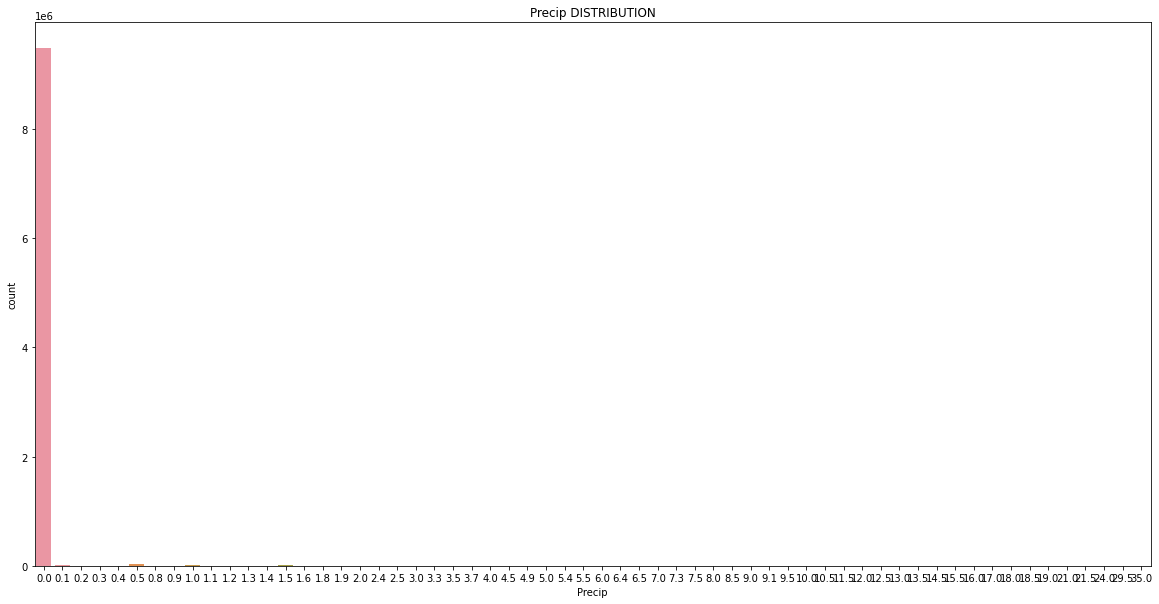

In [ ]:
# Perform the countplot on the Precip data


the distribution of data is skewed towards left

no trips are planned during rainy or snowy wheather

Text(0.5, 1.0, 'Wind DISTRIBUTION')

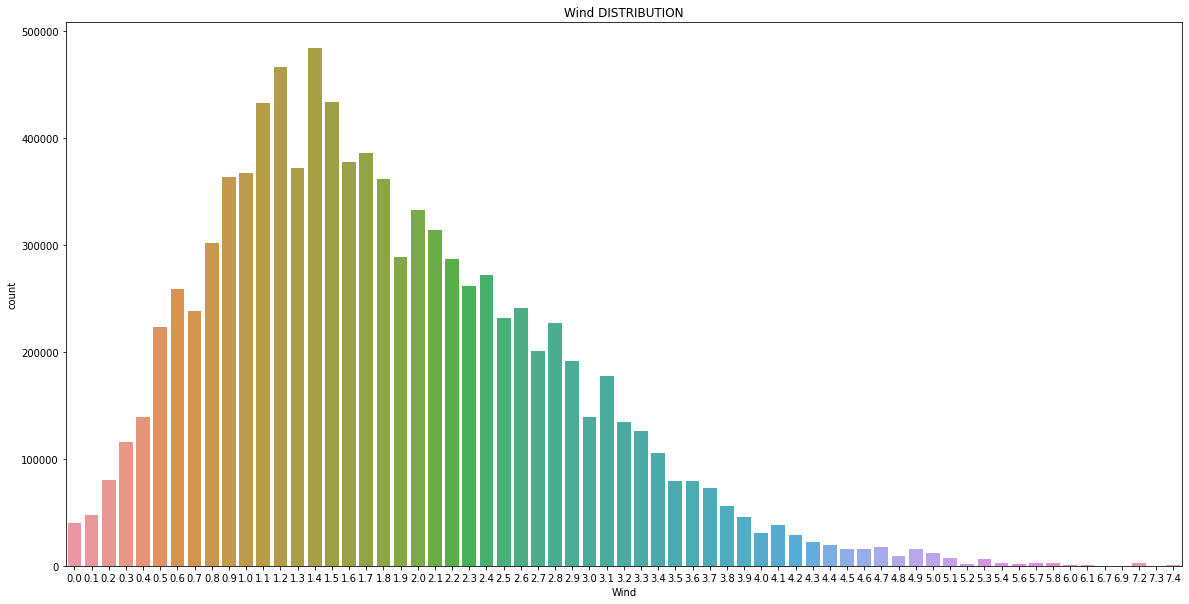

In [ ]:
# Perform the countplot on the wind data


the distribution of data is skewed towards left

trips are mostly avoided in windy wheather

Text(0.5, 1.0, ' Humid DISTRIBUTION')

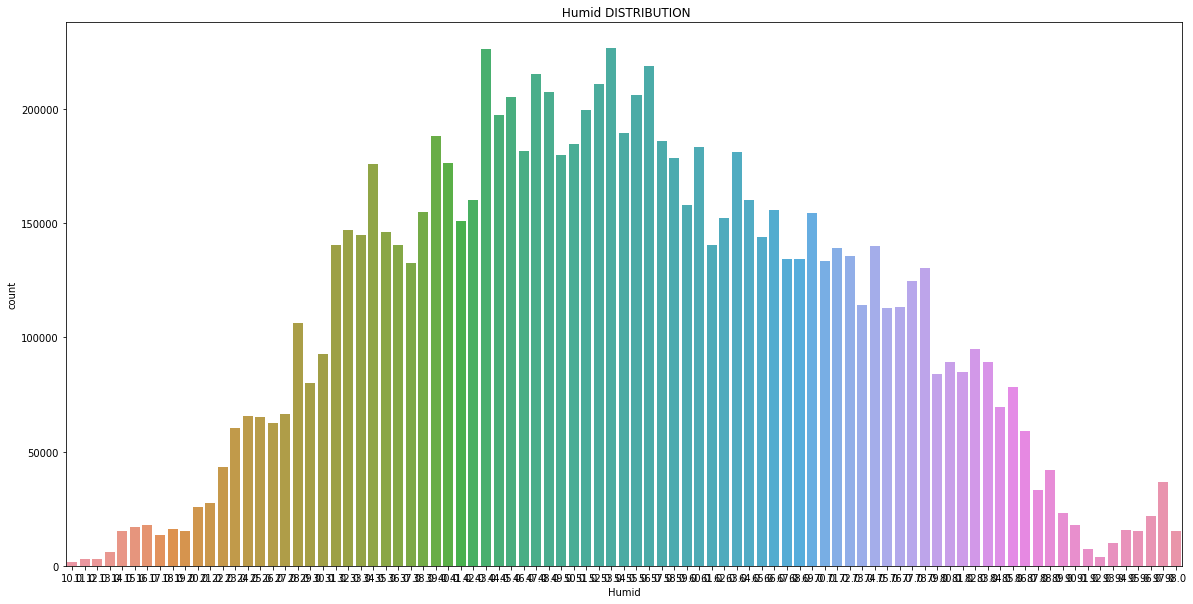

In [ ]:
# Perform the countplot on the himid hour data



people mostly avoid to go on trips on less humid or in extra humid wheather

Text(0.5, 1.0, 'Solar DISTRIBUTION')

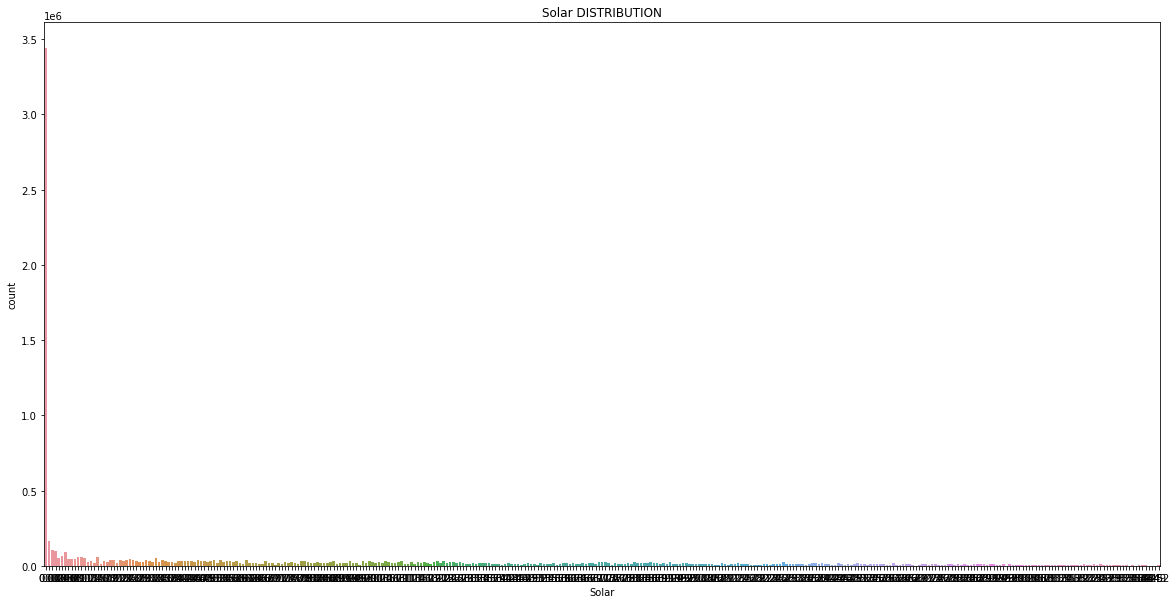

In [ ]:
# Perform the countplot on the solar data


the data distribution is skewed towards left side

Text(0.5, 1.0, 'Snow  DISTRIBUTION')

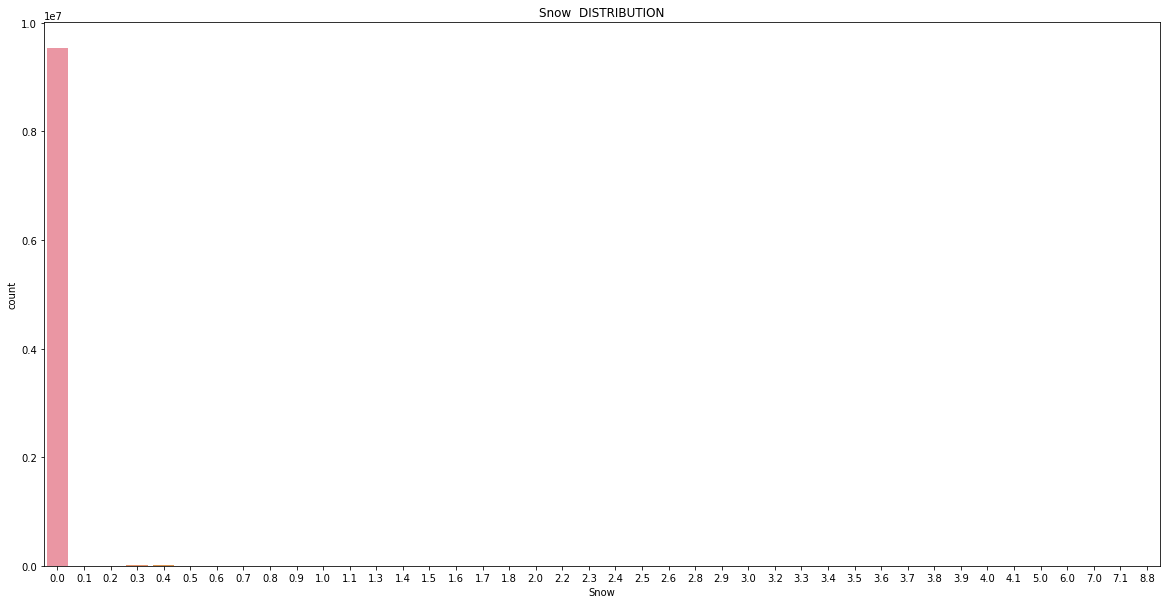

In [ ]:
# Perform the countplot on the snow data


the data distribution is skewed towards left side

more trips are during  when there is no snowfall.

Text(0.5, 1.0, ' GroundTemp DISTRIBUTION')

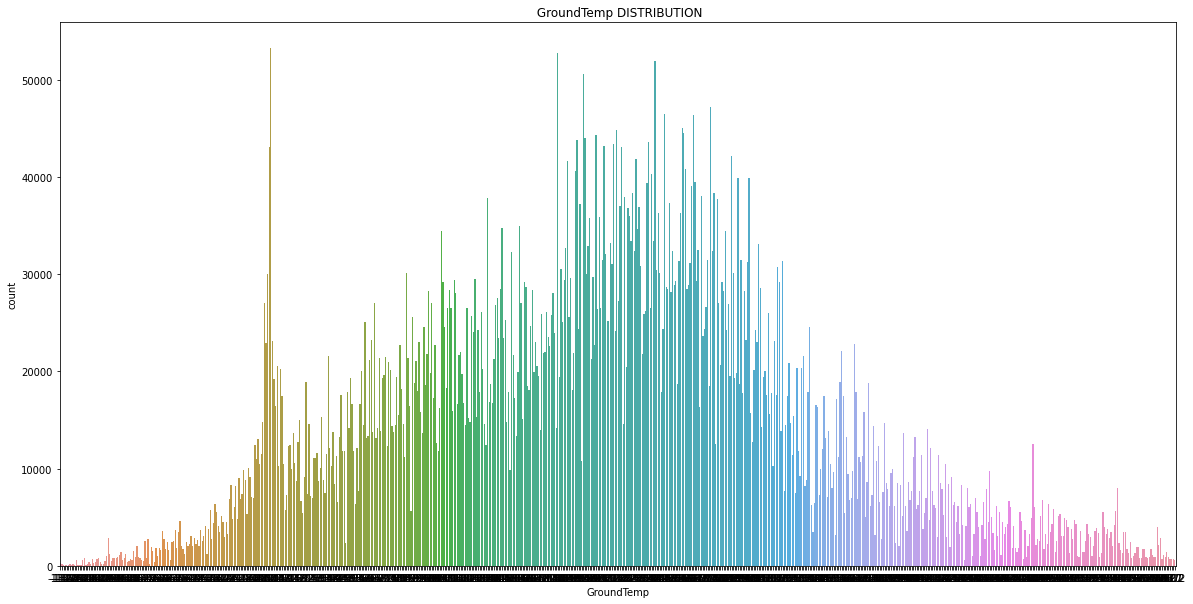

In [ ]:
# Perform the countplot on the GroundTemp data


the distribution of data is multimodel

Text(0.5, 1.0, ' Dust DISTRIBUTION')

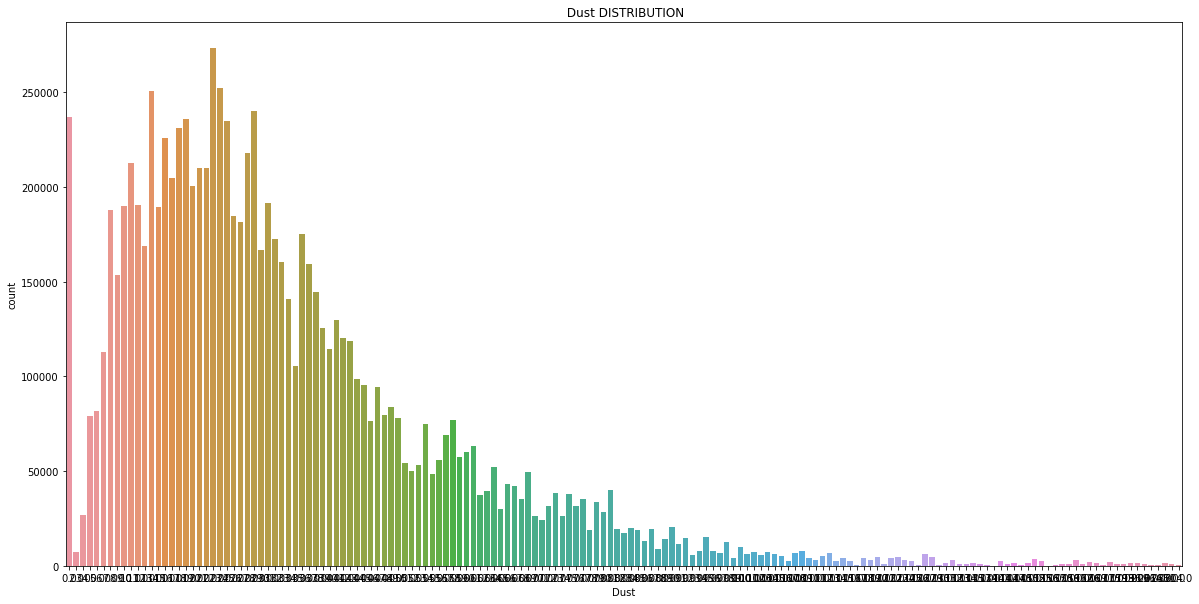

In [ ]:
# Perform the countplot on the dust data


distribution of data is skewed towards left

more trips are done when there is less dust

# boxen plot

The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.

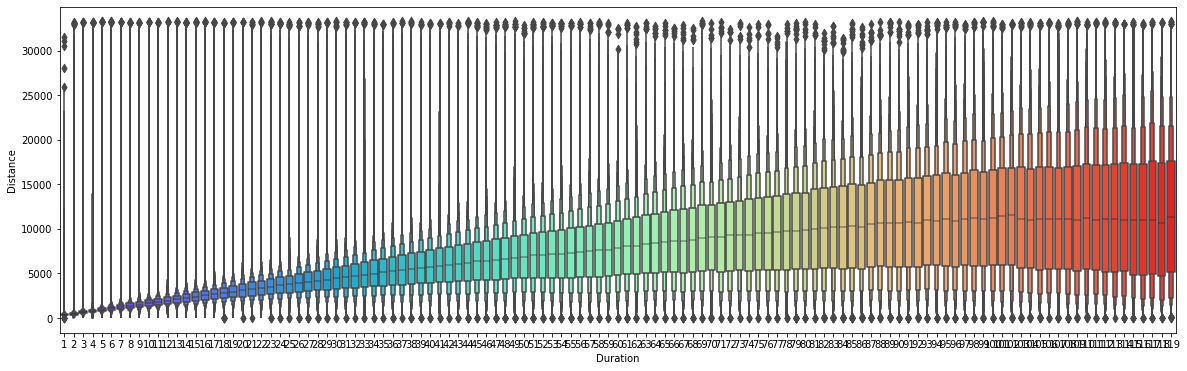

In [ ]:
# Perform boxen plot between distance and Duration 



distribution of distance is increasing as the duration  is increasing

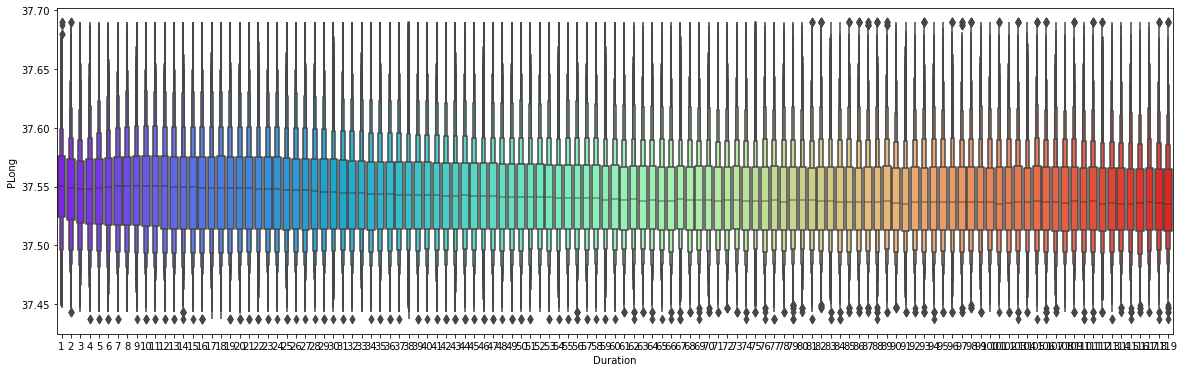

In [ ]:
# Perform boxen plot between Duration and Plong 


from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.
There is no relation between Plong and  Duration

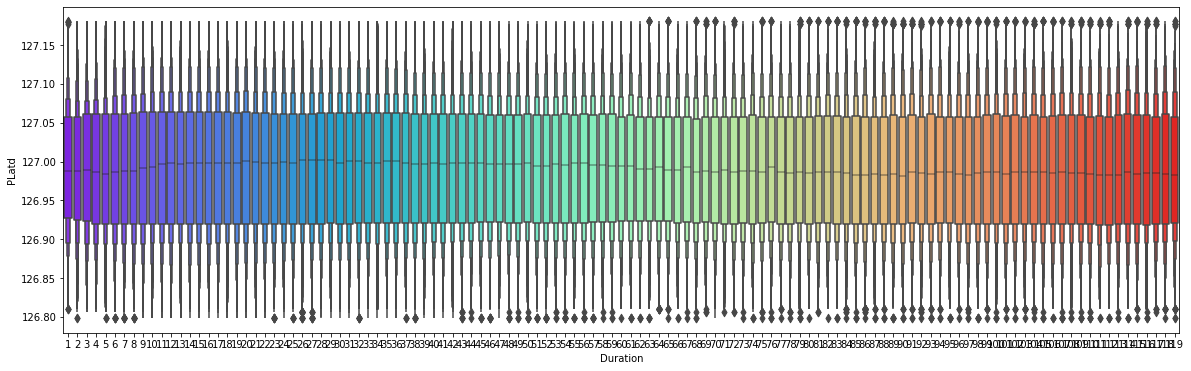

In [ ]:
# Perform boxen plot between PLatd and Duration 



from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.
There is no relation between duration and Platd



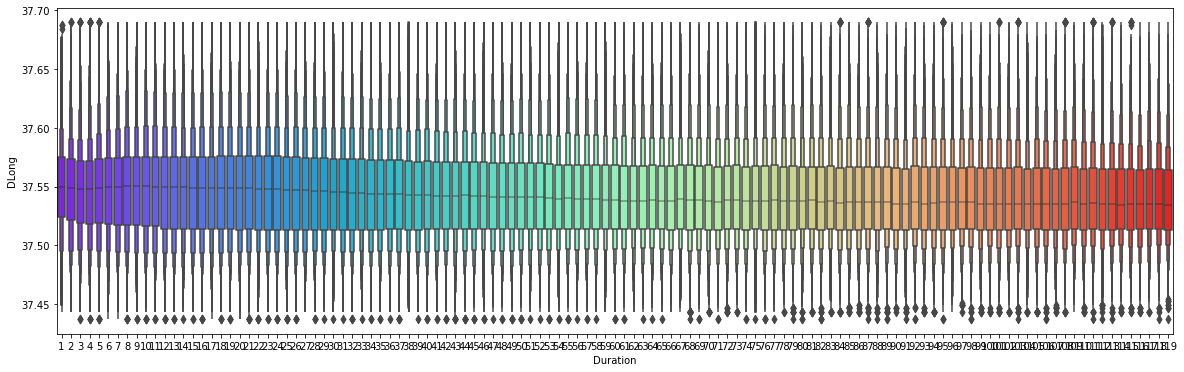

In [ ]:
# Perform boxen plot between DLong and Duration 


from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.
There is no relation between duration and Dlong

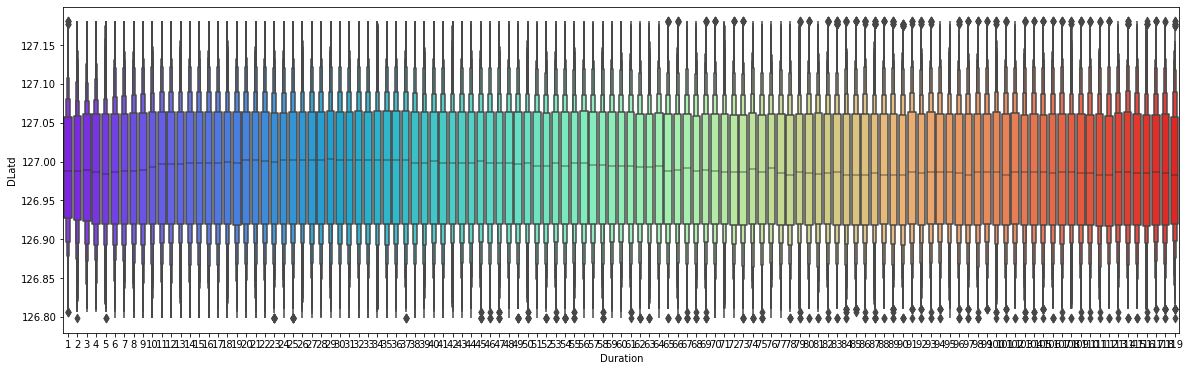

In [ ]:
# Perform boxen plot between Dlatd and Duration 


from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. There is no relation between duration and Dlatd

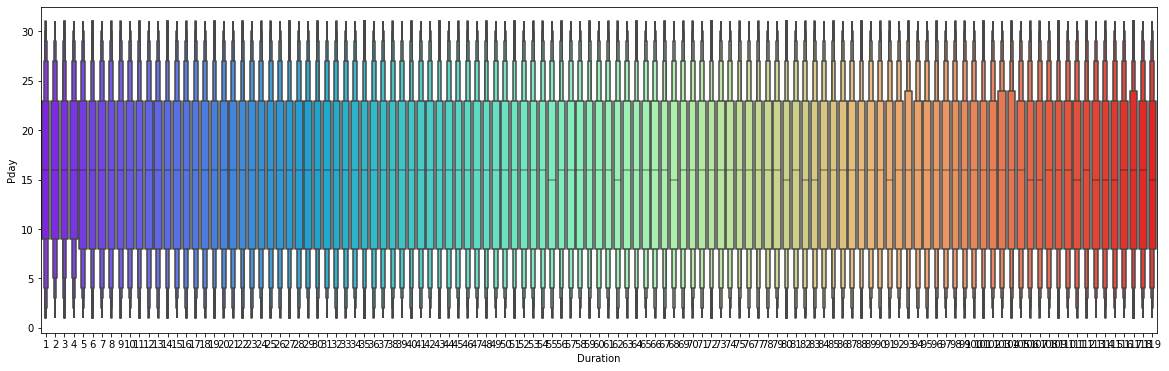

In [ ]:
# Perform boxen plot between Pday and Duration 


from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. There is no relation between duration and pday

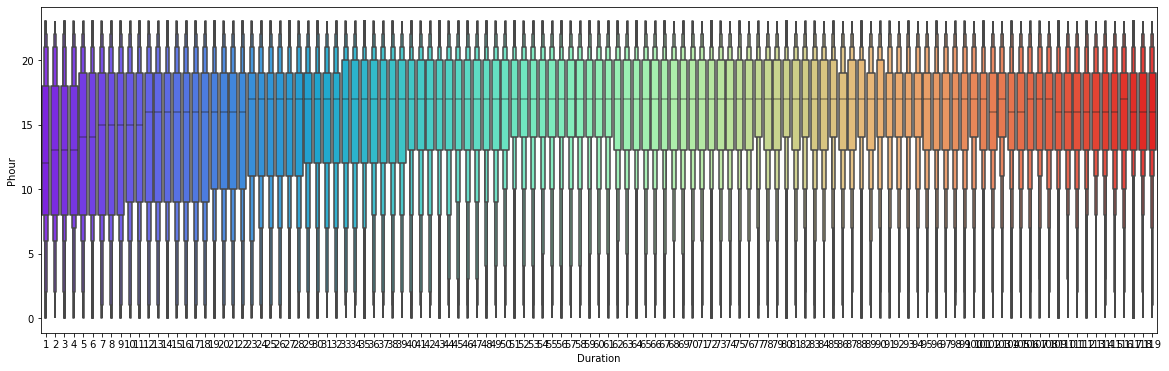

In [ ]:
# Perform boxen plot between Phour and Duration 

there is weak relation between duration and Phours

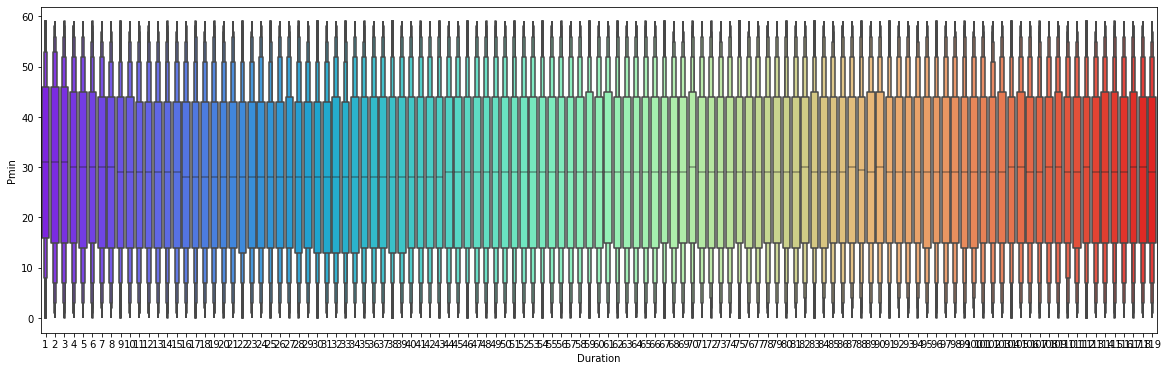

In [ ]:
# Perform boxen plot between Pmin and Duration 


from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. There is no relation between duration and Pmin

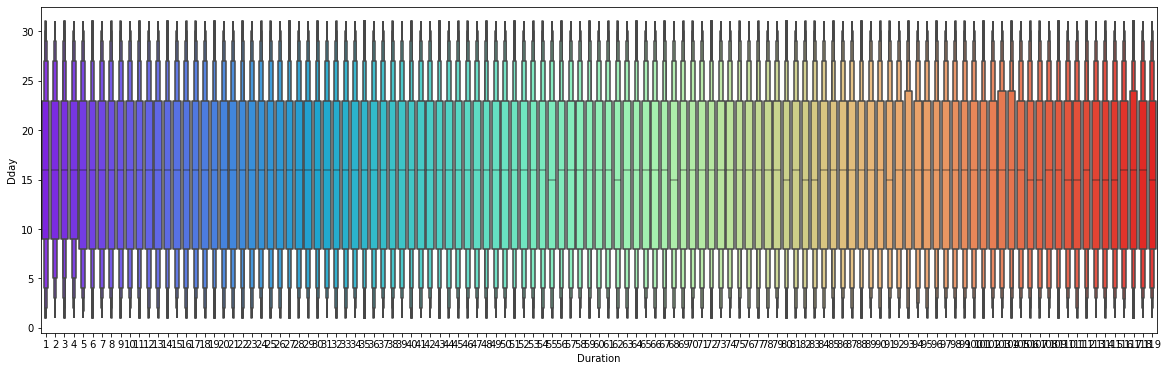

In [ ]:
# Perform boxen plot between Dday and Duration 


from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. There is no relation between duration and Dday

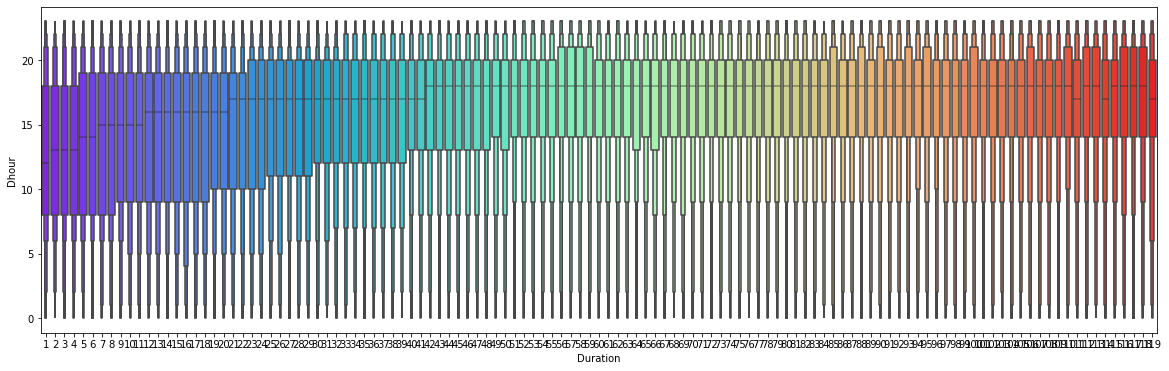

In [ ]:
# Perform boxen plot between Dhour and Duration 



there is weak relation between duration and Dhour

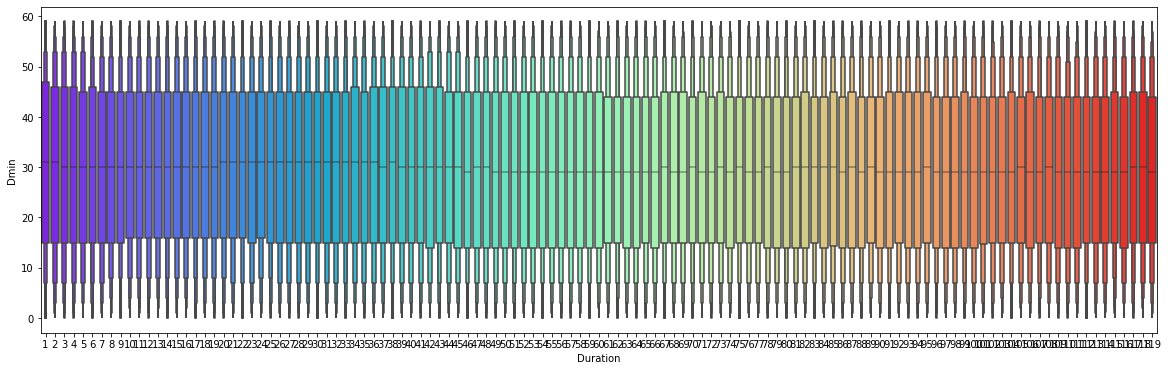

In [ ]:
# Perform boxen plot between Dmin and Duration 

there is no relation between duration and Dmin

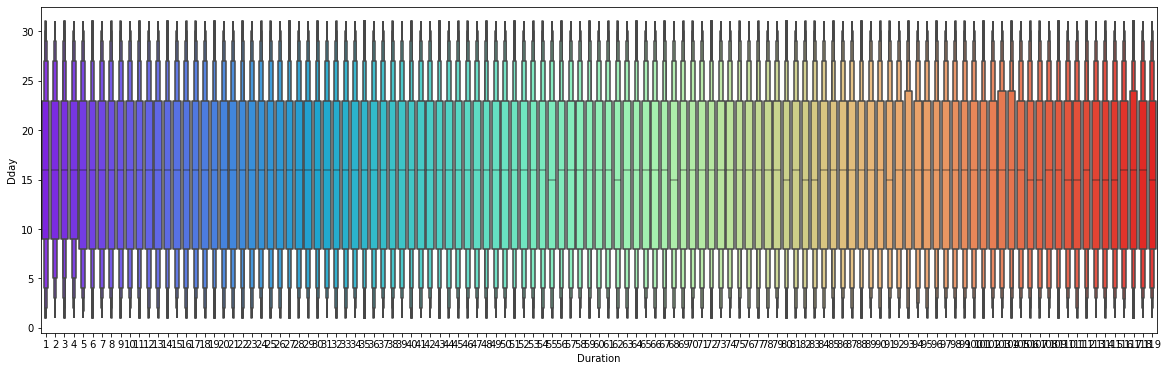

In [ ]:
# Perform boxen plot between Dday and Duration 

from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. There is no relation between duration and Dday

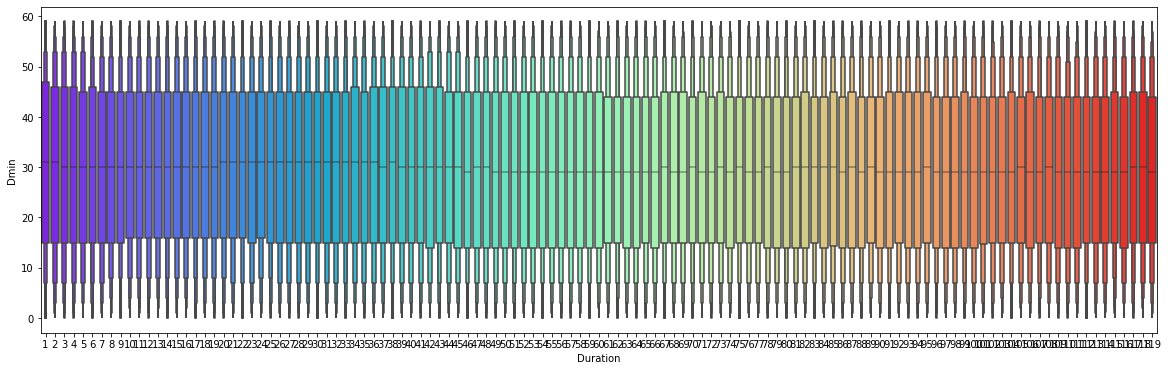

In [ ]:
# Perform boxen plot between Dmin and Duration 


there is no relation between duration and Dmin

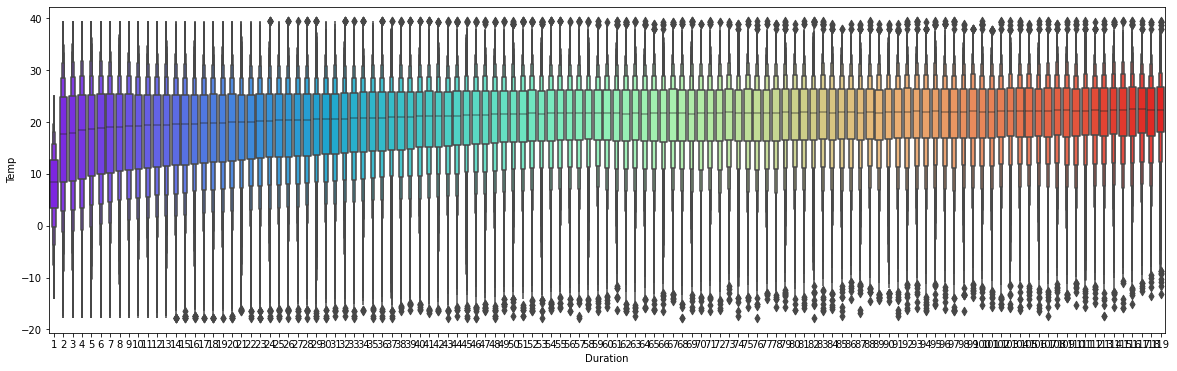

In [ ]:
# Perform boxen plot between temp and Duration 

there is positive relation between duration and temperature

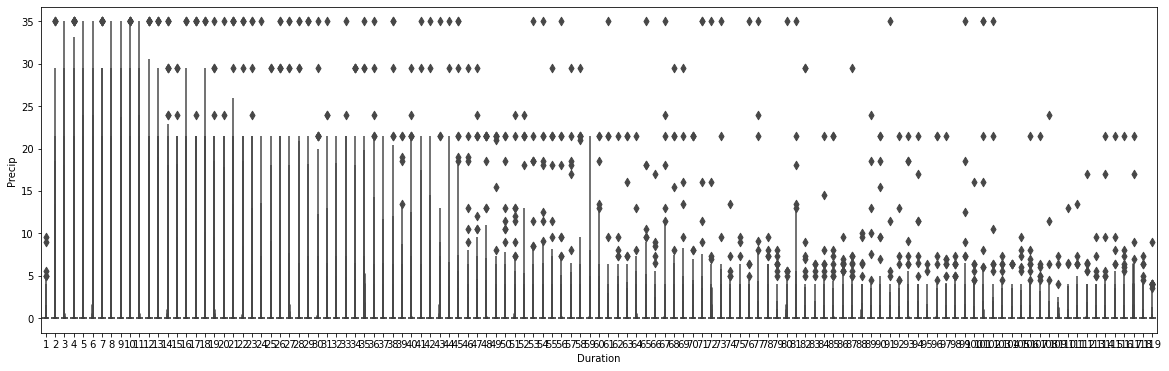

In [ ]:
# Perform boxen plot between precip and Duration 


no relation between duration and precipitation

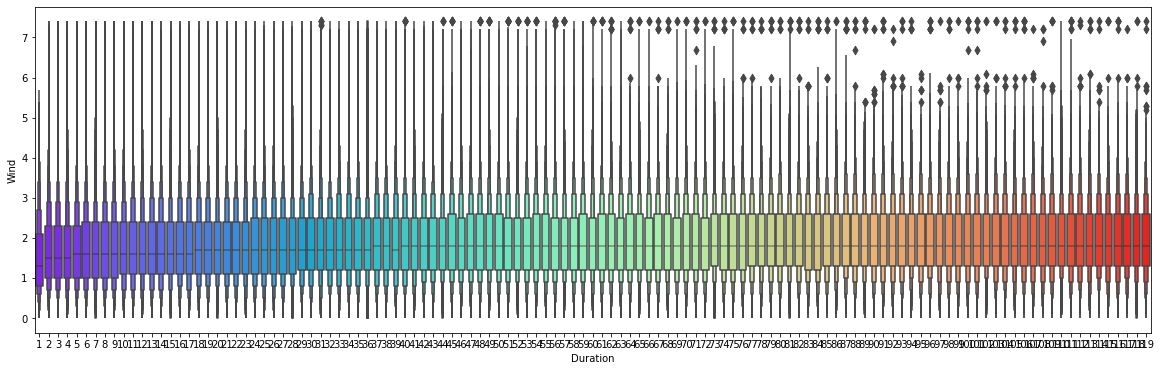

In [ ]:
# Perform boxen plot between wind and Duration 


from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. There is no relation between duration and wind

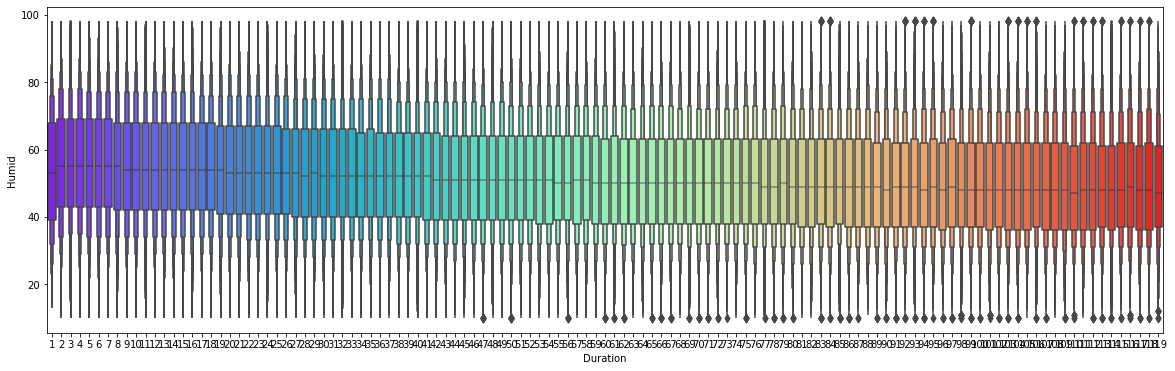

In [ ]:
# Perform boxen plot between humid and Duration 

duration and humidity have weak correlation between them

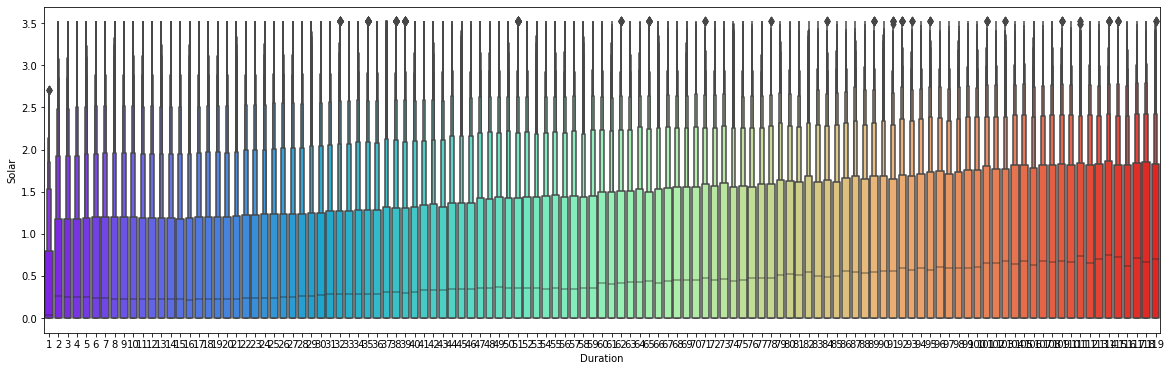

In [ ]:
# Perform boxen plot between solar and Duration 


solar raditation and duration are correlated to eachother.

as the solar radiation increases duration also increases

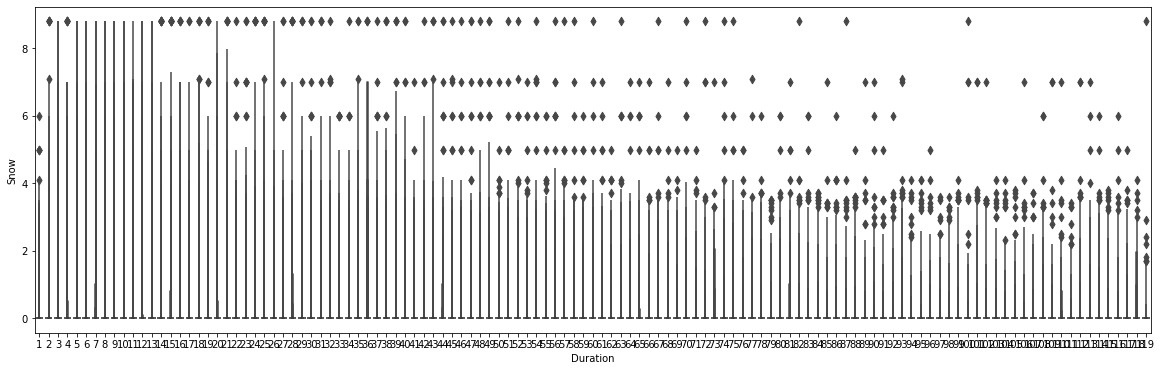

In [ ]:
# Perform boxen plot between snow and Duration 


no relation between snow and duration

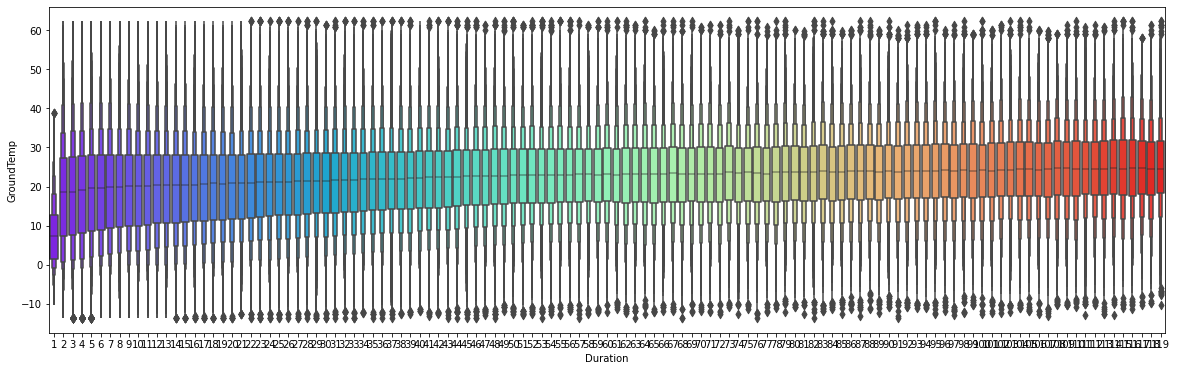

In [ ]:
# Perform boxen plot between GroundTemp and Duration 


duration and ground temperature are correlated

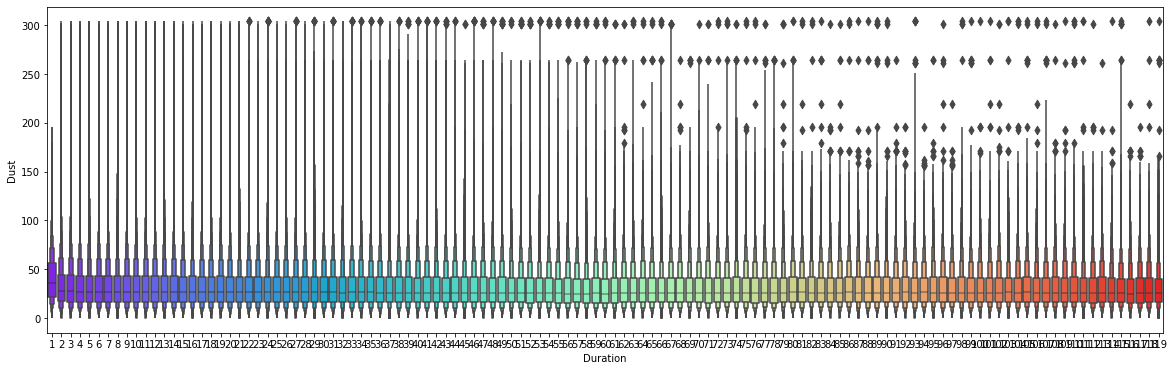

In [ ]:
# Perform boxen plot between dust and Duration 


there is not much difference in the value of dust as duration increases.

there is weak relation between duration and dust.

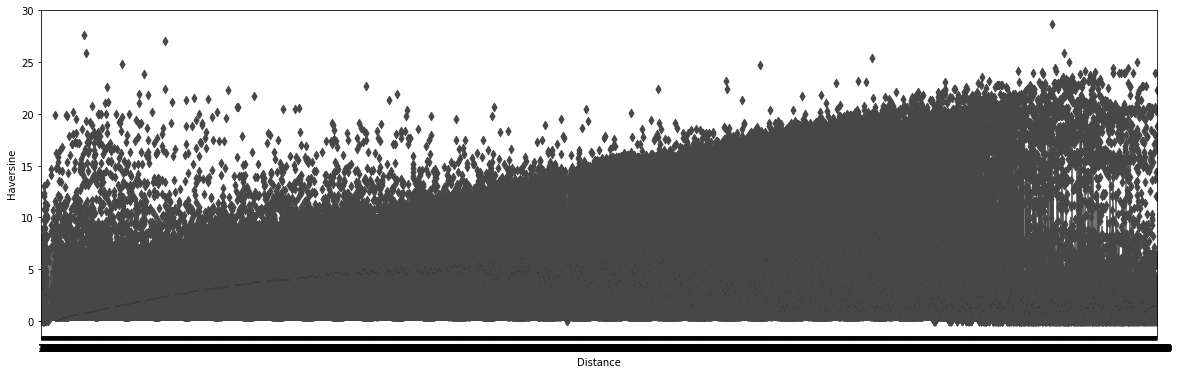

In [ ]:
# Perform boxen plot between distance and haversine 


there is weak relation between distance and haversine

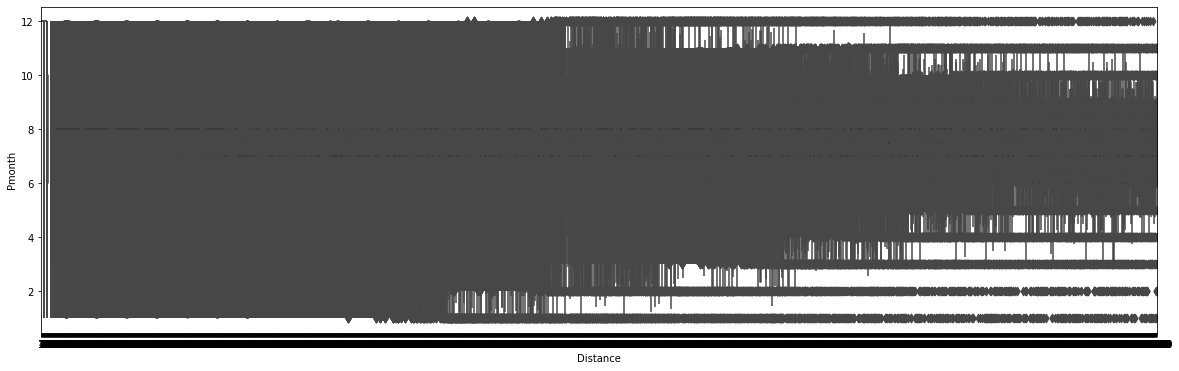

In [ ]:
# Perform boxen plot between distance and Pmonth 



there is no relation between distance and Pmonth

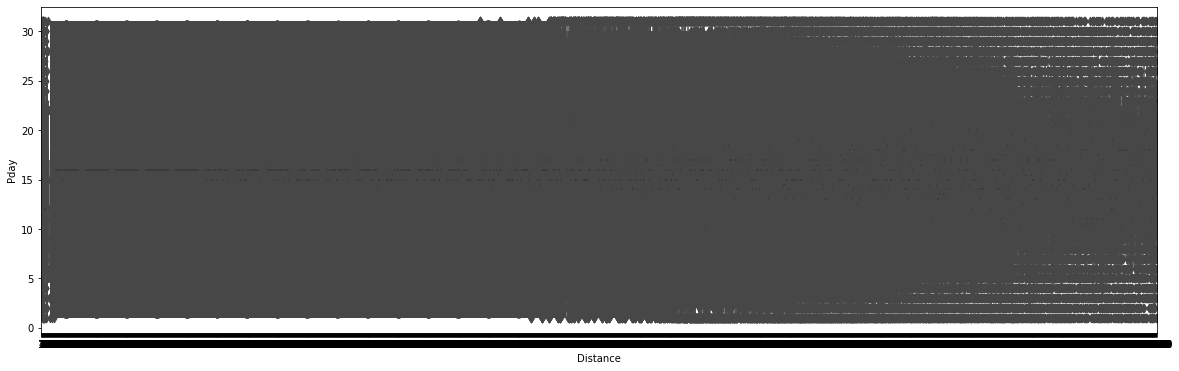

In [ ]:
# Perform boxen plot between distance and Pday 



no relation between distance Pday

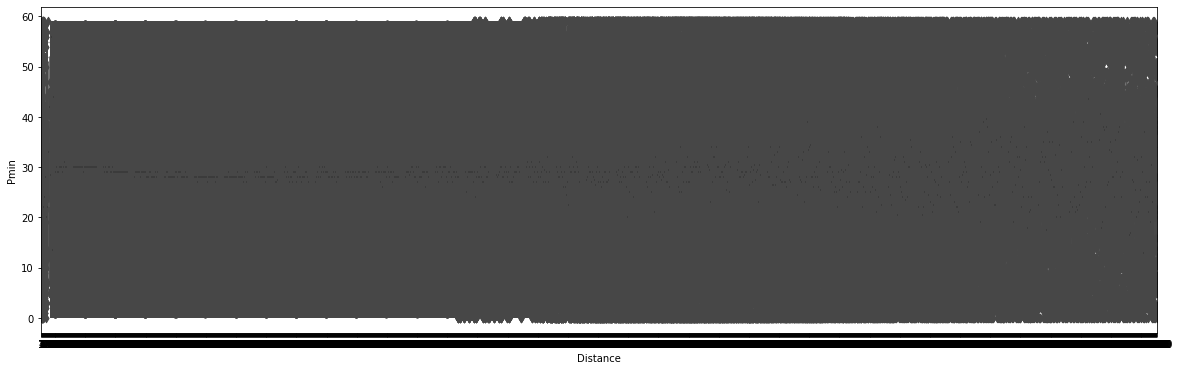

In [ ]:
# Perform boxen plot between distance and Pmin 


there is no relation between distance and Pmin

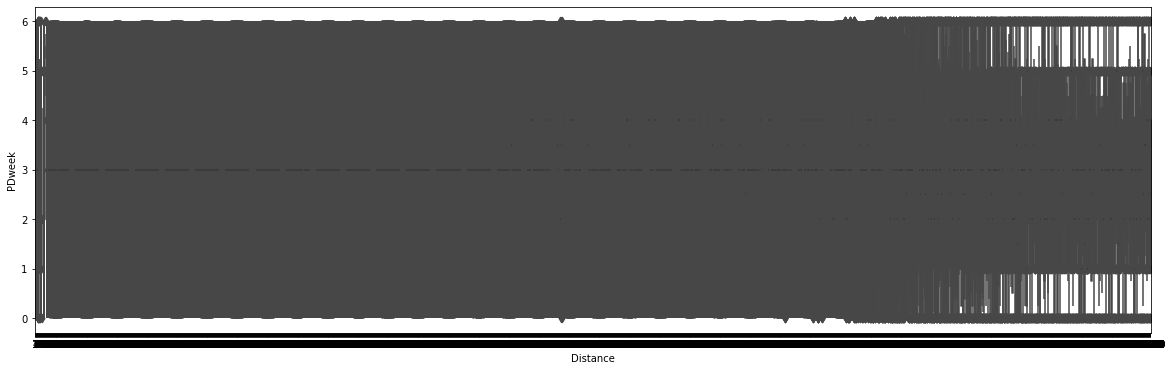

In [ ]:
# Perform boxen plot between distance and PDweek 


there is no relation between distance and PDweek

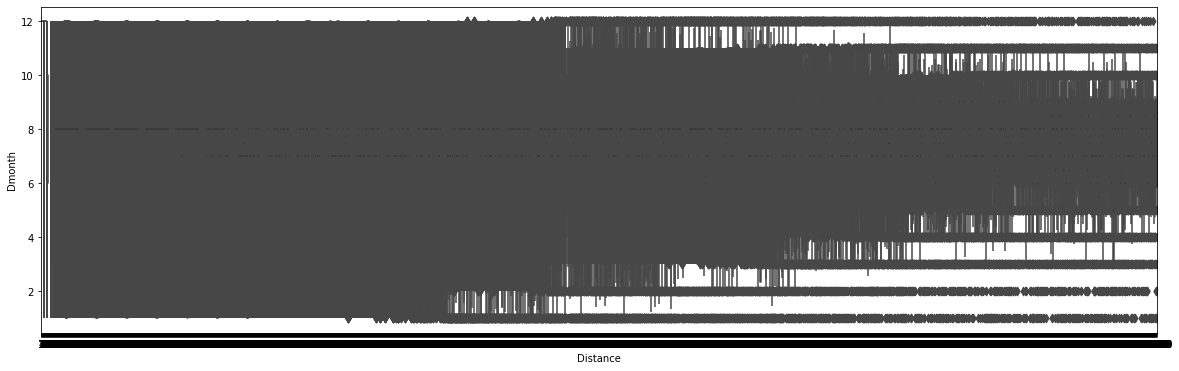

In [ ]:
# Perform boxen plot between distance and Dmonth 



there is no relation bertween distance and Dmonth

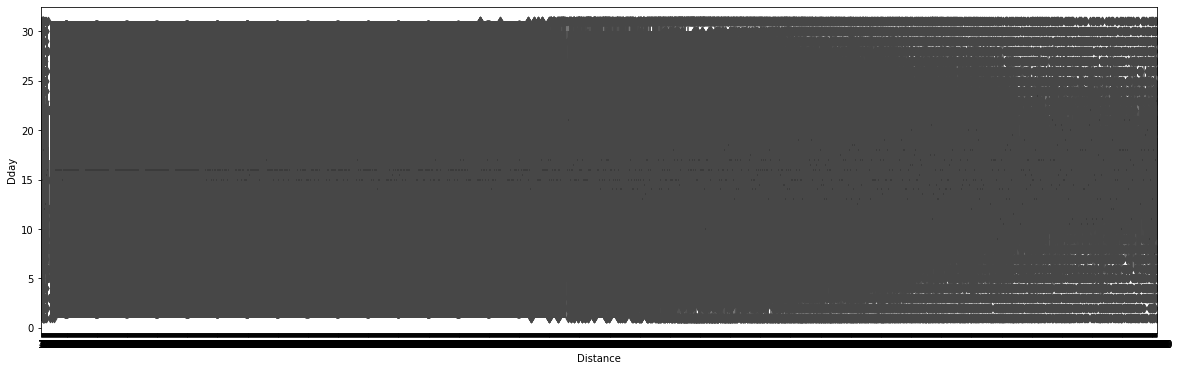

In [ ]:
# Perform boxen plot between distance and Dday 


there is no relation between distance and Dday

### DENDOGRAM

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

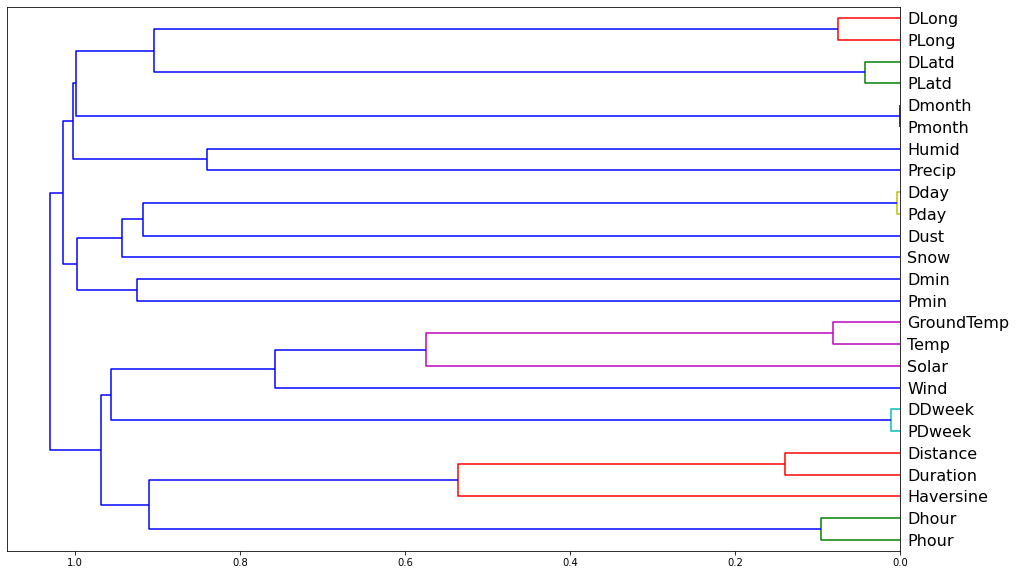

In [ ]:
# Plot a Dendrogram on the columns of the dataset




Observation: All connected are compoundly related to each other like latitudes to longitudes, distance to duration and many more.

# violin plot

1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

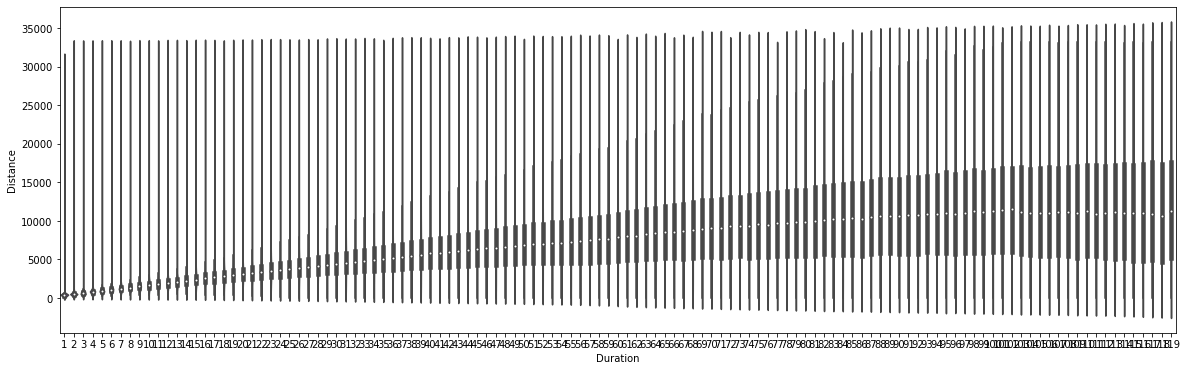

In [ ]:
# Perform violin plot between distance and Duration 


Distance and duration arecorrelated

as duration increases distance also increases

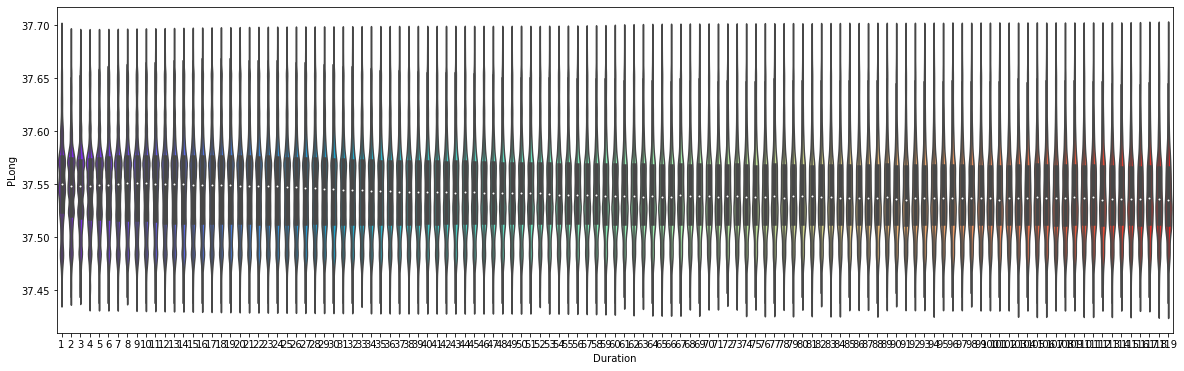

In [ ]:
# Perform violin plot between PLong and Duration 



from above violin plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.
There is no relation between duration and PLong 

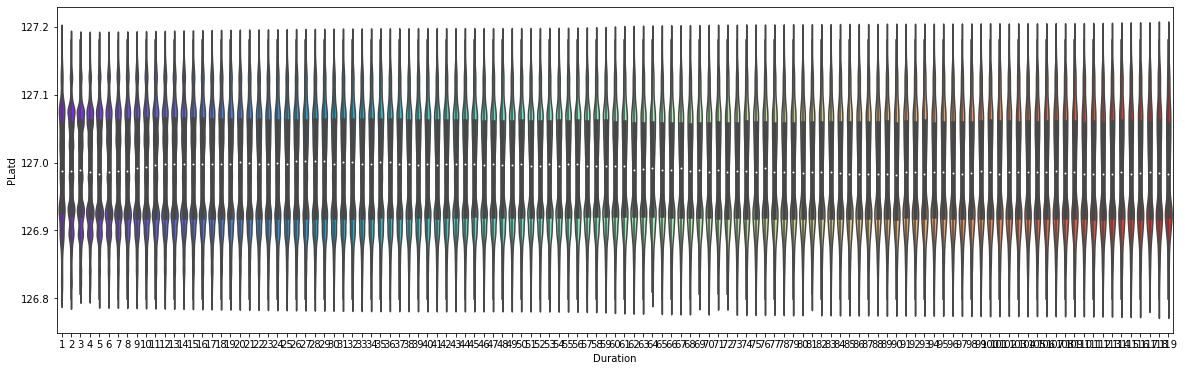

In [ ]:
# Perform violin plot between Platd and Duration 



from above violin plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.

There is no relation between duration and PLatd 

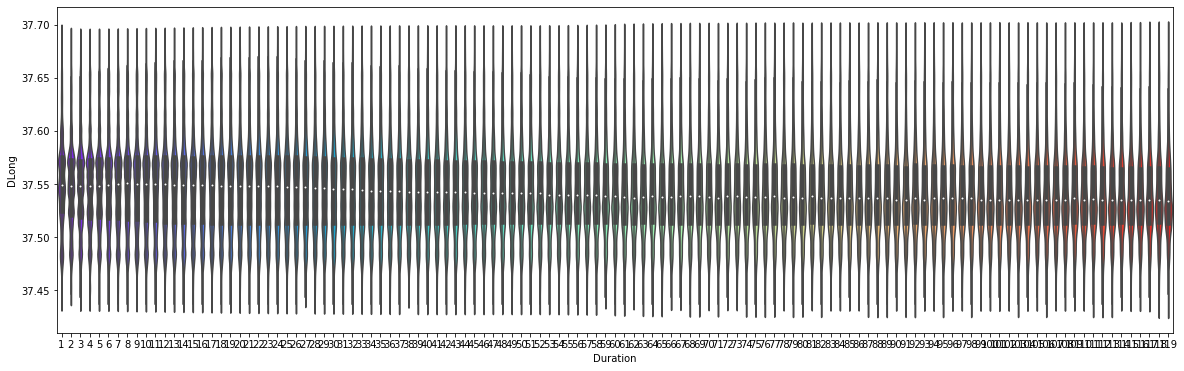

In [ ]:
# Perform violin plot between Dlong and Duration 


Dlong distribution for all values of duration is simmilar.

there is no relation between DLong and duration.

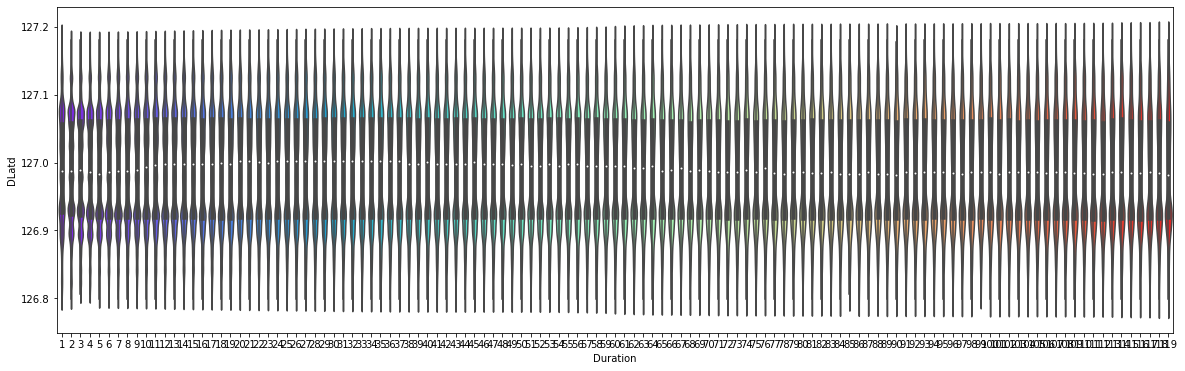

In [ ]:
# Perform violin plot between DLatd and Duration 



from above violin plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.
There is no relation between duration and DLatd 

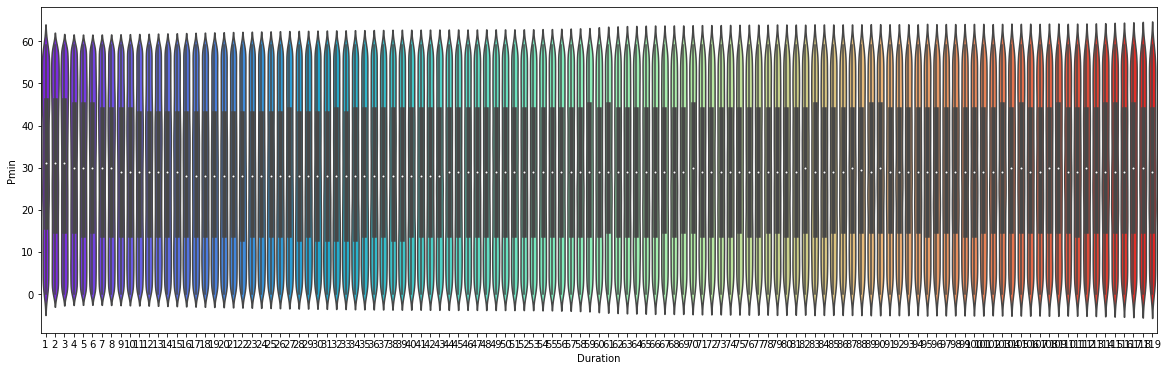

In [ ]:
# Perform violin plot between Pmin and Duration 


from above violin plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. 

There is no relation between duration and Pmin

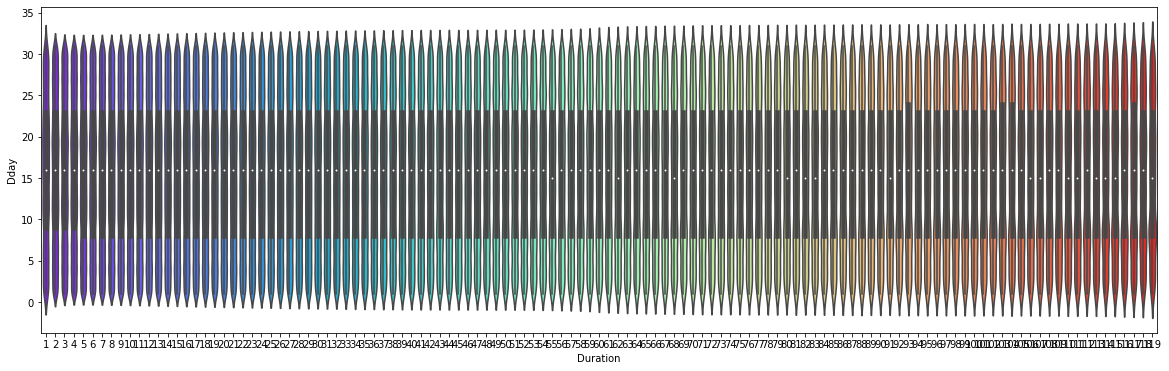

In [ ]:
# Perform violin plot between Dhour and Duration 



from above violin plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. 

There is no relation between duration and Dday

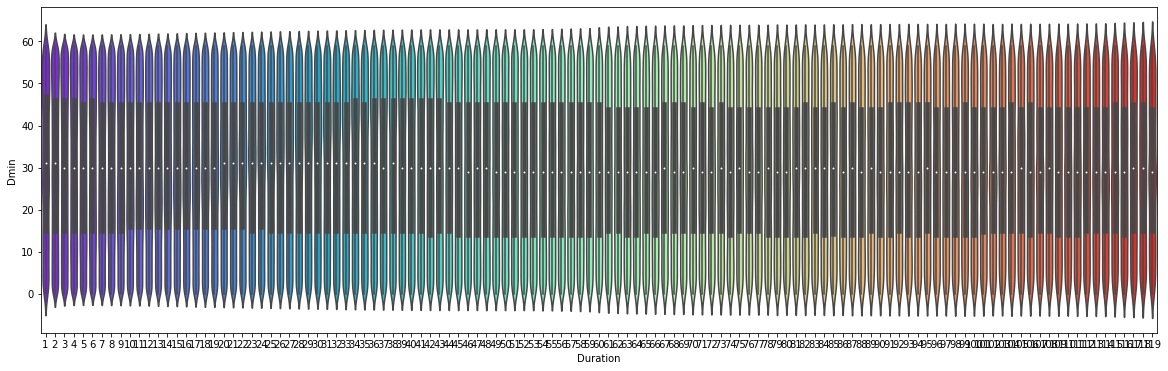

In [ ]:
# Perform violin plot between Dmin and Duration 


Dmin distribution for all values of Duration is similar.

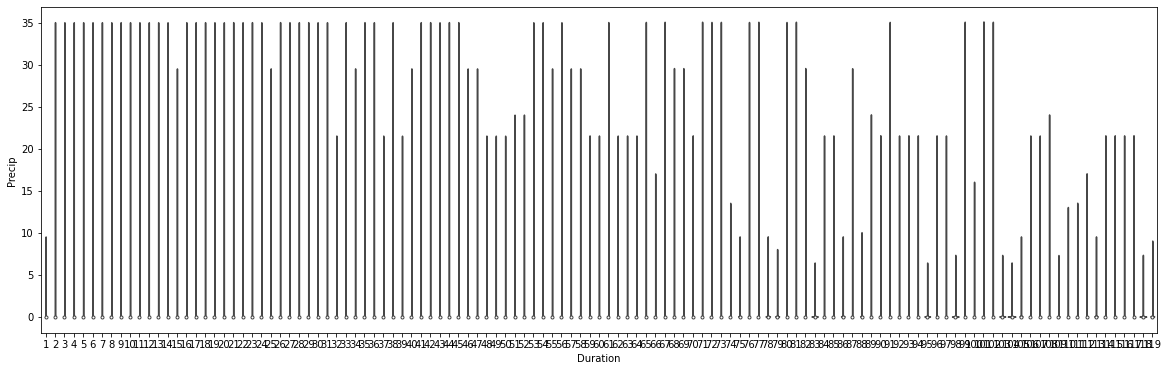

In [ ]:
# Perform violin plot between Precip and Duration 


precip distribution for all values of duration is simmilar.

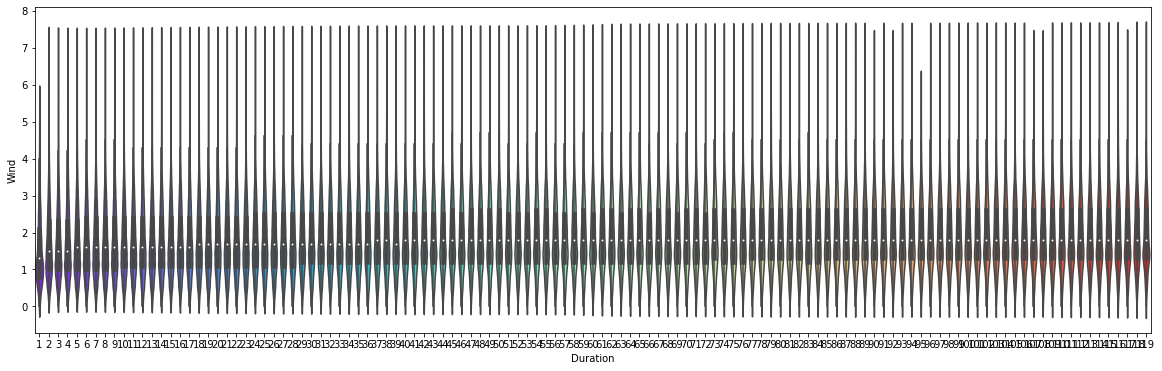

In [ ]:
# Perform violin plot between wind and Duration 


wind distribution for all values of duration is simmilar.


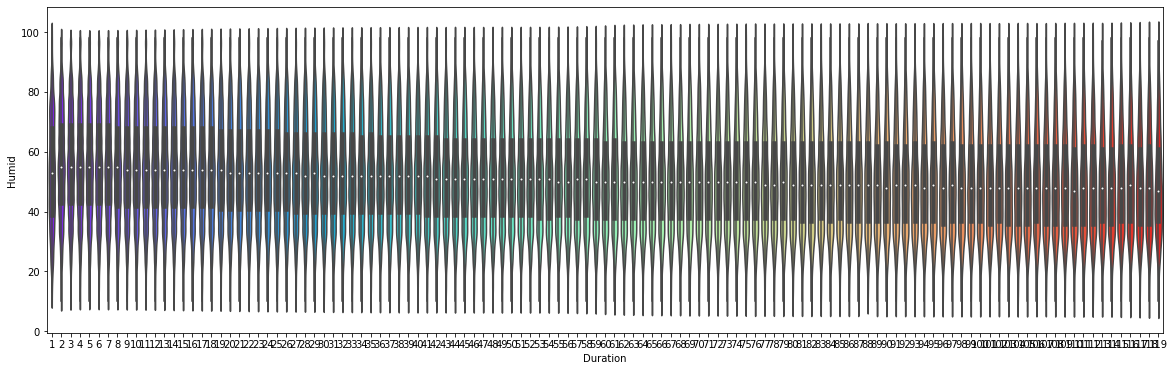

In [ ]:
# Perform violin plot between humid and Duration 


as duration increases there is slight change in the humidity 

humidity is decreasing as duration is increasing

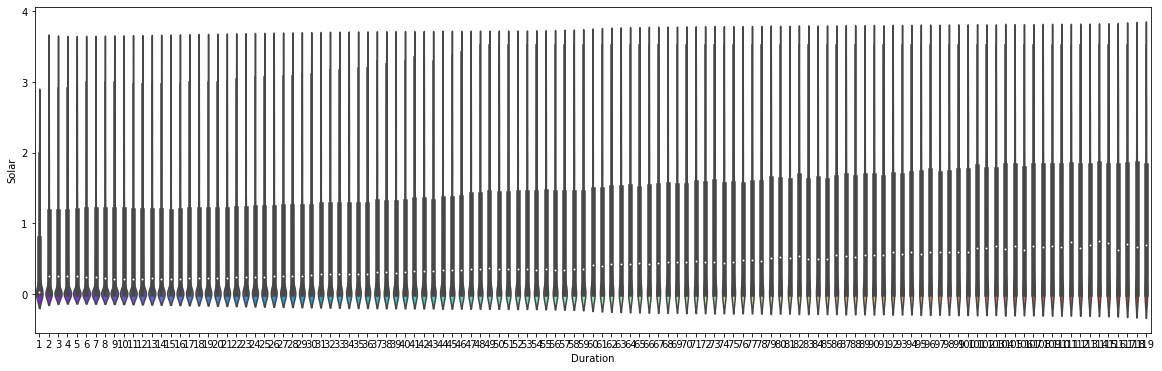

In [ ]:
# Perform violin plot between solar and Duration 


solar radiation and duration have positive correlation

as value of solar radiation increases duration also increases.

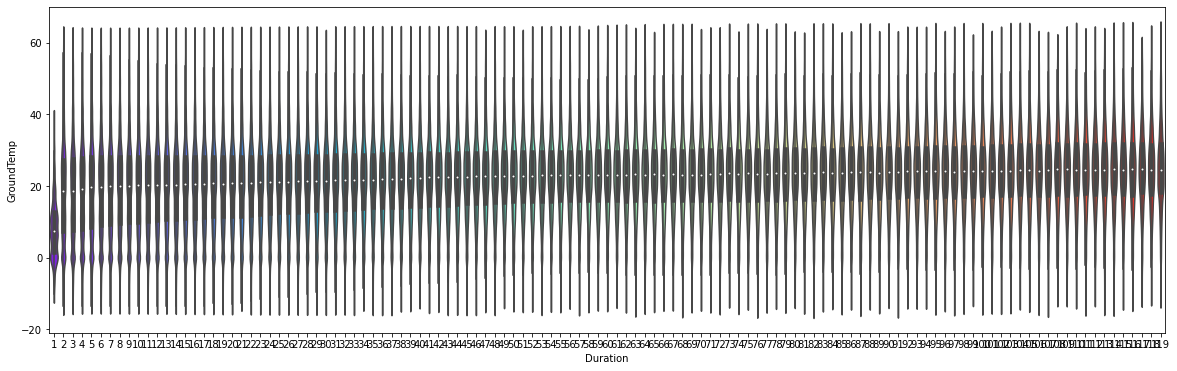

In [ ]:
# Perform violin plot between GroundTemp and Duration 


as the value of duration increases value of ground temperature also slightly increases 

there is weak correlation between ground temperature and duration.

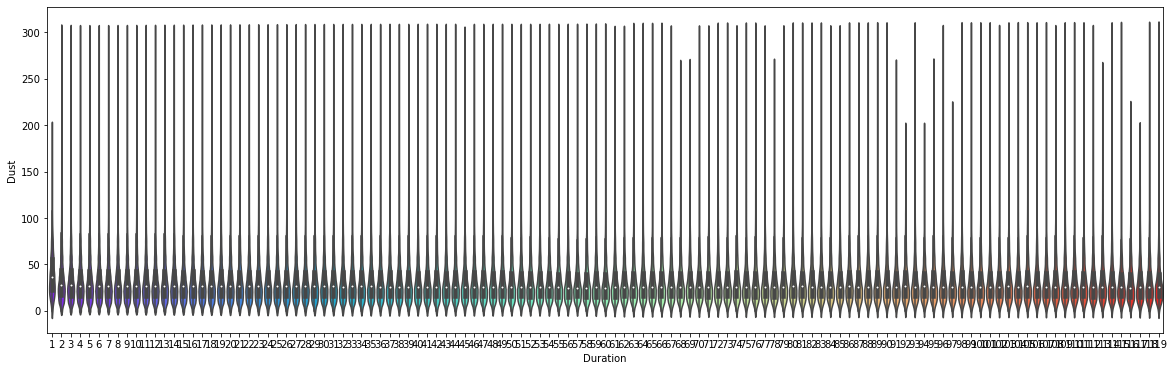

In [ ]:
# Perform violin plot between dust and Duration 


from above violin plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. 

There is weak relation between duration and dust

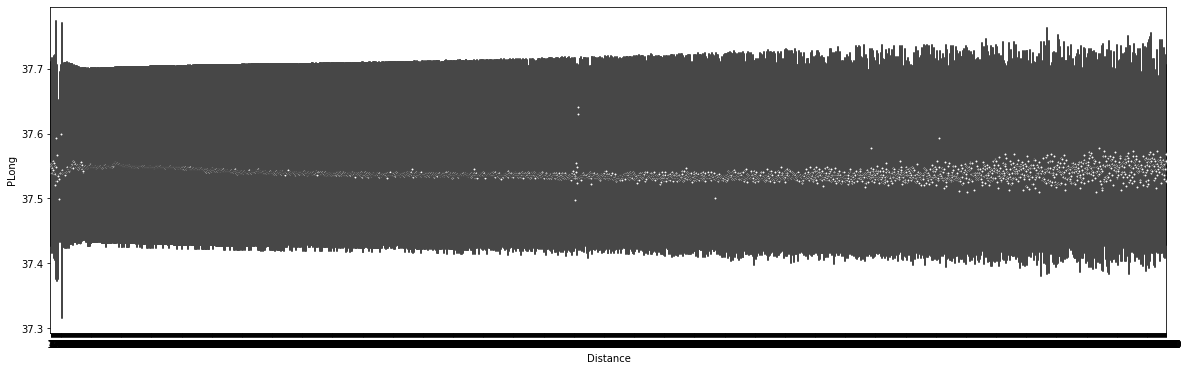

In [ ]:
# Perform violin plot between distance and Plong 


there is no relation between PLong and Distance

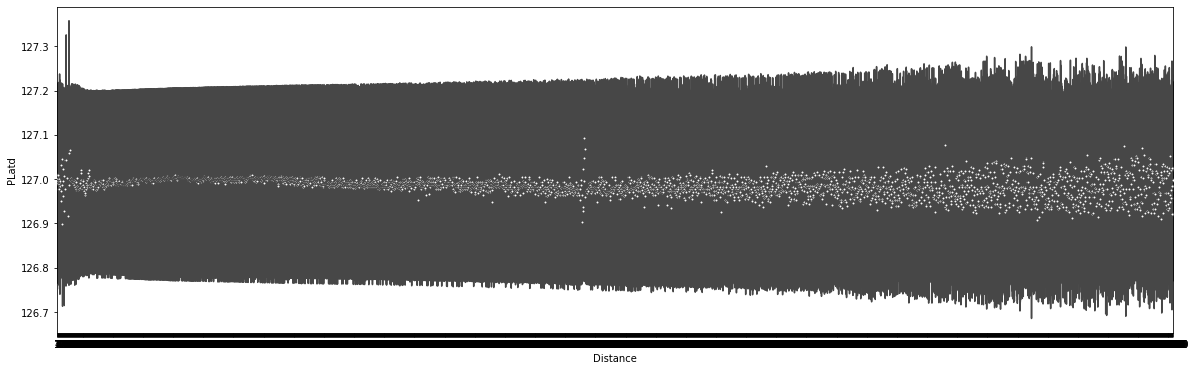

In [ ]:
# Perform violin plot between distance and PLatd 


there is no relation between PLatd and Distance

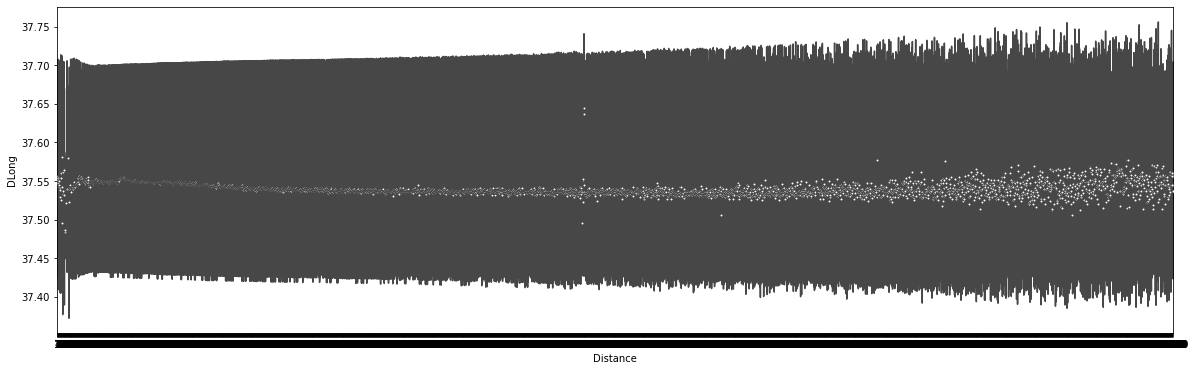

In [ ]:
# Perform violin plot between distance and Dlong 


there is no relation between DLatd and Distance

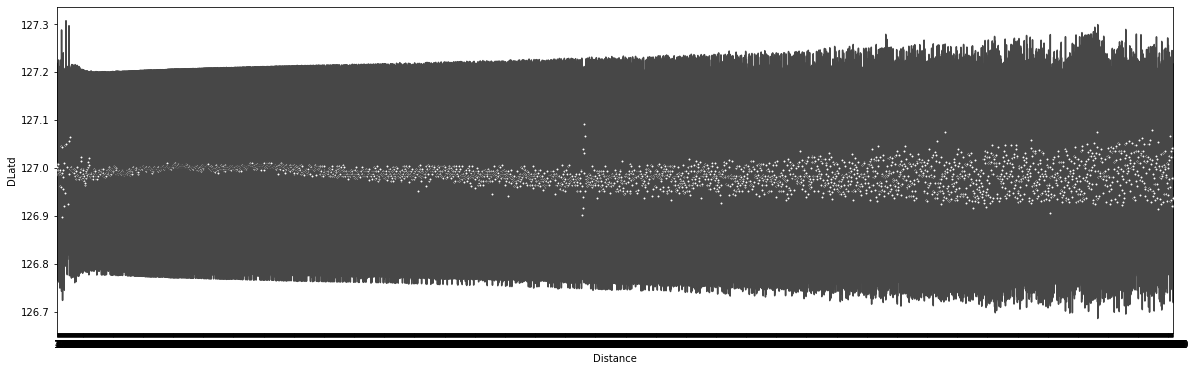

In [ ]:
# Perform violin plot between distance and Dlatd 


there is no relation between DLatd and Distance

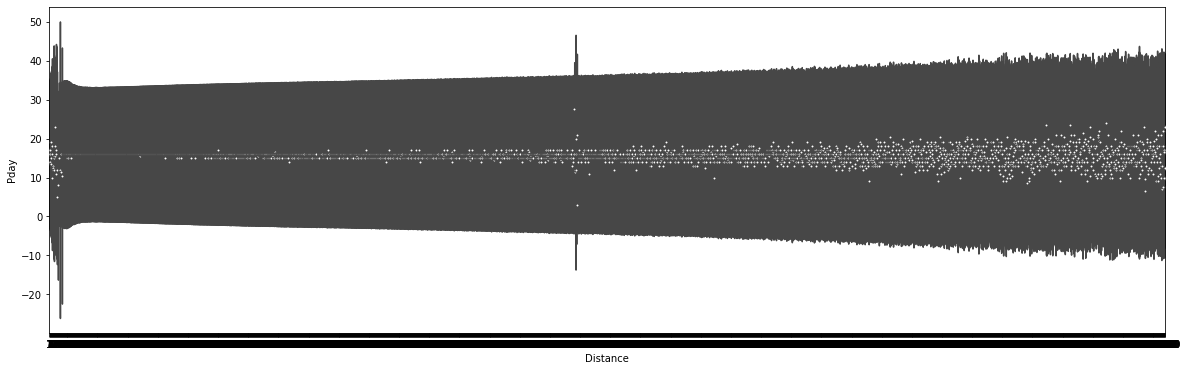

In [ ]:
# Perform violin plot between distance and Pday


there is no relation between Pday and Distance

# Modelling

NOTE:
The dataset has 9.6 million samples.

We have used only 100000 samples for training.

If you want you can use complete dataset.

Using complete dataset will take longer time to train the model.

In [86]:
X

Distance      PLong       PLatd  ...  Snow  GroundTemp  Dust
0             50  37.544666  126.888359  ...   0.0        -2.2  25.0
1           7670  37.506199  127.003944  ...   0.0        -2.2  25.0
2           1390  37.544590  127.057083  ...   0.0        -2.2  25.0
3           1820  37.571102  127.023560  ...   0.0        -2.2  25.0
4            850  37.573242  127.015907  ...   0.0        -2.2  25.0
...          ...        ...         ...  ...   ...         ...   ...
224475       370  37.481491  127.036728  ...   0.0         2.4  89.0
224476      1770  37.543915  127.125458  ...   0.0         2.4  89.0
224477      1800  37.576332  126.968590  ...   0.0         2.4  89.0
224478       970  37.582500  126.998535  ...   0.0         2.4  89.0
224479      5940  37.541363  127.017662  ...   0.0         2.4  89.0

[224480 rows x 24 columns]

In [ ]:
# Splitting data into Labels and target
  

In [ ]:
# Processing the whole dataframe


In [ ]:
# Splitting the dataset into train and test set


In [ ]:
# Check the shape of all the splitted dataset


((74999, 24), (25000, 24), (74999,), (25000,))

In [ ]:
# importing necessary libraries for geting metrics of models


# Function for calculating RMSE 


# Function for calculating all the relevant metrics 
 

In [ ]:
# Visualize importance of all the features in the dataset for the prediction


     # creating dataframe for feature name and feature importance
   

    # grouping all data and sorting in descending order
  

    # ploting feature importance data using boxenplot
    



    # return fig, ax





# Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.

RMSE-Train: 5.395010365488399
RMSE-Test: 5.109487848866319
Score-Train: 0.929440696172636
Score-Test: 0.9377884419482693
MedAE-Train: 0.7679998251681788
MedAE-Test: 0.7733301876388641
MeanAE-Train: 1.3340505784112786
MeanAE-Test: 1.337815989074043
CPU times: user 437 ms, sys: 251 ms, total: 688 ms
Wall time: 460 ms


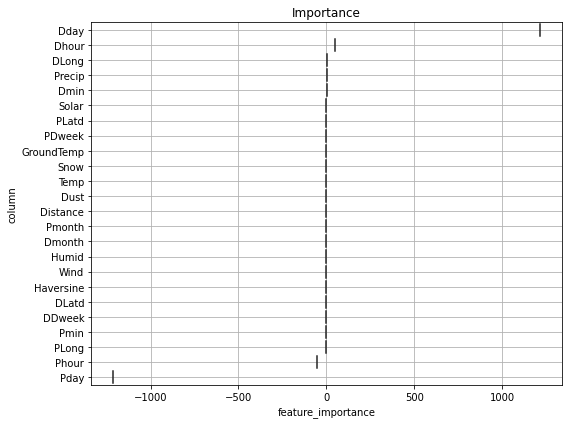

In [ ]:
%%time
# Fit a Linear Regression model to the train dataset

# Import LinearRegressor

# Instantiate the model

# Fit the model to the data


# print score of the model

# visualizing the importance of features.


#Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

RMSE-Train: 4.079355698942725
RMSE-Test: 10.786829631567493
Score-Train: 0.9596584230492329
Score-Test: 0.7227293019657742
MedAE-Train: 0.7899999999999991
MedAE-Test: 2.1100000000000003
MeanAE-Train: 2.017869779533568
MeanAE-Test: 5.379692135238096
CPU times: user 2min 41s, sys: 474 ms, total: 2min 41s
Wall time: 2min 41s


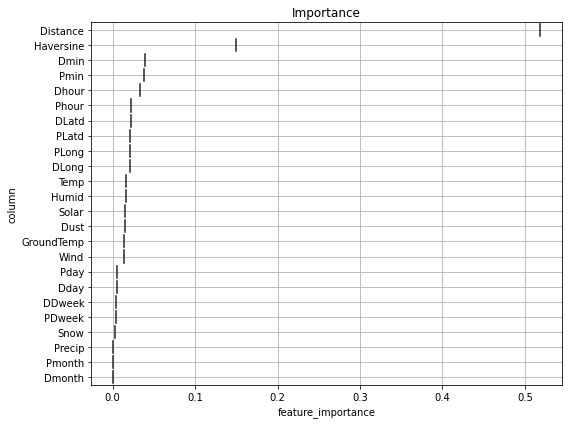

In [ ]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor

# Instantiate the model

# Fit the model to the data

# print score of the model

# visualizing the importance of features.


#KNeighbors Regressor

KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation to select the size that minimises the mean-squared error.

In [ ]:
%%time
# Fit a K-Neighbour Regressor model to the train dataset

# Import KNeighbourRegressor

# Instantiate the model

# Fit the model to the data

# print score of the model



RMSE-Train: 11.278147765549104
RMSE-Test: 14.059139717635642
Score-Train: 0.6916490568836402
Score-Test: 0.5289859840626784
MedAE-Train: 1.8000000000000007
MedAE-Test: 2.4000000000000004
MeanAE-Train: 5.350783343777916
MeanAE-Test: 6.726952
CPU times: user 26.3 s, sys: 57.2 ms, total: 26.3 s
Wall time: 26.3 s


#Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error. it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

RMSE-Train: 11.056431686292301
RMSE-Test: 11.195289524839264
Score-Train: 0.7036535738501182
Score-Test: 0.7013331677264831
MedAE-Train: 2.6444091624166326
MedAE-Test: 2.652340813319382
MeanAE-Train: 5.733986402354189
MeanAE-Test: 5.8174222256039245
CPU times: user 27.4 s, sys: 51.4 ms, total: 27.4 s
Wall time: 27.4 s


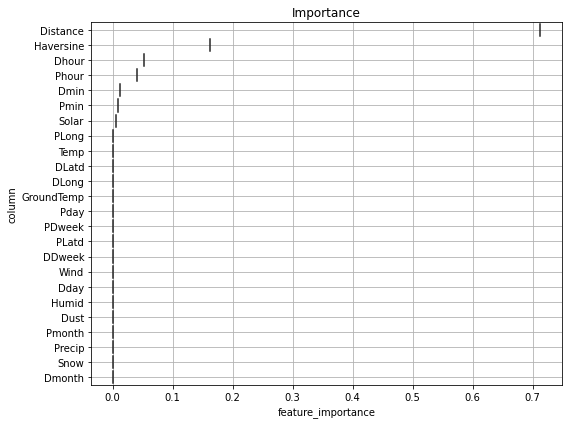

In [ ]:
%%time

# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor

# Instantiate the model

# Fit the model to the data


# print score of the model

# visualizing the importance of features.


#Decision Tree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

RMSE-Train: 11.056431686292301
RMSE-Test: 11.195289524839264
Score-Train: 0.7036535738501182
Score-Test: 0.7013331677264831
MedAE-Train: 2.6444091624166326
MedAE-Test: 2.652340813319382
MeanAE-Train: 5.733986402354189
MeanAE-Test: 5.8174222256039245
CPU times: user 3.25 s, sys: 19.6 ms, total: 3.27 s
Wall time: 3.25 s


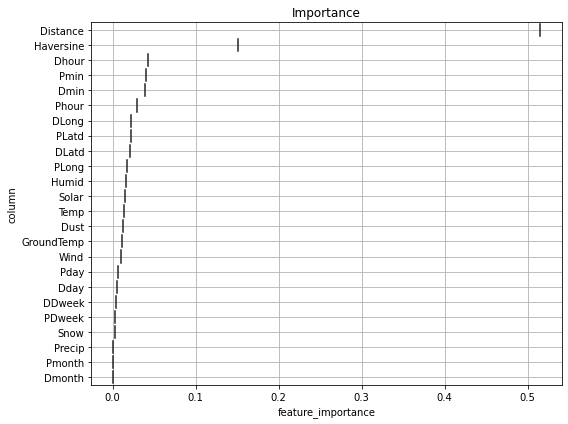

In [ ]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor

# Instantiate the model

# Fit the model to the data

# print score of the model

# visualizing the importance of features.


#AdaBoostRegressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction.

RMSE-Train: 14.535144738467752
RMSE-Test: 14.65626830436898
Score-Train: 0.4878367156261282
Score-Test: 0.4881259060616482
MedAE-Train: 7.024207011686144
MedAE-Test: 7.024207011686144
MeanAE-Train: 9.966933554251337
MeanAE-Test: 10.057969239576124
CPU times: user 4.9 s, sys: 46.7 ms, total: 4.94 s
Wall time: 4.96 s


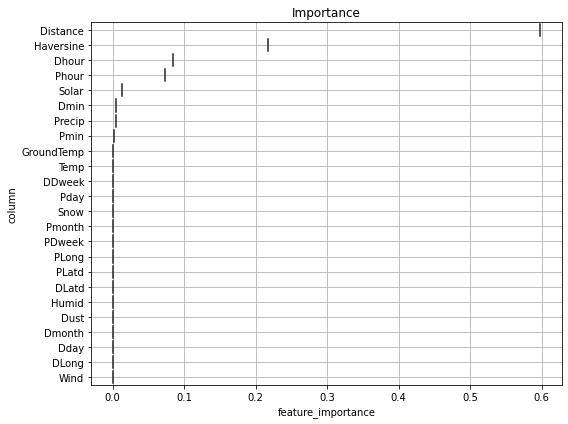

In [ ]:
%%time
# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor

# Instantiate the model

# Fit the model to the data

# print score of the model

# visualizing the importance of features.


#XGB Regressor

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

[13:55:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE-Train: 11.0764550670902
RMSE-Test: 11.201317709167126
Score-Train: 0.7025792253325598
Score-Test: 0.7010114425155747
MedAE-Train: 2.644083023071289
MedAE-Test: 2.669884443283081
MeanAE-Train: 5.7468277980306
MeanAE-Test: 5.822474490027427
CPU times: user 8.04 s, sys: 32.2 ms, total: 8.07 s
Wall time: 8.09 s


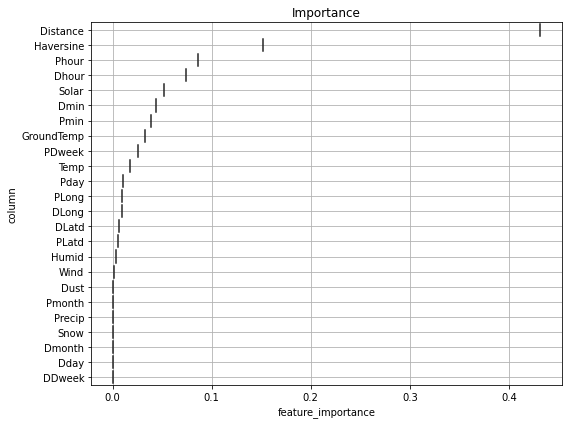

In [ ]:
%%time
# Import XGBRegressor

# Instantiate the model

# Fit the model to the data

# print score of the model

# visualizing the importance of features.


#Light Gradient Boosted Machine

RMSE-Train: 7.659447511222816
RMSE-Test: 8.14273957605946
Score-Train: 0.857778711464455
Score-Test: 0.8419998761795301
MedAE-Train: 2.141412273212371
MedAE-Test: 2.171451240446702
MeanAE-Train: 4.209394252652628
MeanAE-Test: 4.393996064700938
CPU times: user 3.64 s, sys: 52.5 ms, total: 3.69 s
Wall time: 3.71 s


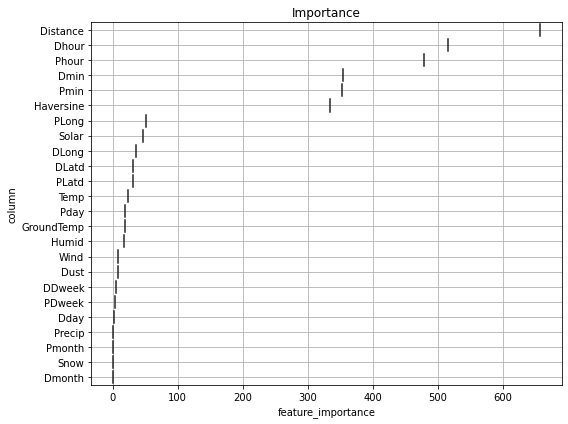

In [ ]:
%%time
# import LGBMregressor

# Instantiate the model

# Fit the model to the data

# print score of the model

# visualizing the importance of features.


###Comparing all the model based on metric

In [ ]:
# Helper function for comparing models metrics

    # the libraries we need
  


    # now, create a list with the objects 
   

    # then predict on the test set
        
    # get metrics of each model, and add to dataframe 
     

In [ ]:
# list of models object

# list of models name

# use function for comparing models by passing list of models object, names, train and test data


### RMSE of all models on train and test data

In [ ]:
# printing rmse comparision of model on train and test


  Metric  AdaBoost
0   rmse  1.641314


  Metric  AdaBoost
0   rmse  1.635841


### All metrics on train and test data

In [ ]:
# printing comparision of model on train and test


Results on Train data


Metric  AdaBoost
0       rmse  1.641314
1      MedAE  0.984299
2        MAE  1.274204
3  R-squared  0.993396

Results on Test data


Metric  AdaBoost
0       rmse  1.635841
1      MedAE  0.984299
2        MAE  1.267139
3  R-squared  0.993568

# Hyperparameter Tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model.

Every machine learning models will have different hyperparameters that can be set.

#RamdomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.

1. The first step is to write the parameters that we want to consider
2. From these parameters select the best ones.(which are printed in output)

In [ ]:
# Use the random grid to search for best hyperparameters


  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores


In [ ]:
%%time
# create random forest regressor parameters dict in list for tunning

# passing data for hyper parameter tunning with RandomSearchCV


In [ ]:
%%time
# create KNN regressor parameters dict in list for tunning

# passing data for hyper parameter tunning with RandomSearchCV


In [ ]:
%%time
# create ada boost regressor parameters dict in list for tunning

# passing data for hyper parameter tunning with RandomSearchCV


In [ ]:
%%time
# create XGBoost regressor parameters dict in list for tunning

# passing data for hyper parameter tunning with RandomSearchCV


In [ ]:
%%time
# create Gradient boost regressor parameters dict in list for tunning

# passing data for hyper parameter tunning with RandomSearchCV


#CONCLUSION

Distance is the most important feature of them all.

We have performed EDA, preprocessing, build different models, visualized feature importance, did hyper parameter tunning of each model 


#Congratulation for completing the assignment.

You have learned a lot while doing this assignment.